In [131]:
import pandas as pd
import numpy as np
train = pd.read_csv("C://users//Robert//Downloads//train.csv")
test = pd.read_csv("C://users//Robert//Downloads//test.csv")

# clean and split data

# remove constant columns (std = 0)
remove = []
for col in train.columns:
    if train[col].std() == 0:
        print("Removing constant feature %s" % col)
        remove.append(col)

train.drop(remove, axis=1, inplace=True)
test.drop(remove, axis=1, inplace=True)

# remove duplicated columns
remove = []
cols = train.columns
for i in range(len(cols)-1):
    v = train[cols[i]].values
    for j in range(i+1,len(cols)):
        if np.array_equal(v,train[cols[j]].values):
            print("Feature %s and %s are equal, removing %s" % (train[cols[i]].name, train[cols[j]].name, train[cols[j]].name))
            remove.append(cols[j])

train.drop(remove, axis=1, inplace=True)
test.drop(remove, axis=1, inplace=True)
#there are some big ranges in there.  Maybe log will help--lets look for which ones.
a=train.describe()
a.drop(['ID','TARGET'],axis=1,inplace=True)
a=a.transpose()
a['Range']=a['max']-a['min']
log_features=a[(a['Range']>1e4)&(a['min']>=0)].index

#id is first column, Target is last column
features = train.columns[1:-1]
for col in list(train.filter(regex='^(s|d)').columns):
    label=col+'pop'
    train[label]=(train[col]==0).astype(int)
train['0count']=(train[features] == 0.).astype(int).sum(axis=1)
test['0count']=(test[features] == 0.).astype(int).sum(axis=1)


Removing constant feature ind_var2_0
Removing constant feature ind_var2
Removing constant feature ind_var27_0
Removing constant feature ind_var28_0
Removing constant feature ind_var28
Removing constant feature ind_var27
Removing constant feature ind_var41
Removing constant feature ind_var46_0
Removing constant feature ind_var46
Removing constant feature num_var27_0
Removing constant feature num_var28_0
Removing constant feature num_var28
Removing constant feature num_var27
Removing constant feature num_var41
Removing constant feature num_var46_0
Removing constant feature num_var46
Removing constant feature saldo_var28
Removing constant feature saldo_var27
Removing constant feature saldo_var41
Removing constant feature saldo_var46
Removing constant feature imp_amort_var18_hace3
Removing constant feature imp_amort_var34_hace3
Removing constant feature imp_reemb_var13_hace3
Removing constant feature imp_reemb_var33_hace3
Removing constant feature imp_trasp_var17_out_hace3
Removing constan

In [31]:
train.filter(regex='var40')
#train.filter(regex='var9')
#it looks like ind is the indicator of non-zero num_var variable.
#also ind for 'imp' variables
#note that num_meses has no indicator in the original dataset
#saldo variable--no indicator
#var 10 has 2 indicators with no matching value columns: ind_var10_ult1,ind_var10cte_ult1

#list of indicators.  usual mapping is num_varN to ind_varN.  Others are noted by X->Y
#ind_var1_0,ind_var1,num_var1_0,num_var1
#ind_var2_0,ind_var2,num_var2_0_ult1,num_var2_ult1
#ind_var5_0,ind_var5,num_var5_0,num_var5
#ind_var6_0,ind_var6,num_var6_0,num_var6
#ind_var7_emit_ult1,ind_var7_recib_ult1,num_var7_emit_ult1,num_var7_recib_ult1
#ind_var8_0,num_var8_0
#ind_var12_0,ind_var12,num_var12_0,num_var12
#'ind_var13_0','ind_var13', 'num_var13_0','num_var13' train.num_aport_var13_hace3->ind_var13_0' 'num_aport_var13_ult1'->'ind_var13'
#'ind_var13_corto_0','num_var13_corto_0', 'ind_var13_corto','num_var13_corto'
#'ind_var13_largo_0','ind_var13_largo', 'num_var13_largo_0', 'num_var13_largo',
#'ind_var13_medio_0','ind_var13_medio','num_var13_medio_0', 'num_var13_medio', ,
#ind_var14_0,ind_var14,num_var14_0,num_var14       
#ind_var17_0,ind_var17,num_var17_0,num_var17
#ind_var18_0,ind_var18,num_var18_0,num_var18    
#ind_var20_0,ind_var20,num_var20_0,num_var20
#ind_var24_0,ind_var24,num_var24_0,num_var24
#ind_var25_0,ind_var25,num_var25_0,num_var25
#ind_var26_0,ind_var26,num_var26_0,num_var26
#ind_var27_0,ind_var27,num_var27_0,num_var27
#ind_var28_0,ind_var28,num_var28_0,num_var28
#ind_var29_0,ind_var29,num_var29_0,num_var29
#ind_var30_0,ind_var30,num_var30_0,num_var30
#ind_var31_0,ind_var31,num_var31_0,num_var31
#ind_var32_0,ind_var32,num_var32_0,num_var32
#ind_var33_0,ind_var33,num_var33_0,num_var33
#ind_var34_0,ind_var34,num_var34_0,num_var34
#nd_var39_0,ind_var39num_var39_0,num_var39
#ind_var40_0,ind_var40,num_var40_0,num_var40
#ind_var41_0,ind_var41,num_var41_0,num_var41
#ind_var43_emit_ult1,ind_var43_recib_ult1,num_var43_emit_ult1,num_var43_recib_ult1
#ind_var44_0,ind_var44,num_var44_0,num_var44
#ind_var46_0,ind_var46,num_var46_0,num_var46

#no indicator for num_var4, num_meses_var5_ult3,num_meses_var8_ult3,num_trasp_var11_ult1,num_meses_var12_ult3,um_ent_var16_ult1,num_sal_var16_ult1
#no ind for num_meses_var17_ult3,'num_aport_var17_ult1','num_reemb_var17_hace3','num_aport_var17_hace3','num_reemb_var17_ult1','num_trasp_var17_in_hace3',
#'num_trasp_var17_in_ult1','num_trasp_var17_out_hace3','num_trasp_var17_out_ult1'
#num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var22_ult3
#num_meses_var29_ult3
#num_aport_var33_hace3,num_aport_var33_ult1,num_meses_var33_ult3,num_reemb_var33_hace3,num_reemb_var33_ult1,num_trasp_var33_in_hace3,num_trasp_var33_in_ult1,num_trasp_var33_out_hace3,num_trasp_var33_out_ult1
#num_var35,num_var37_med_ult2,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_meses_var39_vig_ult3,
#num_op_var39_comer_ult1,num_op_var39_comer_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3
#num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult,num_op_var40_comer_ult1,num_op_var40_comer_ult3,num_op_var40_efect_ult1,num_op_var40_efect_ult3
#num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var41_comer_ult1,num_op_var41_comer_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3
#num_var42_0,num_var42
#num_compra_var44_hace3,num_compra_var44_ult1,num_meses_var44_ult3,num_venta_var44_hace3,num_venta_var44_ult1
#num_med_var45_ult3,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3

#no number for ind_var9_cte_ult1,ind_var9_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var19,ind_var25_cte,ind_var26_cte,ind_var32_cte,ind_var37_cte

#delta variables are just ratio of variables indicated. 
#delta_imp_aport_var13_1y3 =(1- imp_aport_var13_hace3/imp_aport_var13_ult1)
#delta_num_aport_var13_1y3=(num_aport_var13_ult1-num_aport_var13_hace3)/num_aport_var13_hace3





imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                         0.00                     0.00   
1                         0.00                     0.00   
2                         0.00                     0.00   
3                         0.00                     0.00   
4                         0.00                     0.00   
5                         0.00                     0.00   
6                         0.00                     0.00   
7                         0.00                     0.00   
8                         0.00                     0.00   
9                         0.00                     0.00   
10                        0.00                     0.00   
11                        0.00                     0.00   
12                        0.00                     0.00   
13                        0.00                     0.00   
14                        0.00                     0.00   
15                        0.00                     0.00   
16                        0.00                     0.00   
17                        0.00                     0.00   
18                        0.00                     0.00   
19                        0.00                     0.00   
20                        0.00                     0.00   
21                        0.00                     0.00   
22                        0.00                     0.00   
23                        0.00                     0.00   
24                        0.00                     0.00   
25                      247.56                   835.86   
26                        0.00                     0.00   
27                        0.00                     0.00   
28                        0.00                     0.00   
29                        0.00                     0.00   
...                        ...                      ...   
75990                     0.00                     0.00   
75991                     0.00                     0.00   
75992                     0.00                     0.00   
75993                     0.00                     0.00   
75994                     0.00                     0.00   
75995                     0.00                     0.00   
75996                     0.00                     0.00   
75997                     0.00                     0.00   
75998                     0.00                     0.00   
75999                     0.00                     0.00   
76000                     0.00                     0.00   
76001                     0.00                     0.00   
76002                     0.00                     0.00   
76003                     0.00                     0.00   
76004                     0.00                     0.00   
76005                     0.00                     0.00   
76006                     0.00                     0.00   
76007                     0.00                     0.00   
76008                     0.00                     0.00   
76009                     0.00                     0.00   
76010                     0.00                     0.00   
76011                     0.00                     0.00   
76012                     0.00                     0.00   
76013                     0.00                     0.00   
76014                     0.00                     0.00   
76015                     0.00                     0.00   
76016                     0.00                     0.00   
76017                     0.00                     0.00   
76018                     0.00                     0.00   
76019                     0.00                     0.00   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  imp_op_var40_ult1  \
0                            0                        0               0.00   
1                            0                        0               0.00   
2                            0                        0               0.00   
3                            0      

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import cross_validation

extc = ExtraTreesClassifier(n_estimators=800,max_features= 50,criterion= 'entropy',min_samples_split= 4,
                            max_depth= 35, min_samples_leaf= 2, n_jobs = 4, verbose=1)#, class_weight='balanced')      
extc.fit(train[features[:-50]],target)
#pred=extc.predict(test)
print("CV")
scores0 = cross_validation.cross_val_score(extc, train[features[:-50]], target, cv=5,scoring='roc_auc')
print(scores0)
"""from time import gmtime, strftime
a=strftime("%m%d%y%H%M%S", gmtime())
filename="erf"+a+".csv"
pd.DataFrame({"ID": ID, "TARGET": pred}).to_csv(filename,index=False)
"""

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   41.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:  2.8min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   26.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:  1.9min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.

CV
[ 0.81495832  0.80874305  0.82137892  0.83264544  0.822186  ]


'from time import gmtime, strftime\na=strftime("%m%d%y%H%M%S", gmtime())\nfilename="erf"+a+".csv"\npd.DataFrame({"ID": ID, "TARGET": pred}).to_csv(filename,index=False)\n'

In [12]:
import matplotlib.pyplot as plt

#extc.fit(train,target)

print(scores0)
importances = extc.feature_importances_
std = np.std([tree.feature_importances_ for tree in extc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
cols=list(train.columns.values)

print("Feature ranking:")
feature_names=[]
for f in range(train.shape[1]):
    print("%d. %s (%f) (%f) (%s)" % (f + 1, cols[indices[f]], importances[indices[f]], std[indices[f]], train.iloc[:,indices[f]].dtype))
    feature_names.append([cols[indices[f]], std[indices[f]]-importances[indices[f]]])
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train.shape[1]), indices)
plt.xlim([-1, train.shape[1]])
plt.show()

[ 0.77758257  0.77124455  0.78298051  0.7952741   0.77532059]
Feature ranking:
1. young_person (0.127060) (0.031554) (int32)
2. var15 (0.079691) (0.037313) (int64)
3. ind_var30 (0.029264) (0.061399) (int64)
4. saldo_var30pop (0.026783) (0.059281) (int32)
5. var38 (0.026140) (0.012066) (float64)
6. num_meses_var5_ult3 (0.021840) (0.045784) (int64)
7. saldo_medio_var5_hace2pop (0.020847) (0.048040) (int32)
8. num_var22_ult3 (0.017043) (0.004324) (int64)
9. saldo_medio_var5_ult1pop (0.016274) (0.044875) (int32)
10. num_meses_var39_vig_ult3 (0.015434) (0.003313) (int64)
11. 0count (0.015359) (0.011905) (int64)
12. var36 (0.015265) (0.013946) (int64)
13. saldo_medio_var5_hace3pop (0.015187) (0.026270) (int32)
14. saldo_medio_var5_ult3pop (0.014195) (0.041988) (int32)
15. num_var45_hace3 (0.013588) (0.002846) (int64)
16. num_var22_hace3 (0.013116) (0.003064) (int64)
17. num_var (0.013003) (0.003842) (int64)
18. num_var45_ult3 (0.012727) (0.003042) (int64)
19. num_var22_hace2 (0.012454) (0.00

In [ ]:

import xgboost as xgb
dtrain= xgb.DMatrix(train, label=target)
dtest=xgb.DMatrix(test)
params={'eta':.02,
        'max_depth':5,
        'subsample':0.7,
        'colsample_bytree':.7,
        'objective':'binary:logistic',
        'eval_metric':'auc'}
watchlist  = [ (dtrain,'train')]
clf = xgb.train(params,dtrain,num_boost_round=230,evals=watchlist,maximize=False,verbose_eval=20)
pred=clf.predict(dtest) 

[0]	train-auc:0.811932
[20]	train-auc:0.841039
[40]	train-auc:0.843432
[60]	train-auc:0.846344
[80]	train-auc:0.848990


In [3]:
import xgboost as xgb
dtrain= xgb.DMatrix(train, label=target)
params={'eta':.02,
        'max_depth':5,
        'subsample':0.7,
        'colsample_bytree':.7,
        'objective':'binary:logistic',
        'eval_metric':'auc',
        'base_score':.01}
xgb.cv(params, dtrain, num_boost_round=400, nfold=5, maximize=False, as_pandas=True, verbose_eval=10, show_stdv=True,seed=1234)

[0]	cv-test-auc:0.8171847999999999+0.0077215222178013635	cv-train-auc:0.8292909999999999+0.0029826945535874013
[10]	cv-test-auc:0.834695+0.0061737251639508465	cv-train-auc:0.8494574+0.002272387343742256
[20]	cv-test-auc:0.8375052000000001+0.006533255739675299	cv-train-auc:0.8542544+0.001994291513294889
[30]	cv-test-auc:0.838518+0.0070607359106540655	cv-train-auc:0.8570931999999999+0.0015980665067512098
[40]	cv-test-auc:0.8390378000000001+0.007084683462230319	cv-train-auc:0.859136+0.001499445364126352
[50]	cv-test-auc:0.8395972+0.006986541988709451	cv-train-auc:0.8609742+0.0015343375639017447
[60]	cv-test-auc:0.8399384000000001+0.0070146450687116006	cv-train-auc:0.8625048+0.0014988119828717435
[70]	cv-test-auc:0.8403248+0.007171895130298532	cv-train-auc:0.8639158+0.0014068881121112795
[80]	cv-test-auc:0.840577+0.007251189005949317	cv-train-auc:0.8652215999999999+0.0013249686184963107
[90]	cv-test-auc:0.8408692+0.007123422138270362	cv-train-auc:0.8664262+0.0013668901053120678
[100]	cv-te

test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.817185      0.007722        0.829291       0.002983
1         0.821344      0.009177        0.835082       0.004182
2         0.825975      0.006008        0.839393       0.003267
3         0.828438      0.005880        0.841794       0.003423
4         0.830810      0.006157        0.844427       0.002998
5         0.831161      0.006821        0.845178       0.002611
6         0.832512      0.006728        0.846709       0.002487
7         0.833050      0.006964        0.847299       0.002515
8         0.833912      0.006563        0.848359       0.002308
9         0.834083      0.006395        0.849001       0.002248
10        0.834695      0.006174        0.849457       0.002272
11        0.835374      0.006280        0.850296       0.002213
12        0.835685      0.006152        0.850863       0.002122
13        0.835894      0.005981        0.851324       0.002060
14        0.835979      0.006083        0.851758       0.001869
15        0.836262      0.006245        0.852275       0.001855
16        0.836453      0.006448        0.852645       0.001893
17        0.836576      0.006248        0.853115       0.001937
18        0.836958      0.006333        0.853556       0.001965
19        0.837372      0.006425        0.854019       0.001988
20        0.837505      0.006533        0.854254       0.001994
21        0.837693      0.006593        0.854631       0.001915
22        0.837771      0.006719        0.854876       0.001820
23        0.837887      0.006811        0.855120       0.001826
24        0.837914      0.006853        0.855421       0.001796
25        0.838047      0.007009        0.855745       0.001759
26        0.838128      0.007109        0.855994       0.001713
27        0.838286      0.007055        0.856309       0.001625
28        0.838335      0.007112        0.856532       0.001590
29        0.838380      0.007119        0.856855       0.001602
..             ...           ...             ...            ...
370       0.840779      0.007203        0.889587       0.001321
371       0.840772      0.007209        0.889641       0.001312
372       0.840777      0.007205        0.889702       0.001281
373       0.840780      0.007215        0.889782       0.001264
374       0.840790      0.007211        0.889859       0.001241
375       0.840775      0.007224        0.889920       0.001272
376       0.840762      0.007238        0.889975       0.001274
377       0.840761      0.007258        0.890029       0.001292
378       0.840759      0.007263        0.890109       0.001299
379       0.840743      0.007263        0.890168       0.001308
380       0.840744      0.007277        0.890221       0.001319
381       0.840747      0.007275        0.890281       0.001304
382       0.840750      0.007257        0.890353       0.001316
383       0.840715      0.007249        0.890406       0.001328
384       0.840721      0.007253        0.890460       0.001323
385       0.840706      0.007231        0.890531       0.001308
386       0.840684      0.007226        0.890590       0.001302
387       0.840675      0.007214        0.890652       0.001283
388       0.840660      0.007216        0.890725       0.001268
389       0.840663      0.007192        0.890776       0.001248
390       0.840665      0.007176        0.890830       0.001259
391       0.840666      0.007168        0.890890       0.001259
392       0.840639      0.007168        0.890970       0.001261
393       0.840637      0.007187        0.891061       0.001279
394       0.840624      0.007184        0.891119       0.001269
395       0.840624      0.007185        0.891149       0.001267
396       0.840640      0.007183        0.891208       0.001251
397       0.840635      0.007199        0.891291       0.001250
398       0.840593      0.007208        0.891359       0.001258
399       0.840583      0.007201        0.891406       0.001263

[400 rows x 4 columns]

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
extc = ExtraTreesClassifier(n_estimators=1000,max_features= 40,criterion= 'entropy',min_samples_split= 4,
                            max_depth= 35, min_samples_leaf= 2, n_jobs = 4, verbose=1)      
extc.fit(train,target)
#print("CV")
#scores0 = cross_validation.cross_val_score(extc, train, target, cv=10,scoring='roc_auc')
#print(scores0)
pred = extc.predict_proba(test)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   30.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:  2.7min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    7.0s finished


In [222]:
index=0
for col in b:
    for i in range(index,len(b)):
        col2=b[i]
        label=col+"x"+col2
        train[label]=train[col]*train[col2]
    index=index+1

In [223]:
train

var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0         2     23                   0                     0.00   
1         2     34                   0                     0.00   
2         2     23                   0                     0.00   
3         2     37                   0                   195.00   
4         2     39                   0                     0.00   
5         2     23                   0                     0.00   
6         2     27                   0                     0.00   
7         2     26                   0                     0.00   
8         2     45                   0                     0.00   
9         2     25                   0                     0.00   
10        2     42                   0                     0.00   
11        2     26                   0                     0.00   
12        2     51                   0                     0.00   
13        2     43                   0                     0.00   
14        2     33                 600                  1086.48   
15        2     30                   0                     0.00   
16        2     44                   0                     0.00   
17        2     36                   0                    55.20   
18      229     55                   0                     0.00   
19        2     28                   0                     0.00   
20        2     23                   0                     0.00   
21        2     27                   0                     0.00   
22        2     35                   0                     0.00   
23        2     54                   0                   117.75   
24        2     42                   0                     0.00   
25        2     40                   0                  1658.37   
26        2     23                   0                     0.00   
27        2     25                   0                     0.00   
28        2     24                   0                     0.00   
29        2     23                   0                    55.05   
...     ...    ...                 ...                      ...   
75990     2     59                   0                   188.40   
75991     2     26                   0                     0.00   
75992     2     24                   0                     0.00   
75993     2     23                   0                     0.00   
75994     2     23                   0                     0.00   
75995     2     24                   0                     0.00   
75996     2     30                   0                     0.00   
75997     2     24                   0                     0.00   
75998     2     67                   0                     0.00   
75999     2     41                   0                   454.68   
76000     2     75                   0                     0.00   
76001     2     24                   0                     0.00   
76002     2     37                   0                     0.00   
76003     2     23                   0                   326.82   
76004     2     45                   0                     0.00   
76005     2     32                   0                     0.00   
76006     2     45                   0                     0.00   
76007     2     61                   0                     0.00   
76008     2     23                   0                     0.00   
76009     2     29                   0                   123.36   
76010     2     25                   0                     0.00   
76011     2     55                   0                    64.89   
76012     4     50                   0                     2.67   
76013     2     35                   0                   139.47   
76014     2     39                   0                   375.99   
76015     2     48                   0                     0.00   
76016     2     39                   0                     0.00   
76017     2     23                   0                

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 300 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


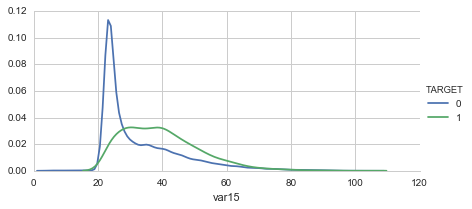

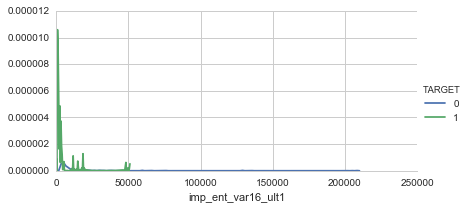

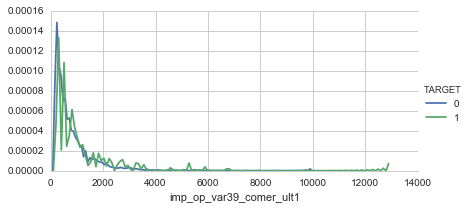

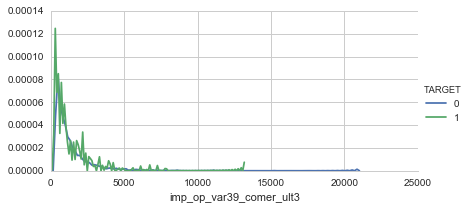

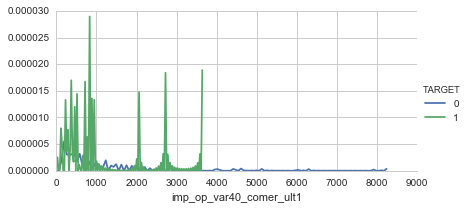

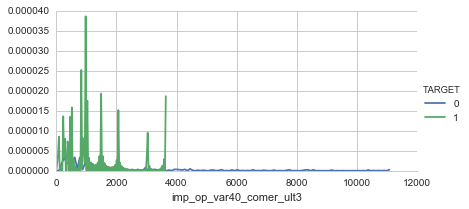

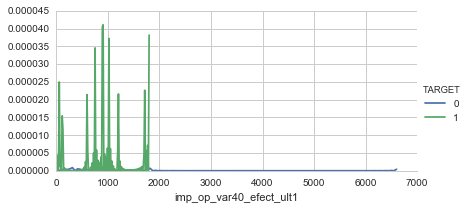

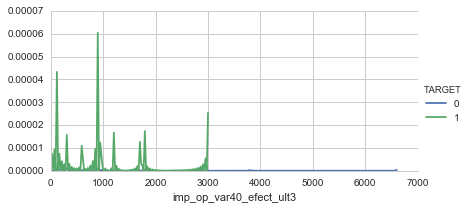

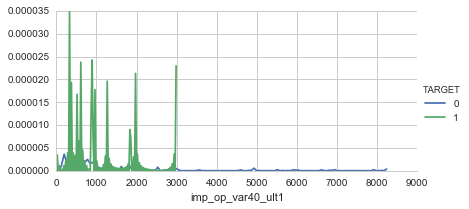

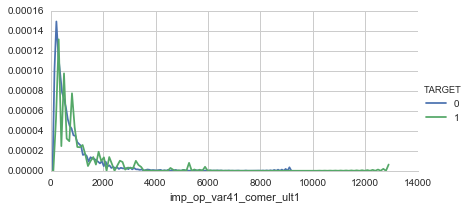

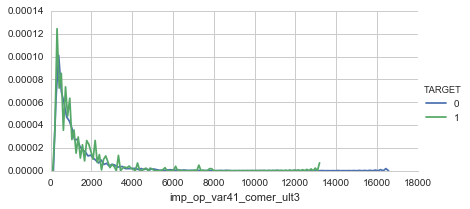

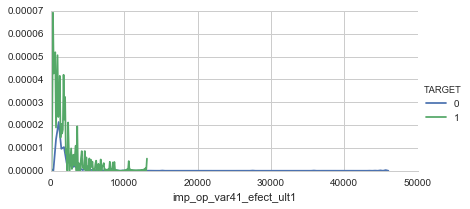

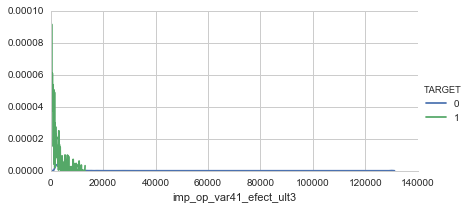

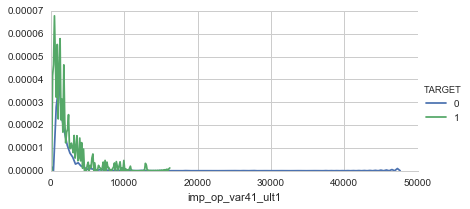

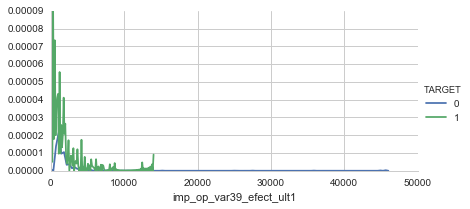

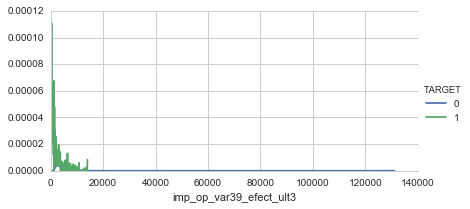

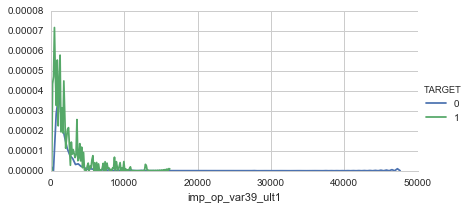

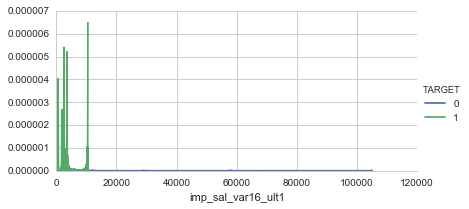

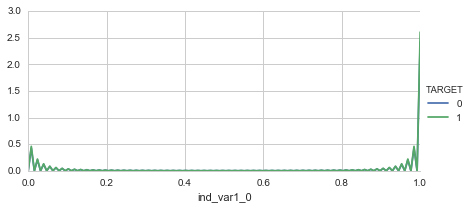

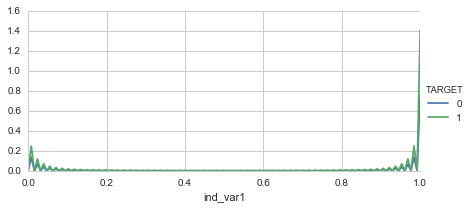

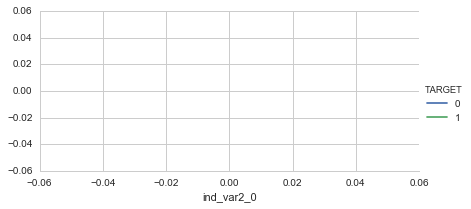

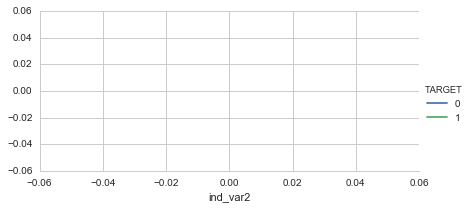

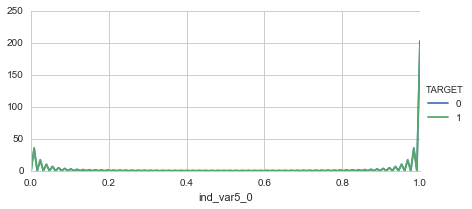

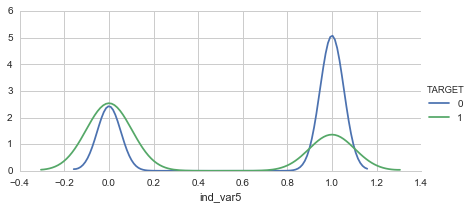

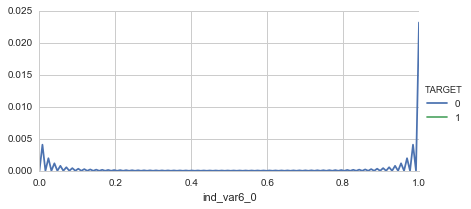

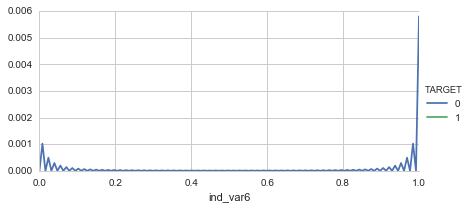

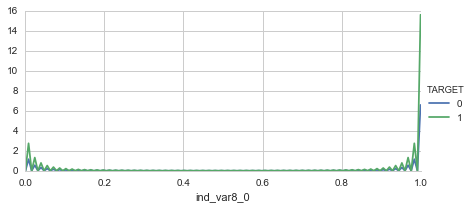

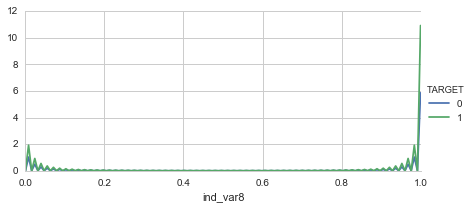

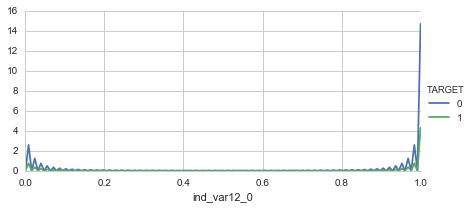

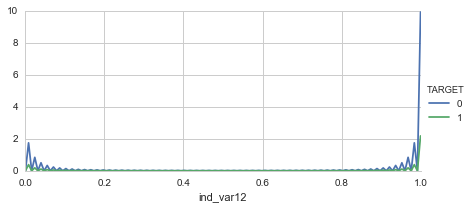

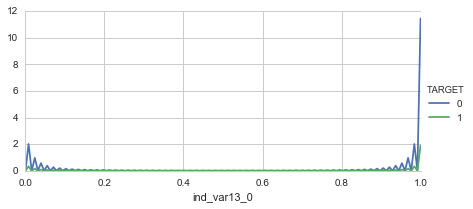

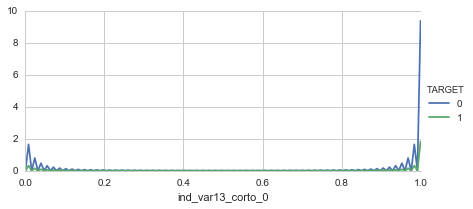

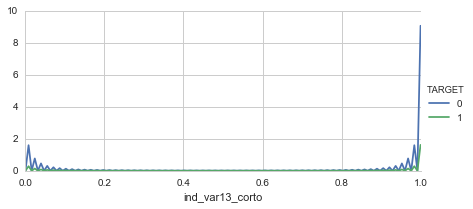

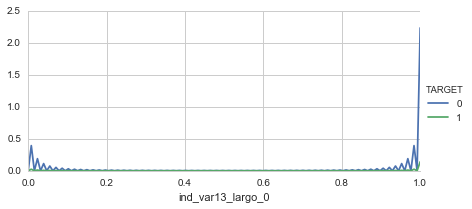

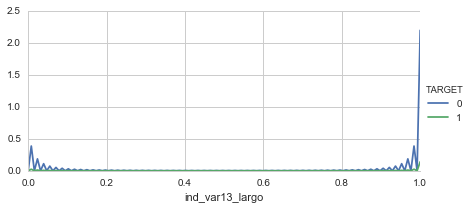

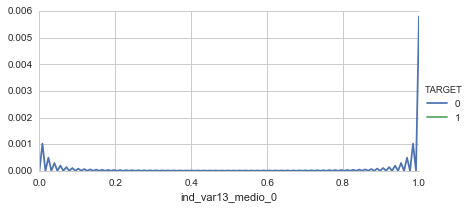

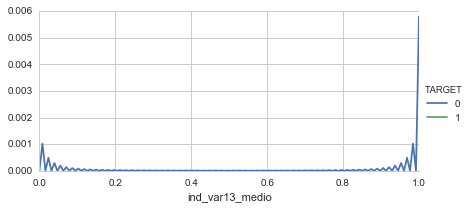

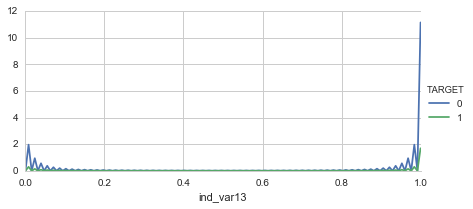

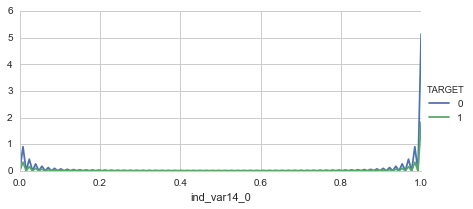

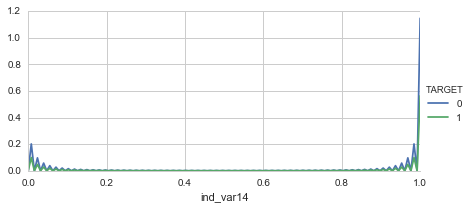

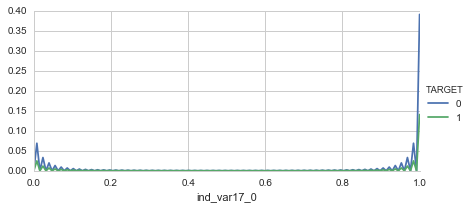

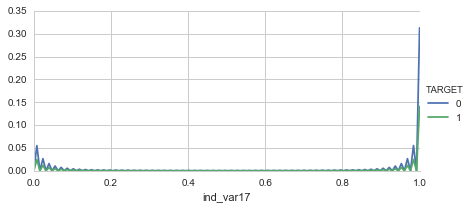

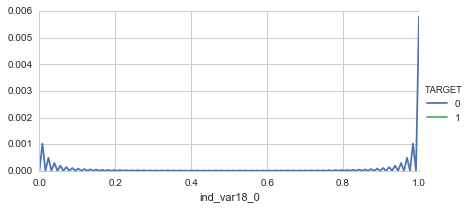

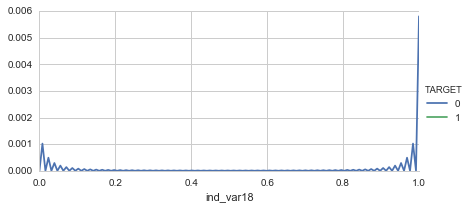

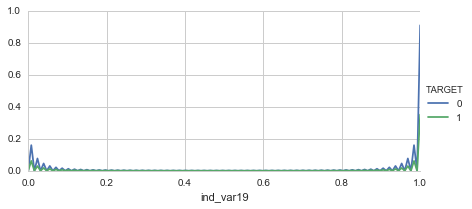

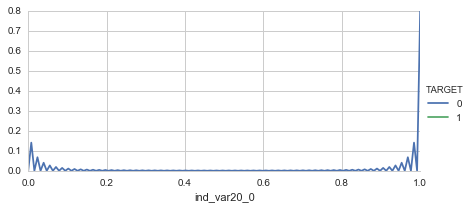

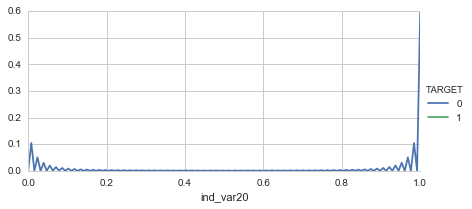

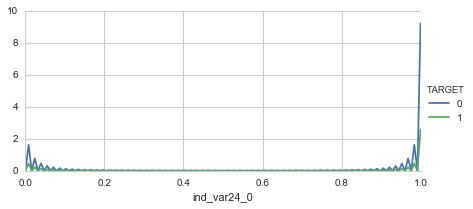

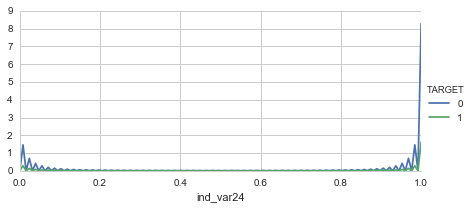

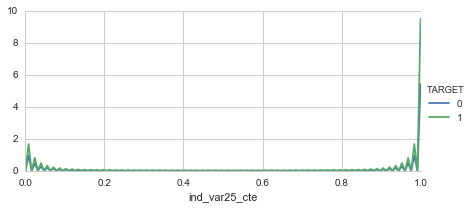

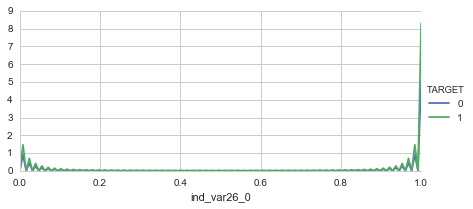

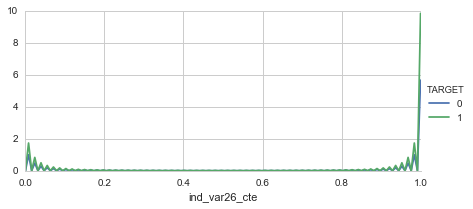

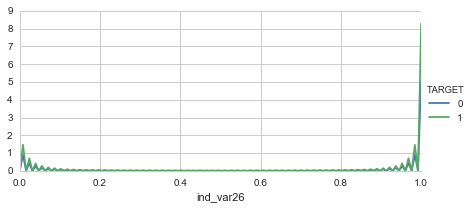

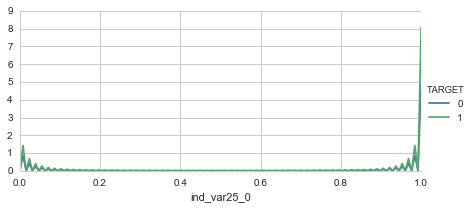

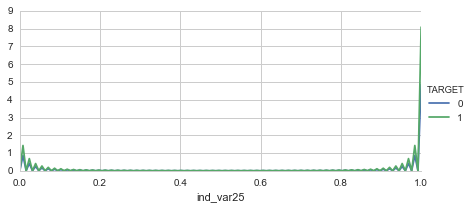

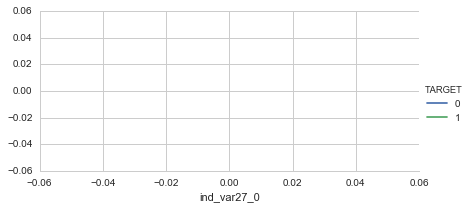

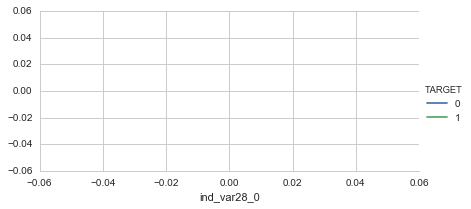

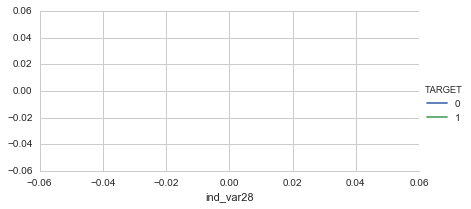

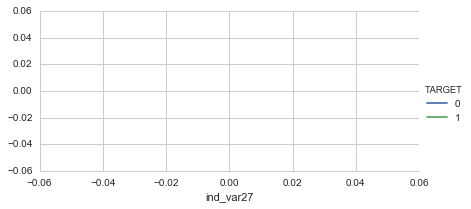

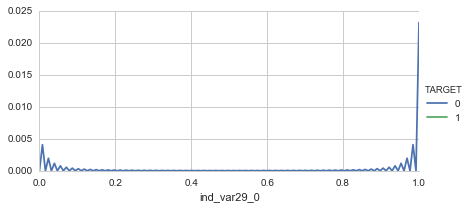

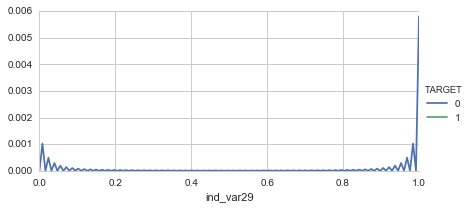

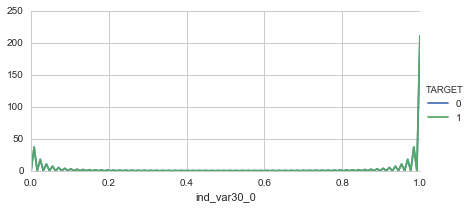

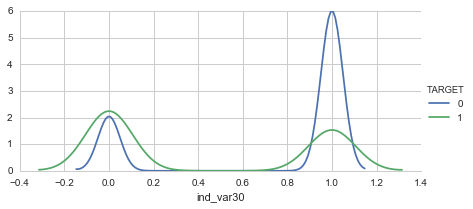

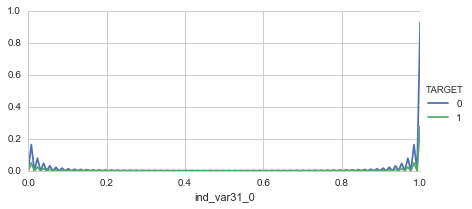

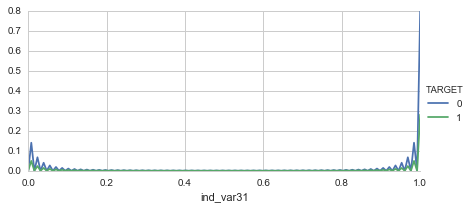

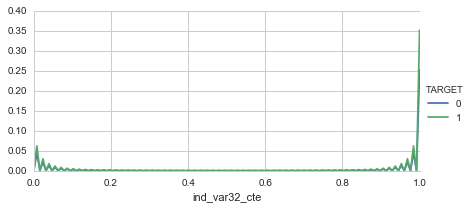

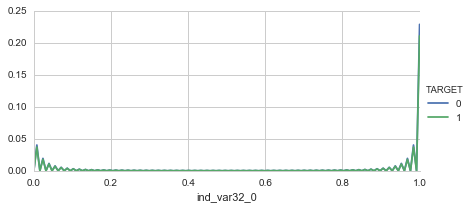

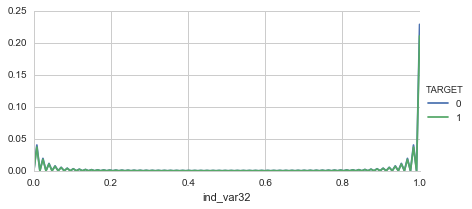

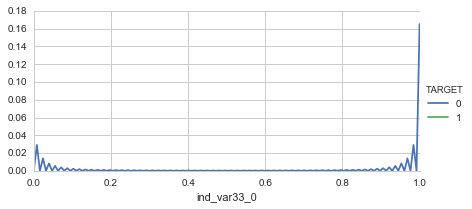

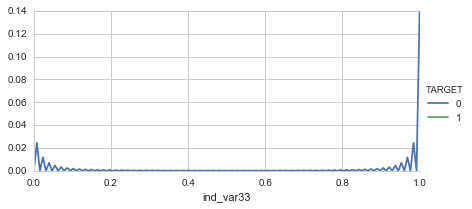

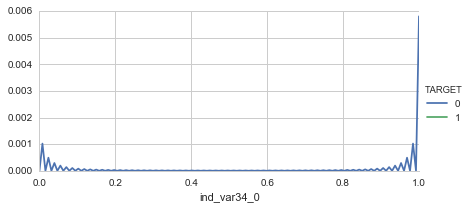

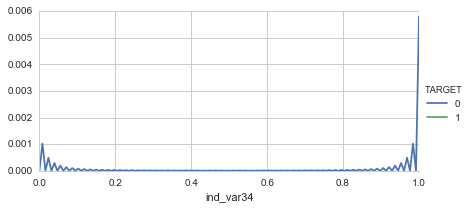

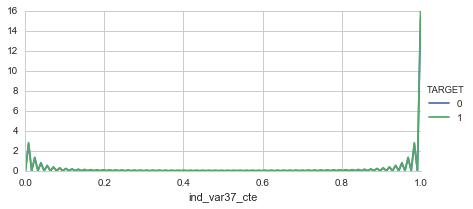

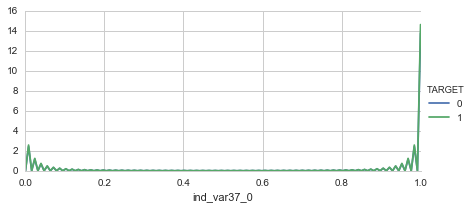

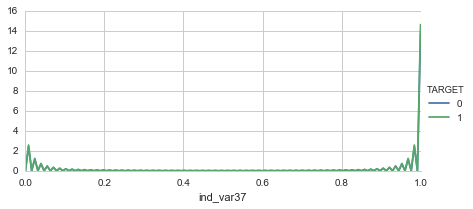

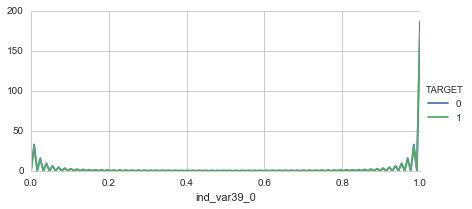

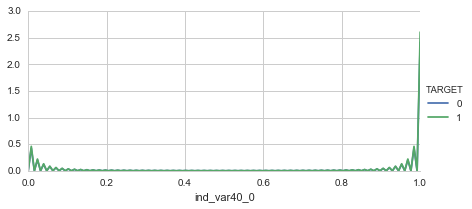

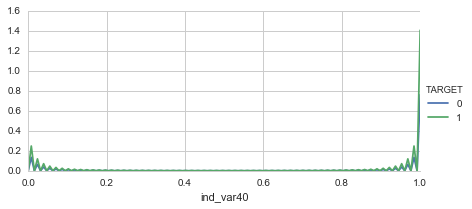

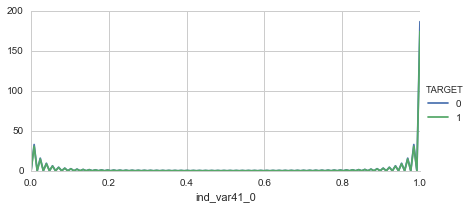

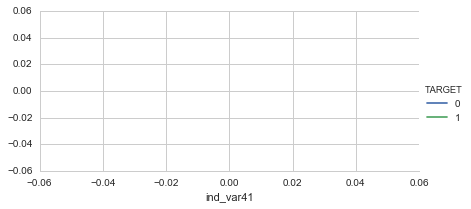

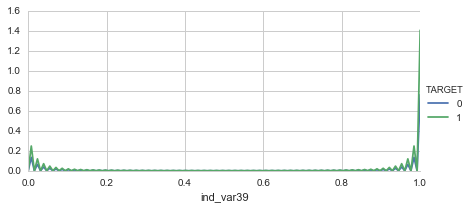

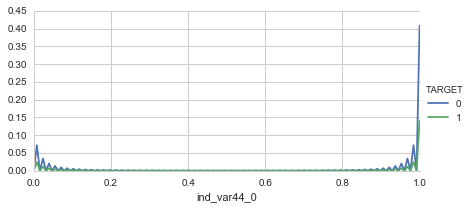

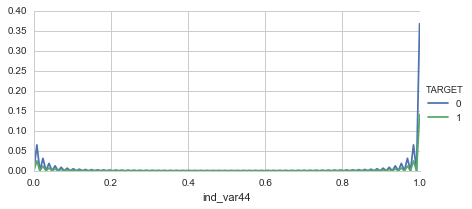

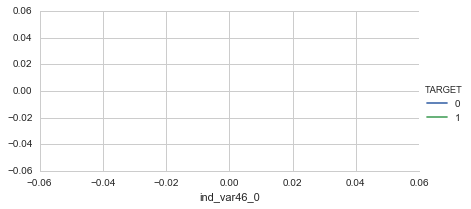

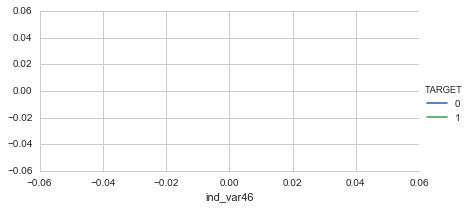

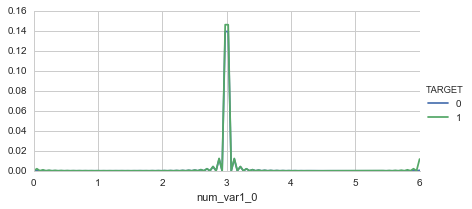

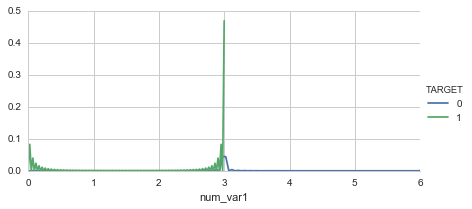

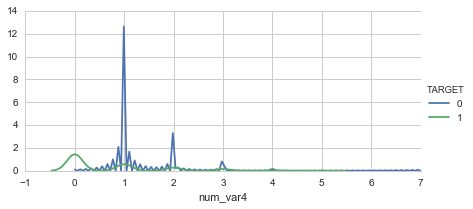

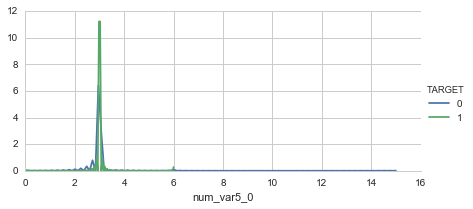

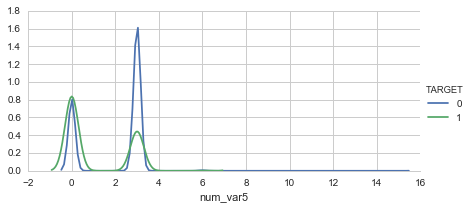

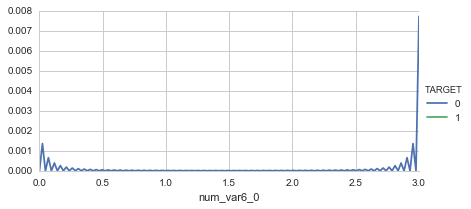

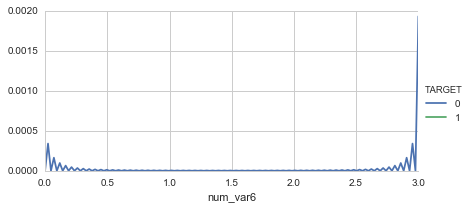

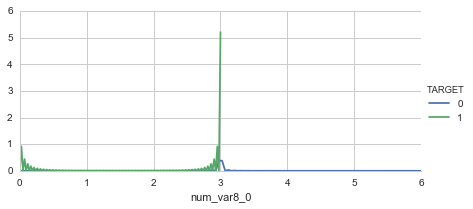

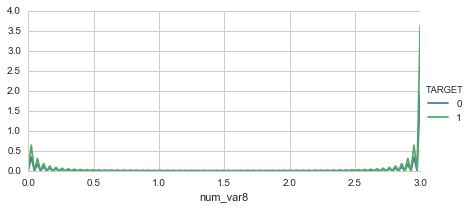

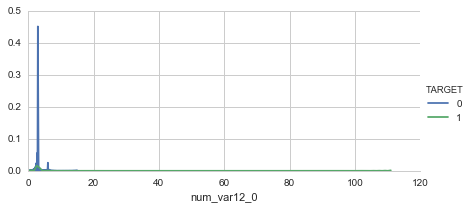

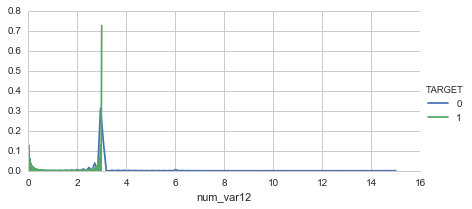

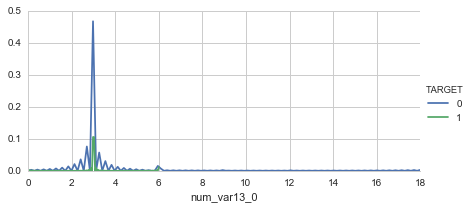

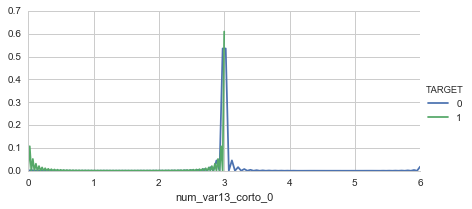

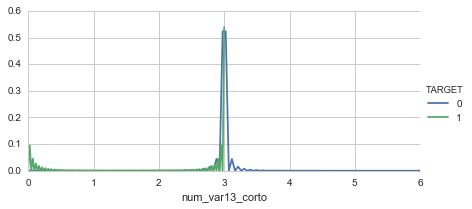

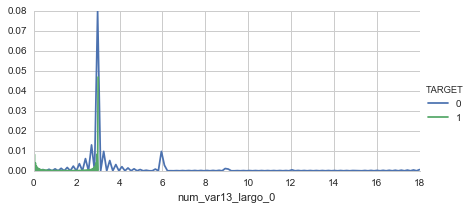

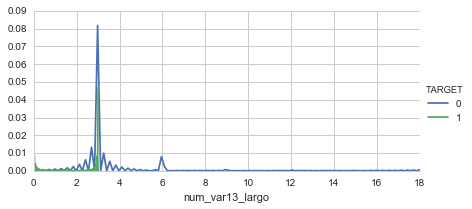

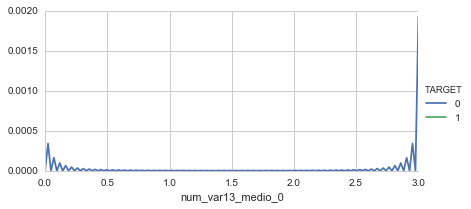

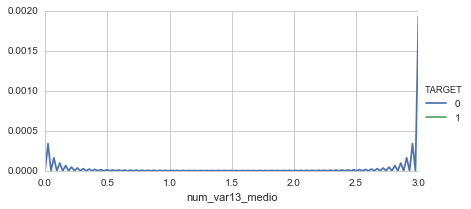

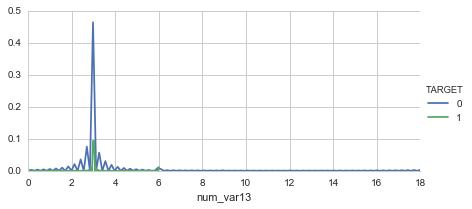

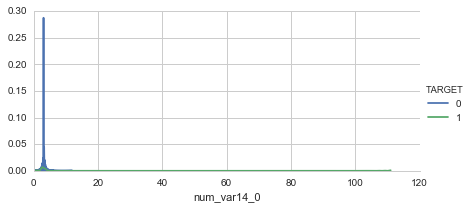

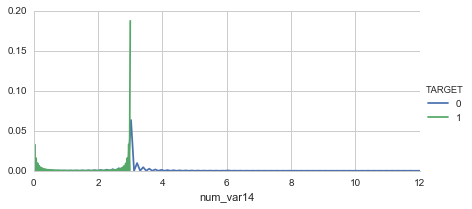

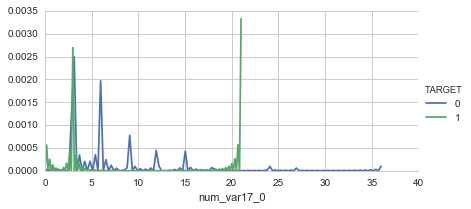

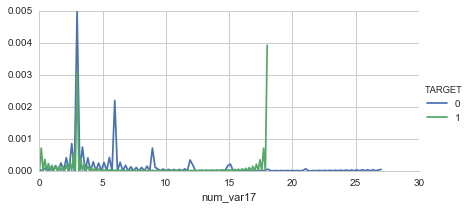

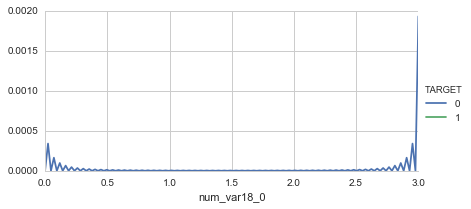

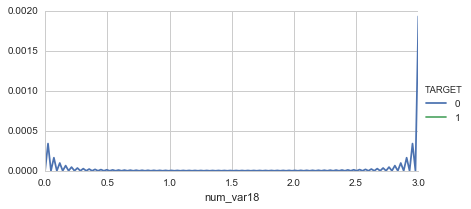

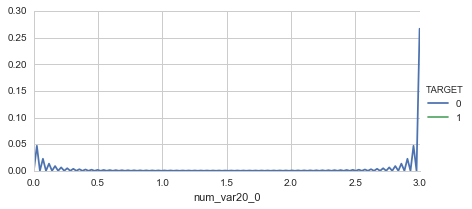

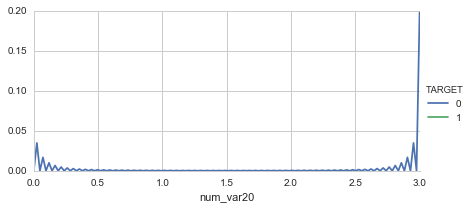

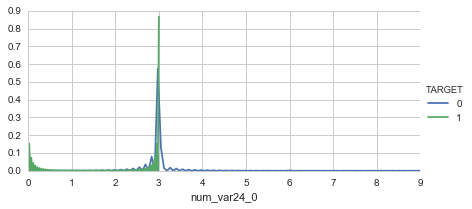

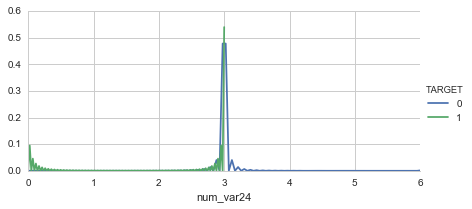

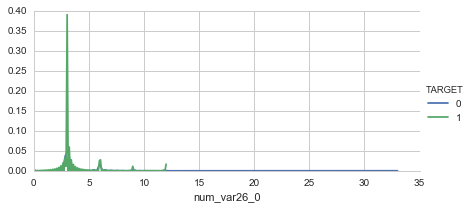

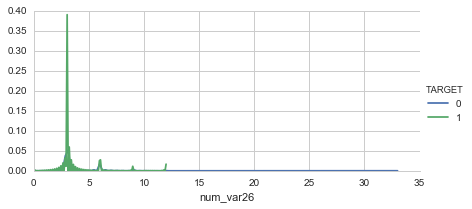

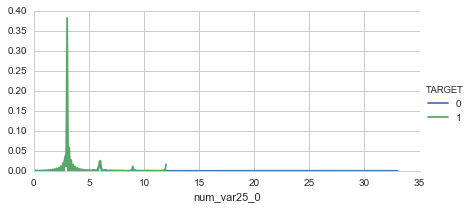

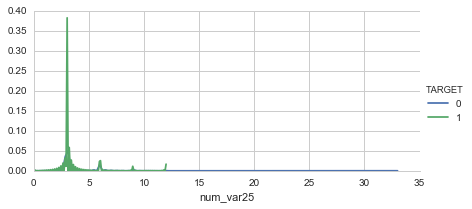

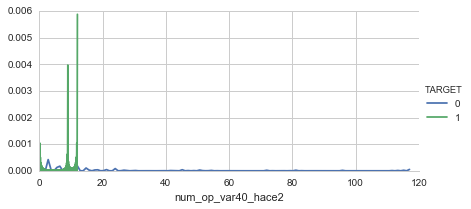

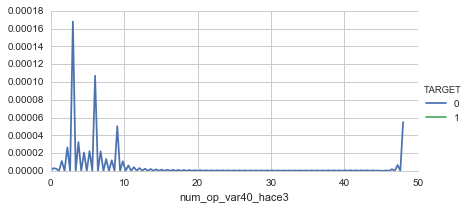

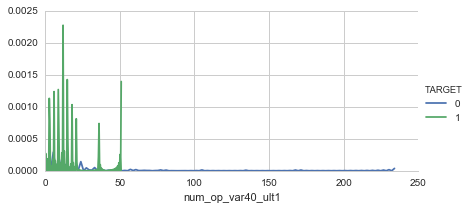

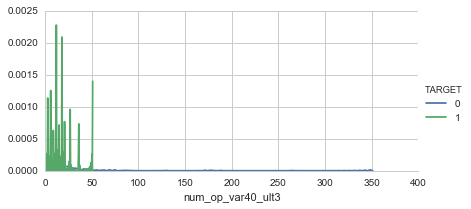

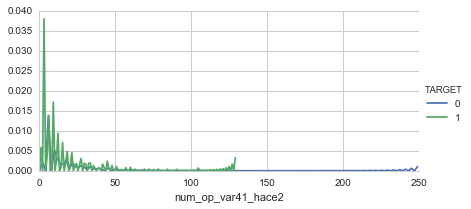

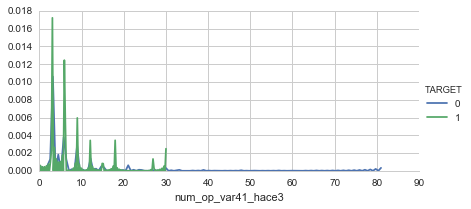

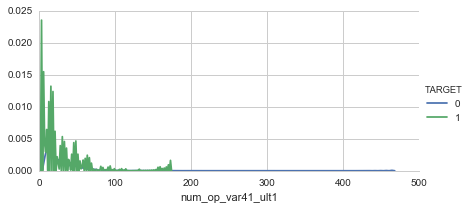

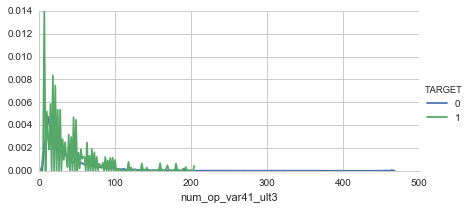

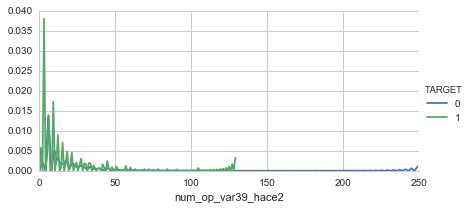

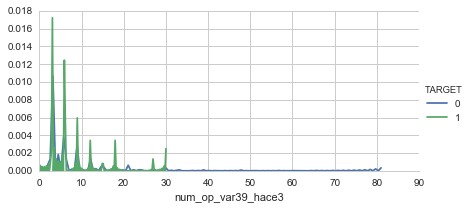

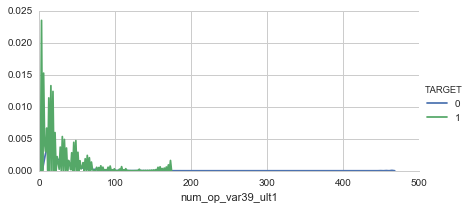

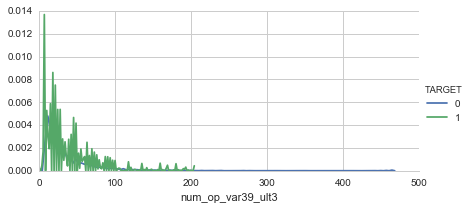

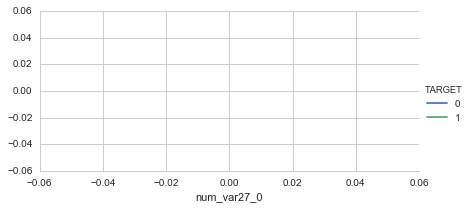

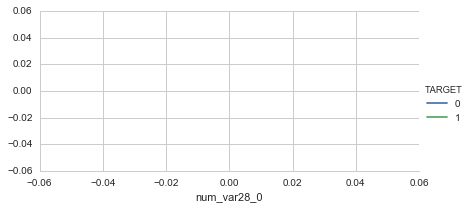

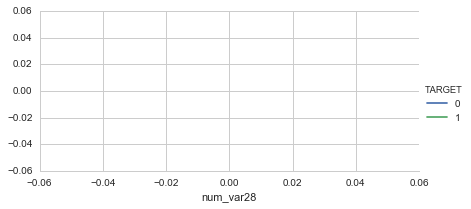

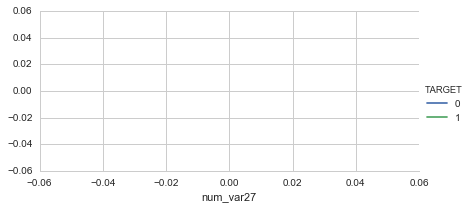

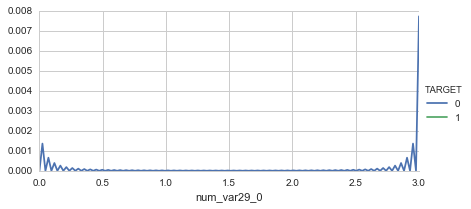

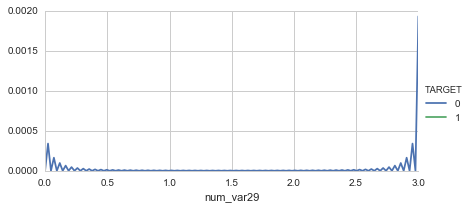

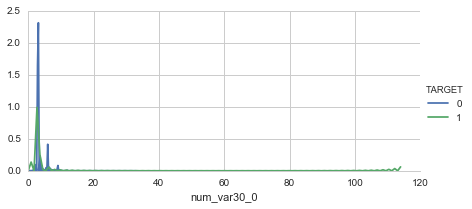

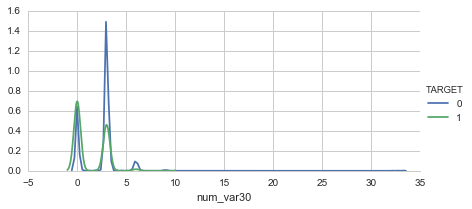

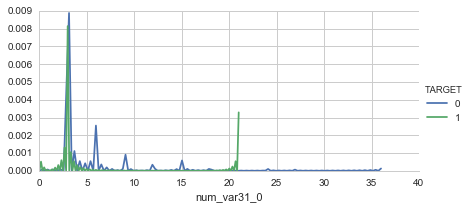

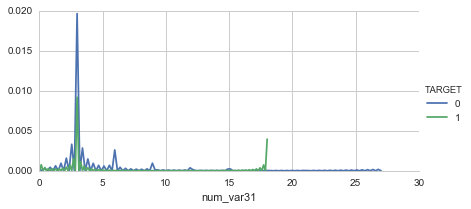

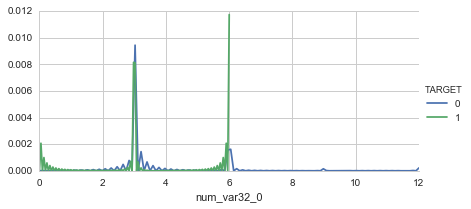

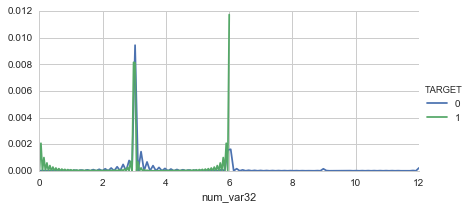

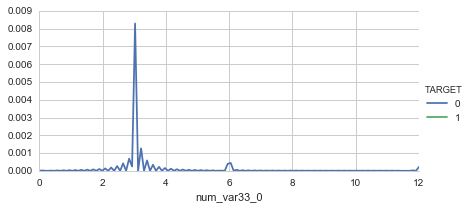

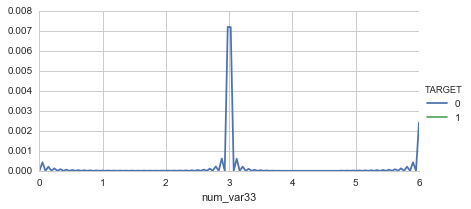

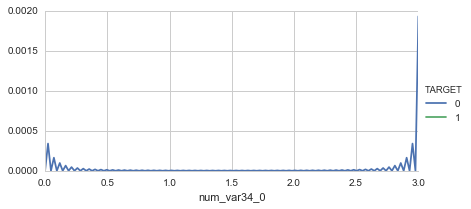

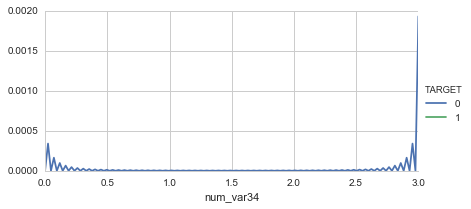

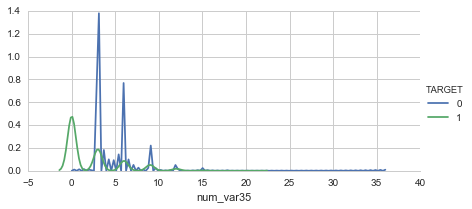

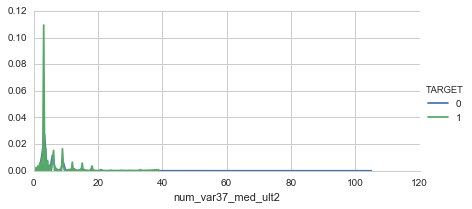

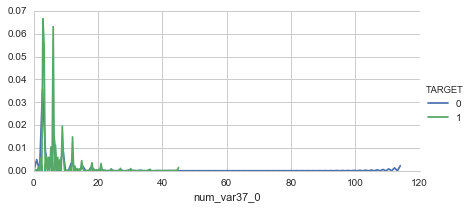

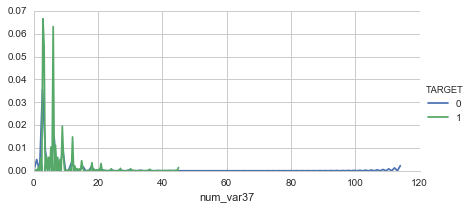

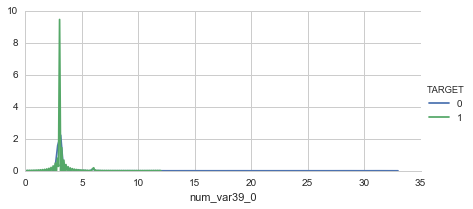

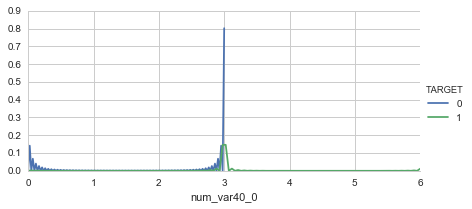

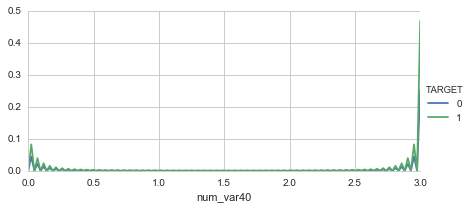

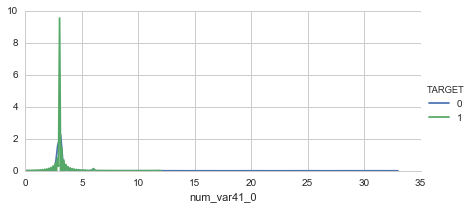

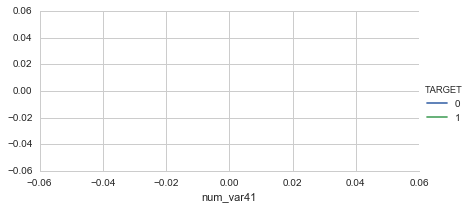

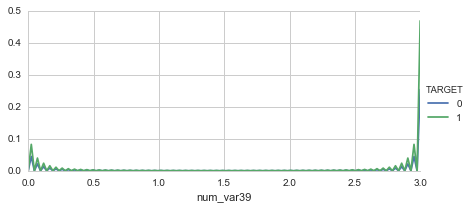

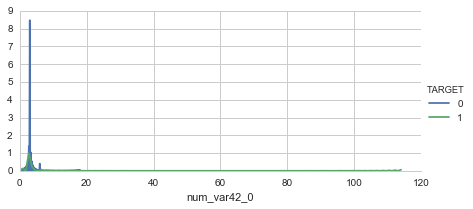

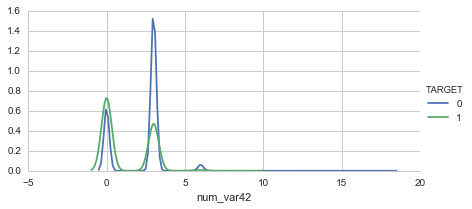

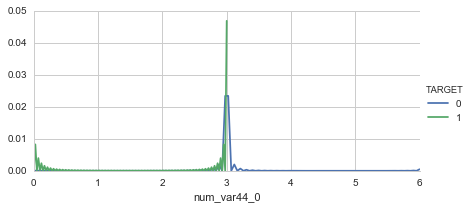

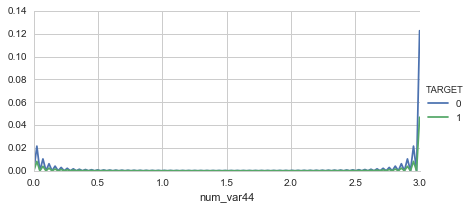

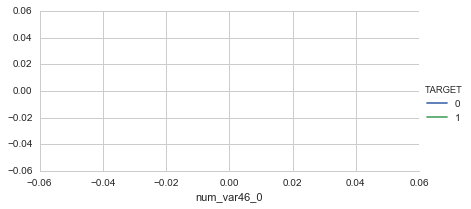

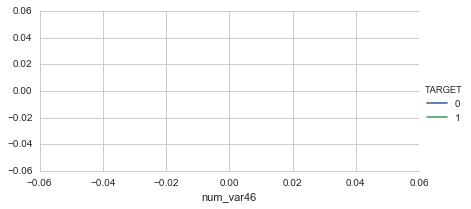

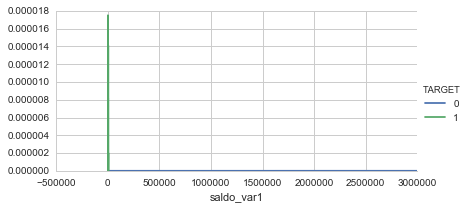

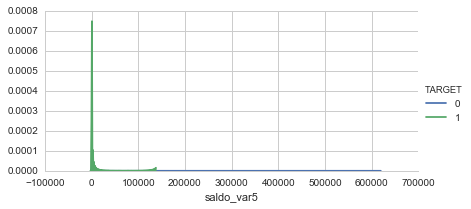

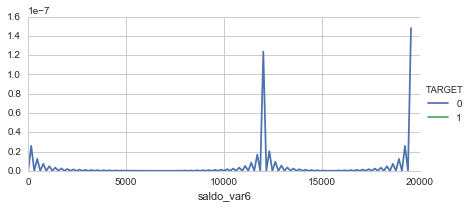

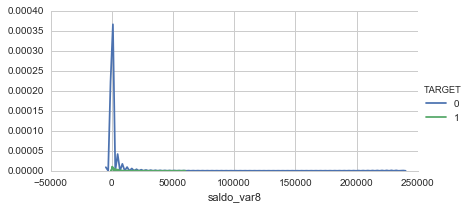

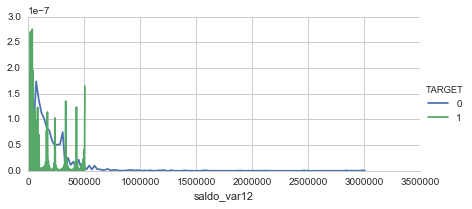

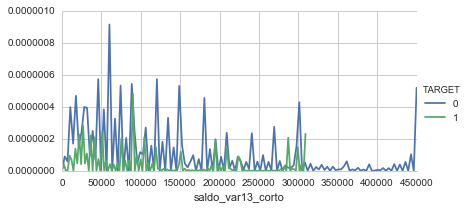

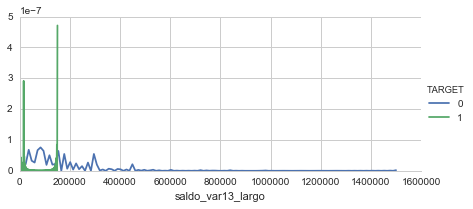

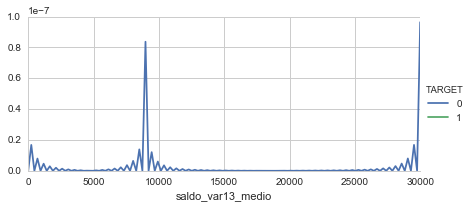

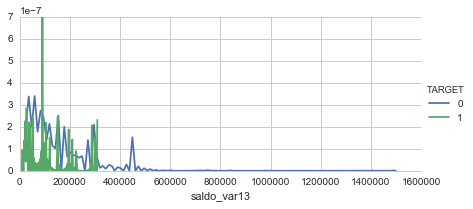

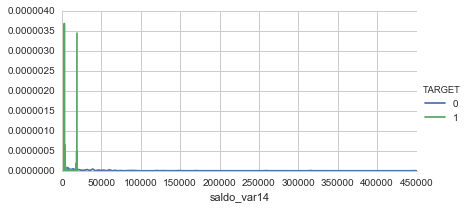

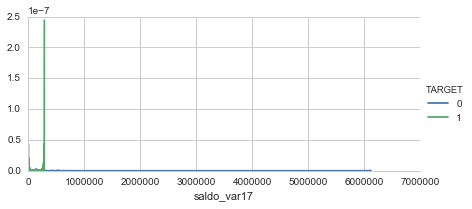

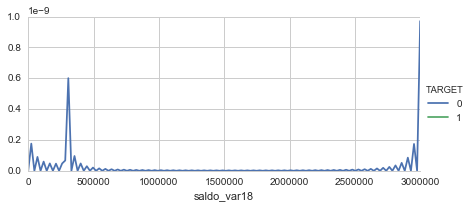

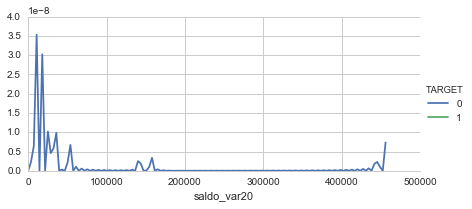

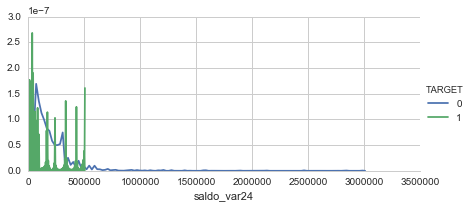

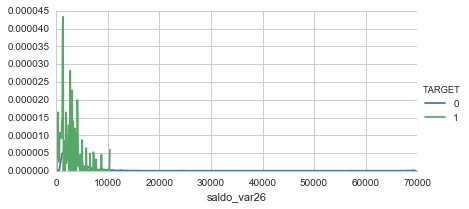

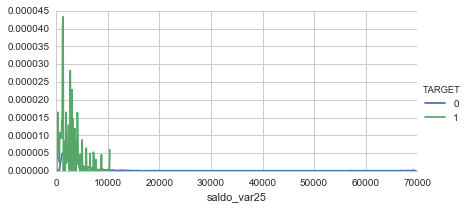

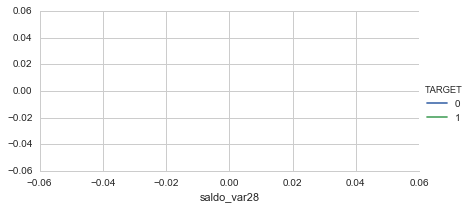

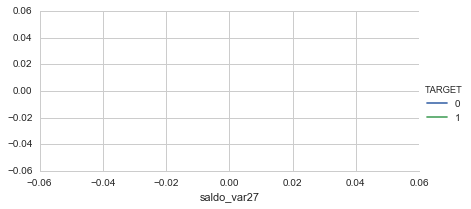

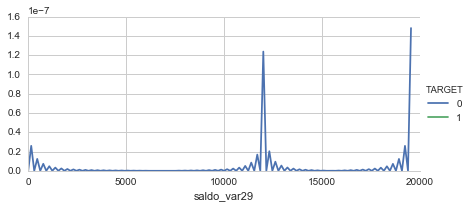

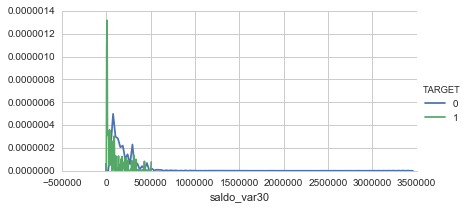

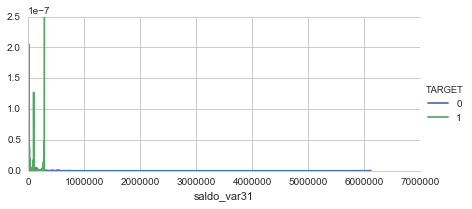

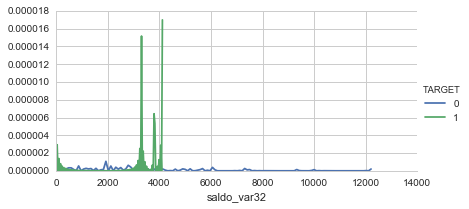

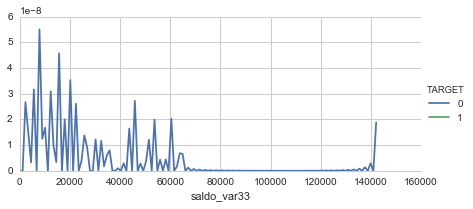

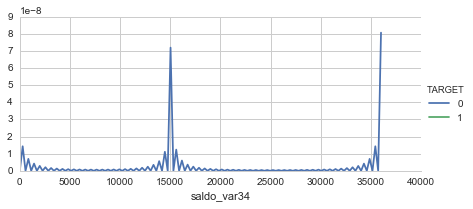

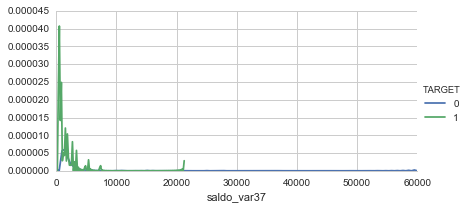

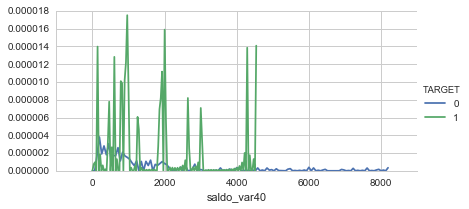

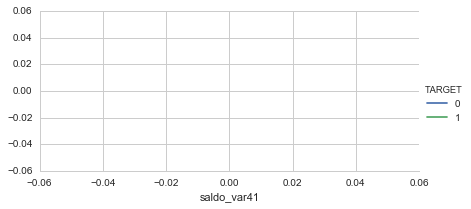

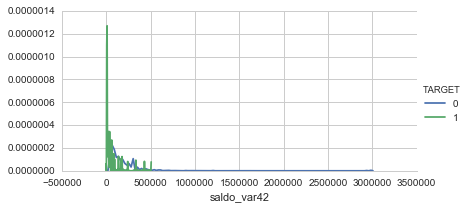

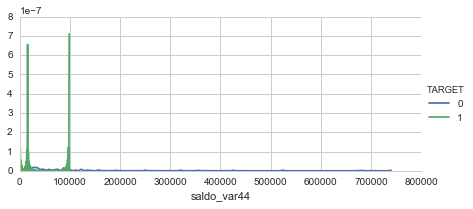

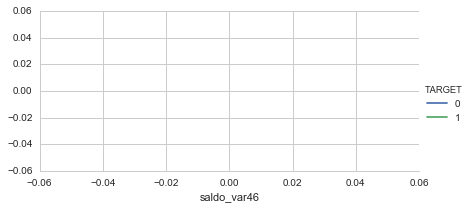

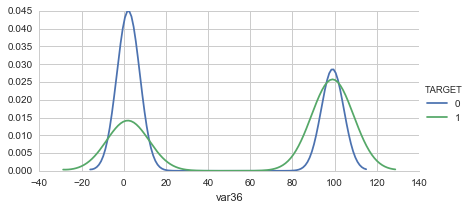

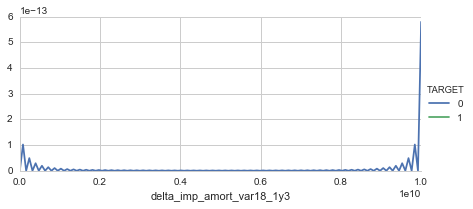

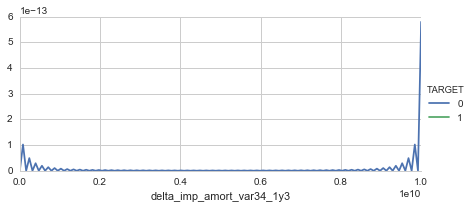

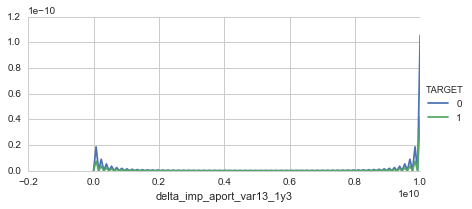

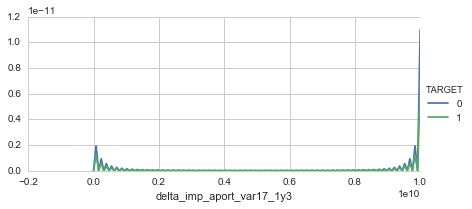

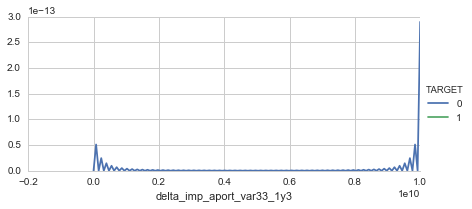

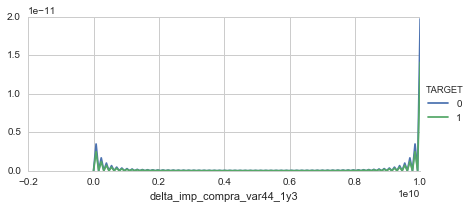

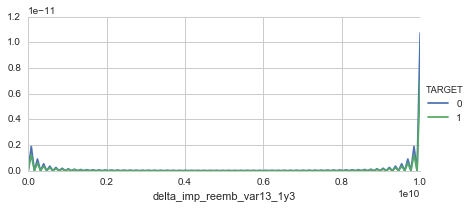

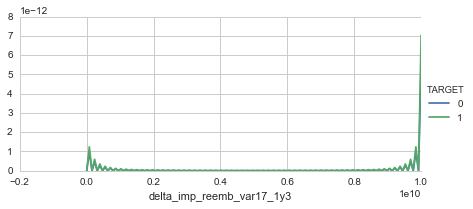

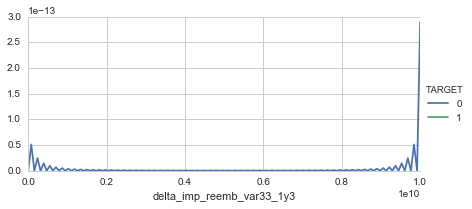

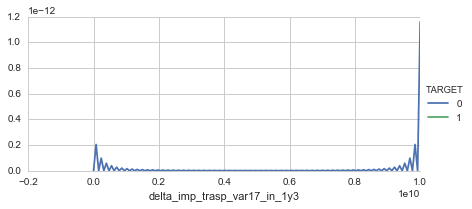

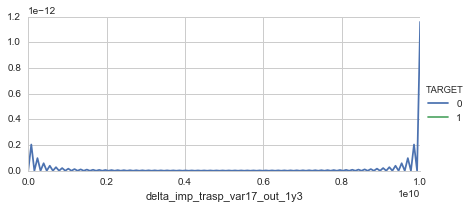

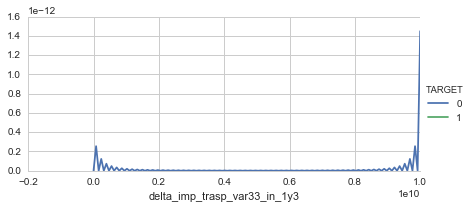

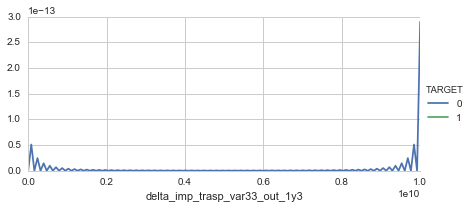

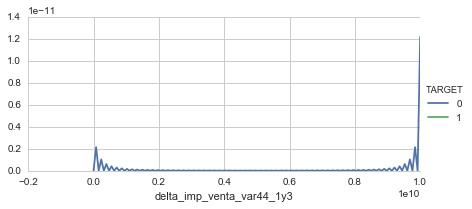

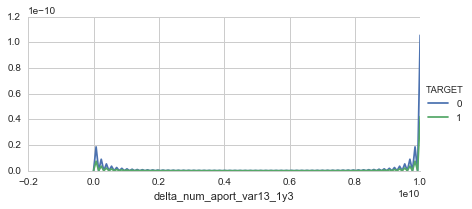

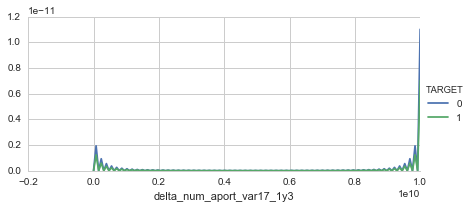

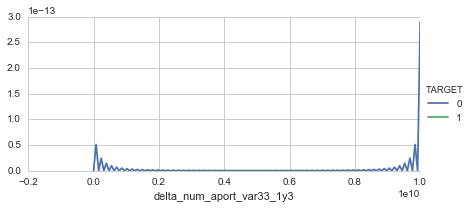

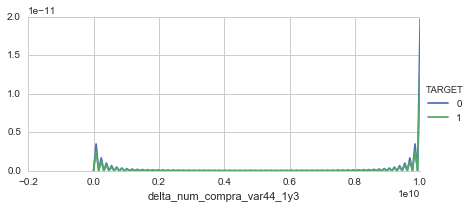

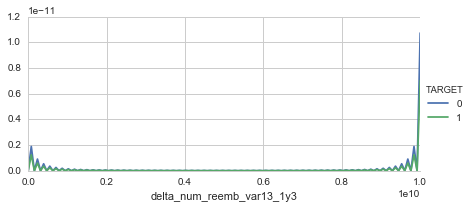

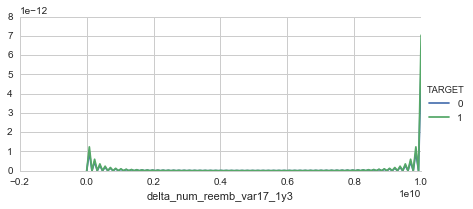

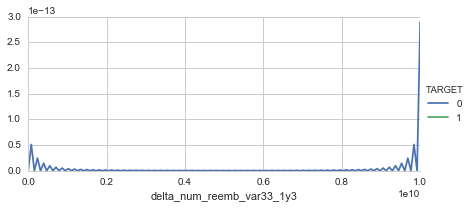

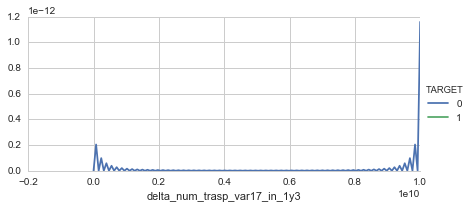

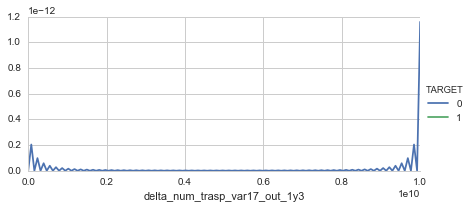

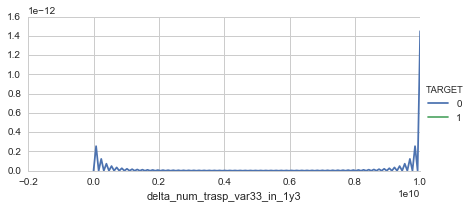

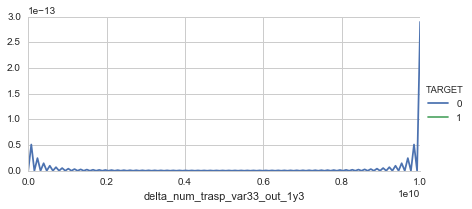

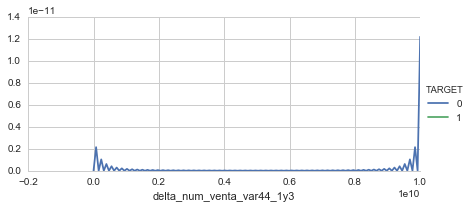

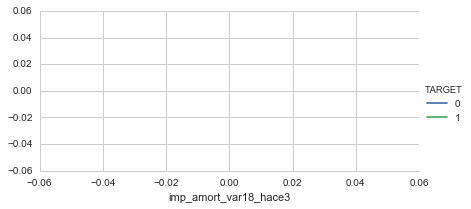

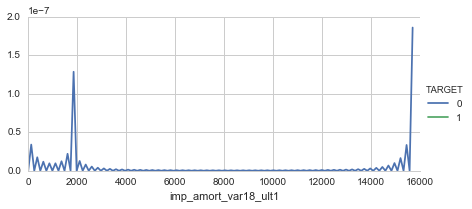

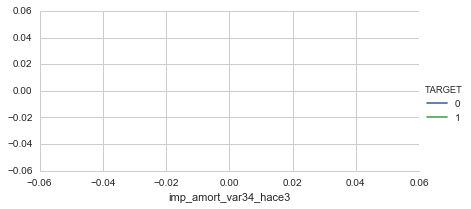

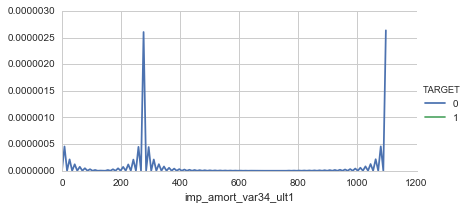

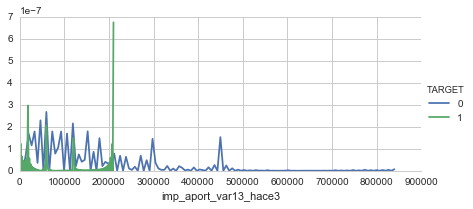

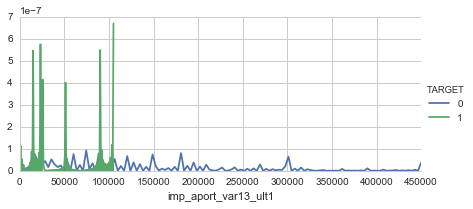

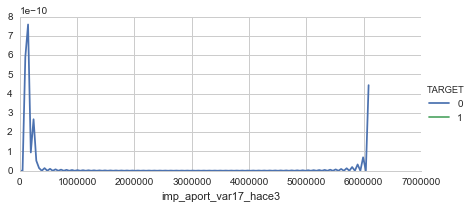

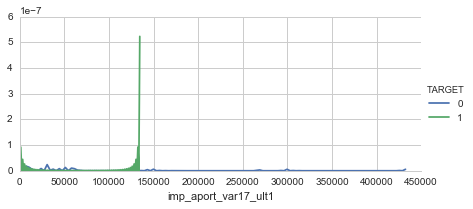

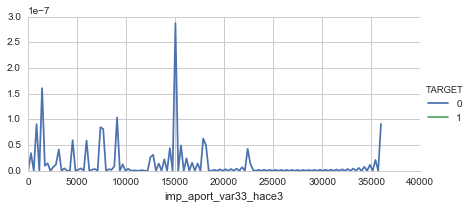

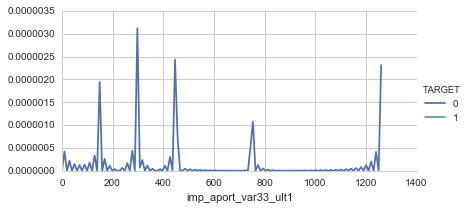

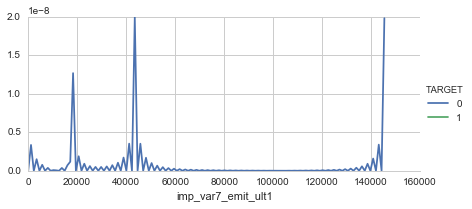

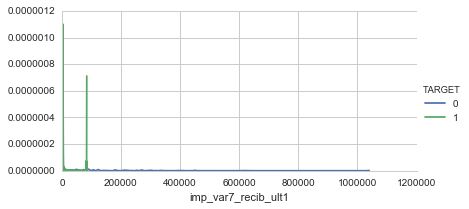

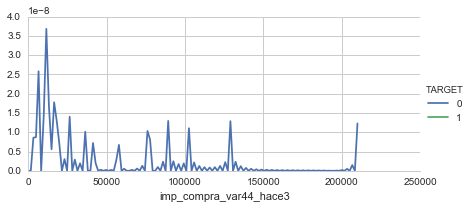

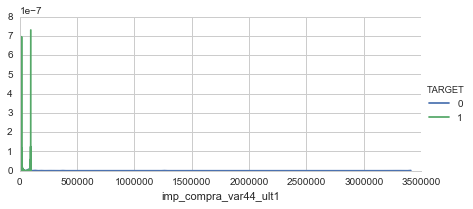

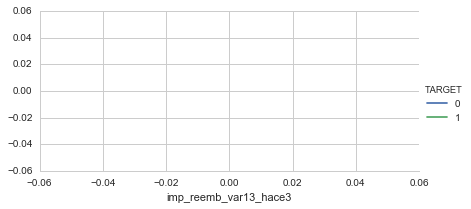

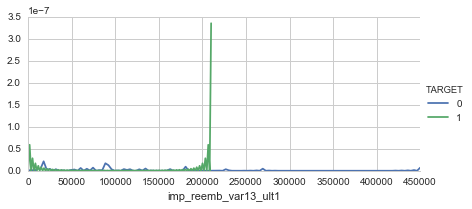

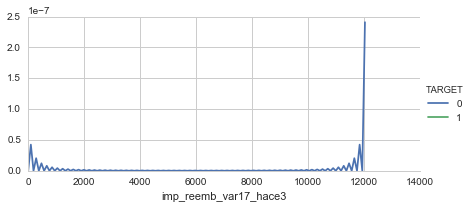

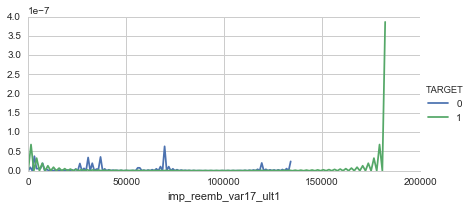

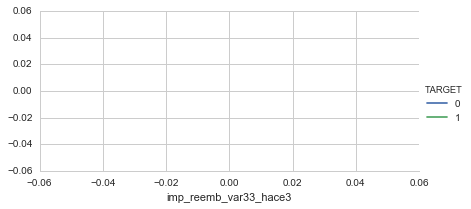

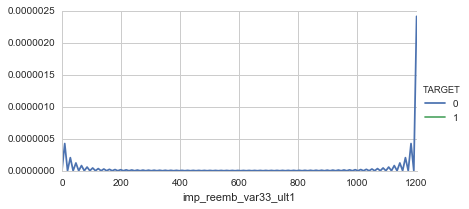

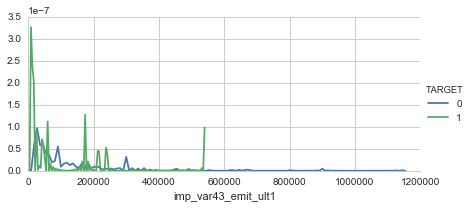

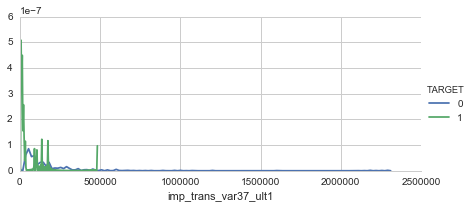

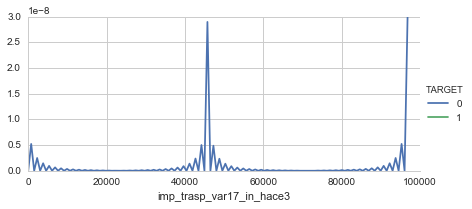

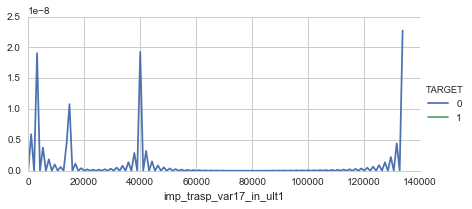

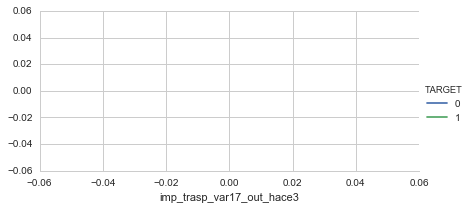

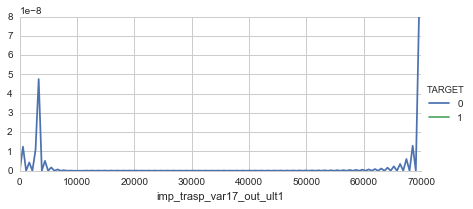

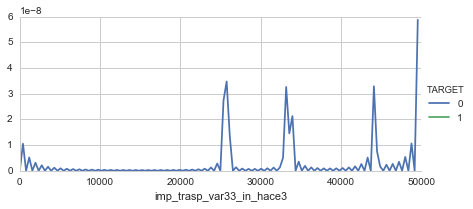

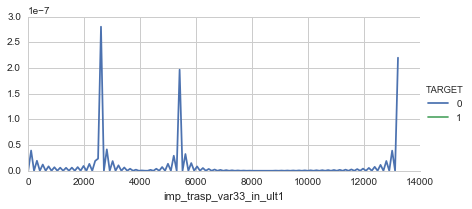

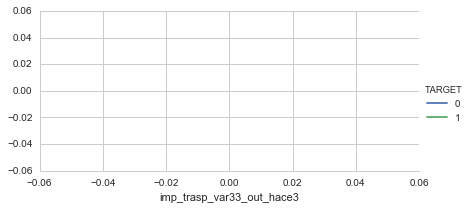

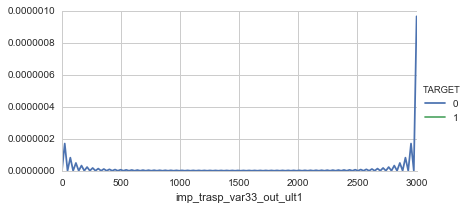

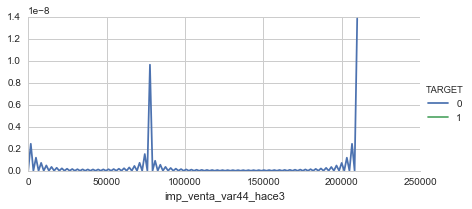

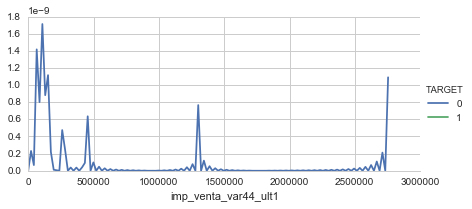

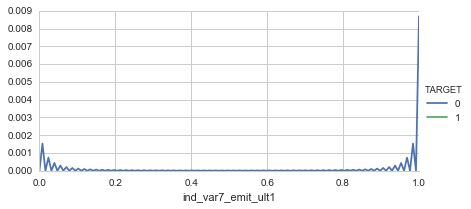

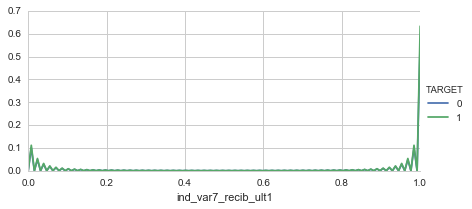

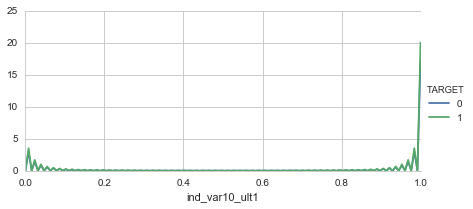

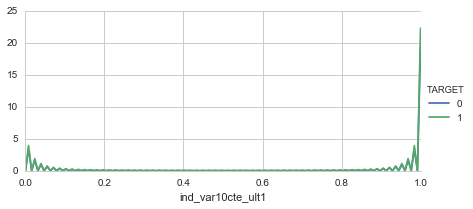

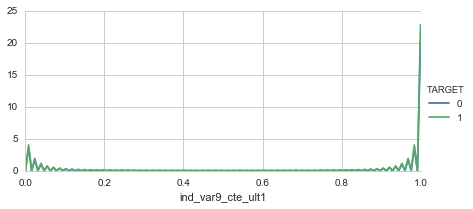

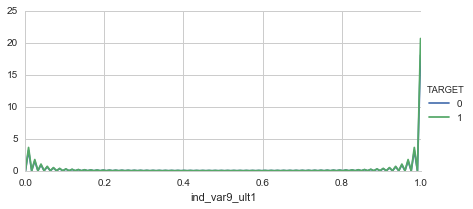

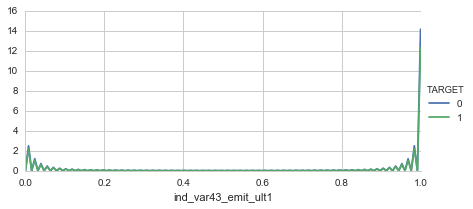

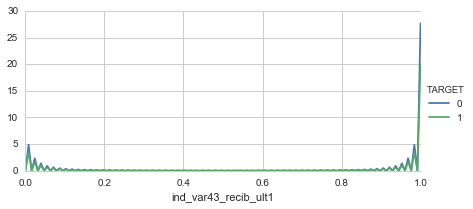

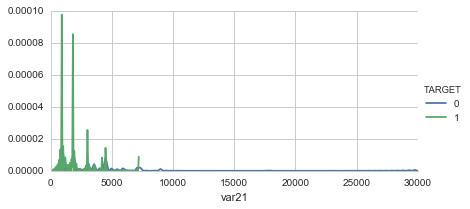

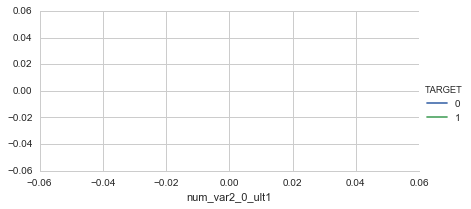

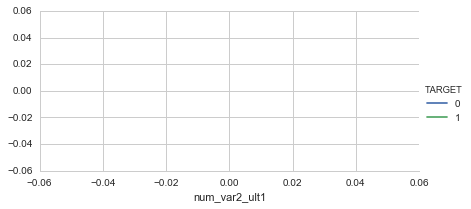

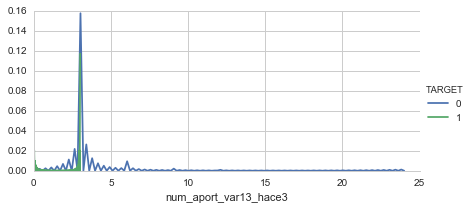

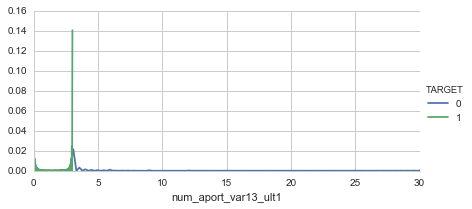

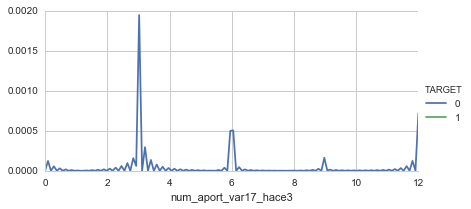

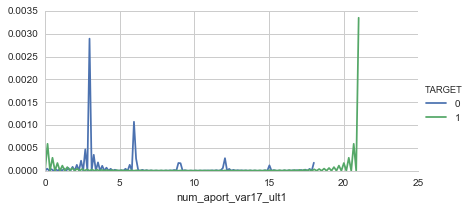

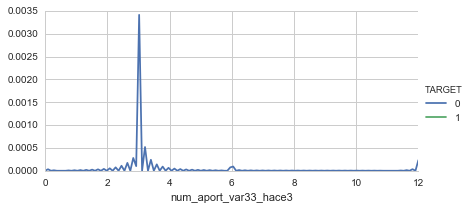

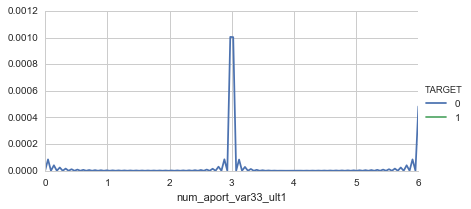

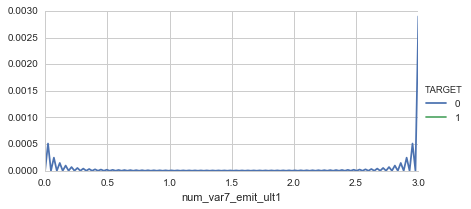

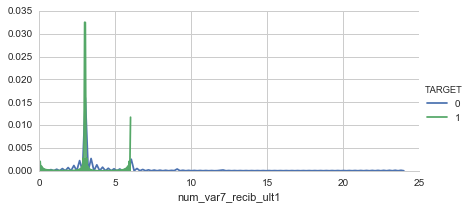

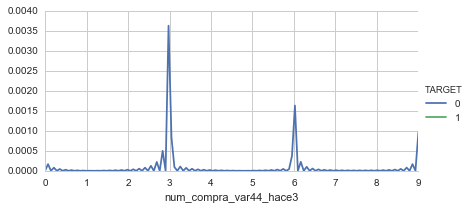

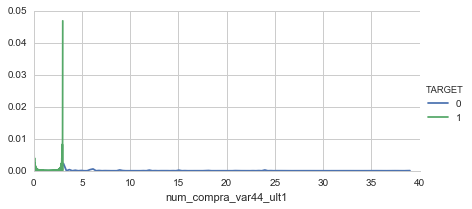

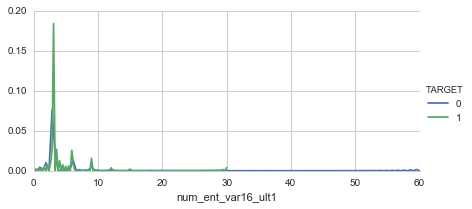

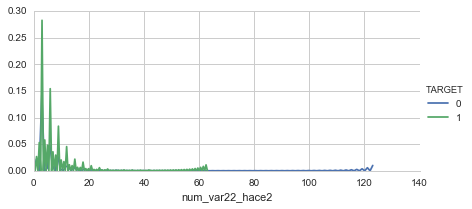

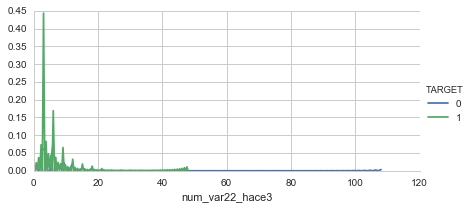

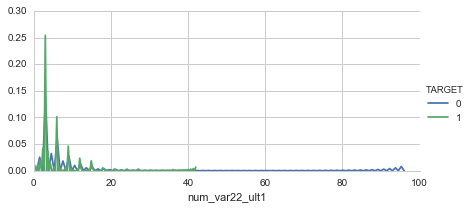

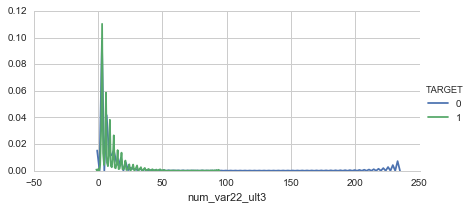

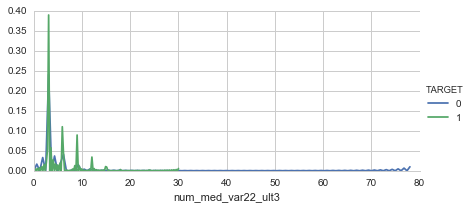

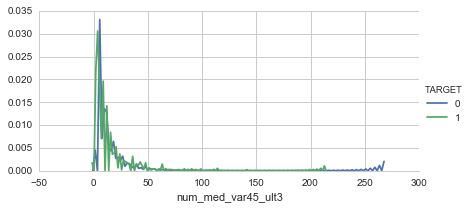

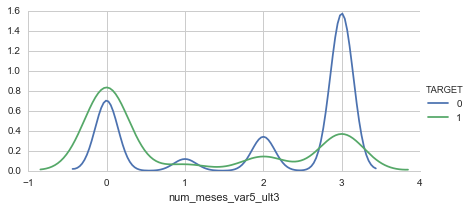

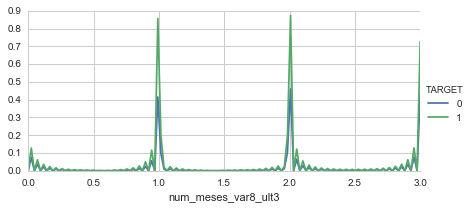

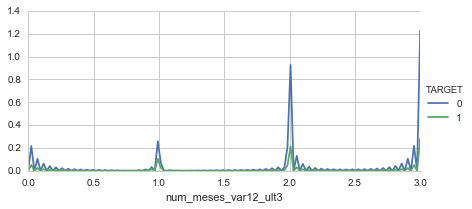

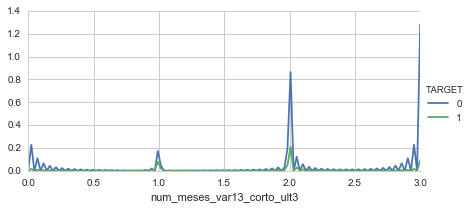

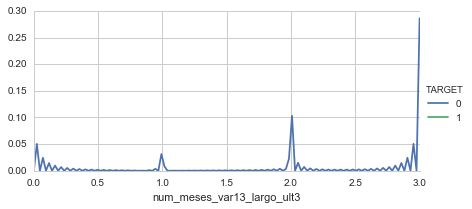

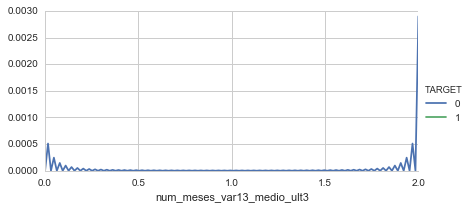

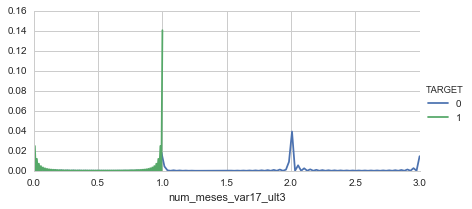

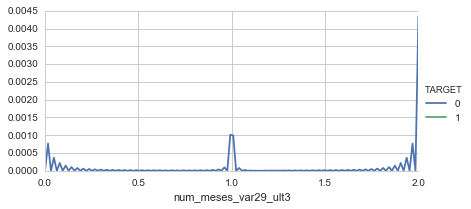

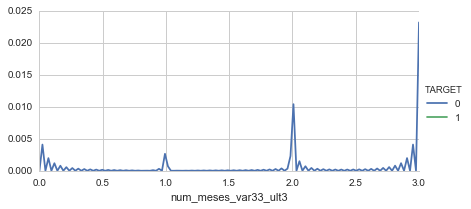

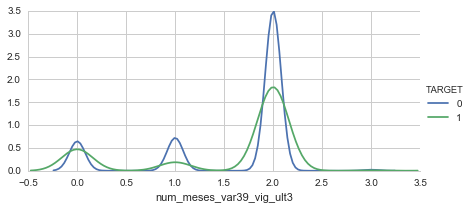

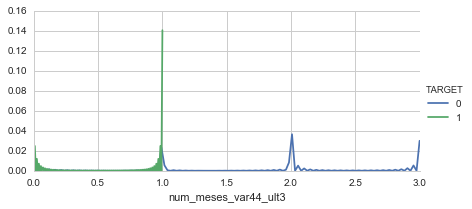

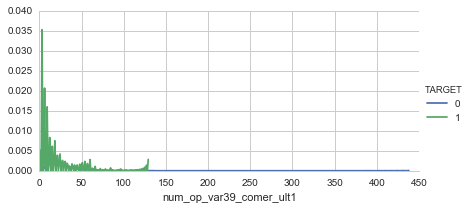

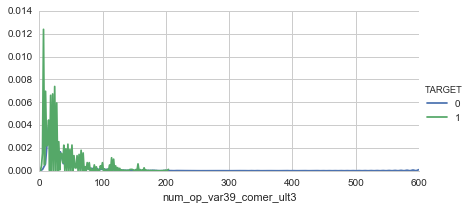

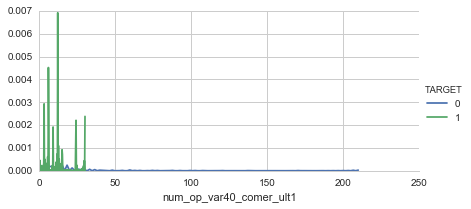

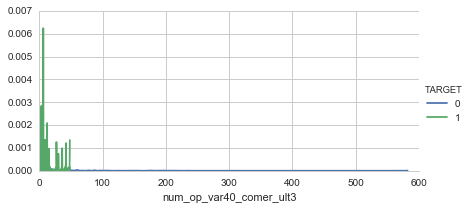

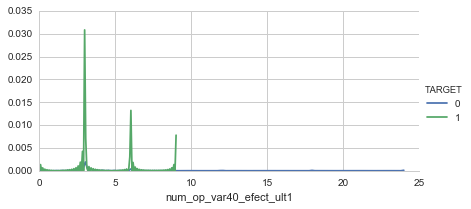

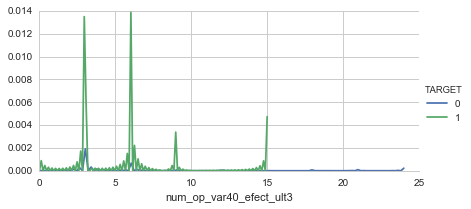

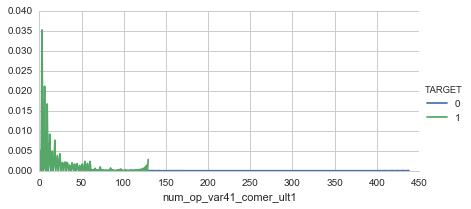

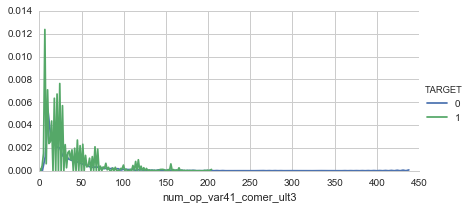

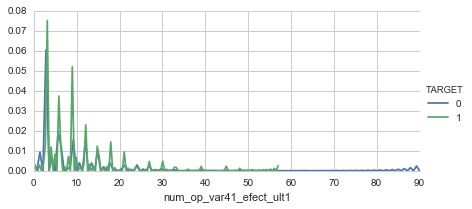

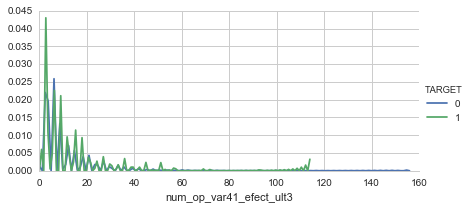

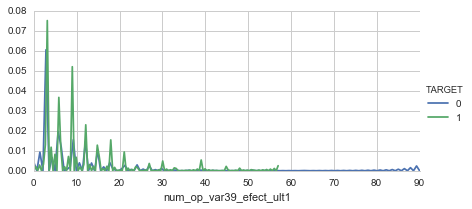

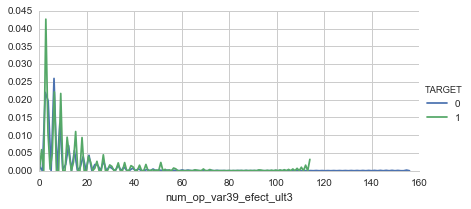

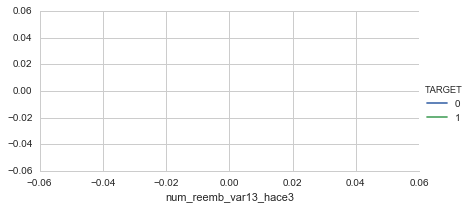

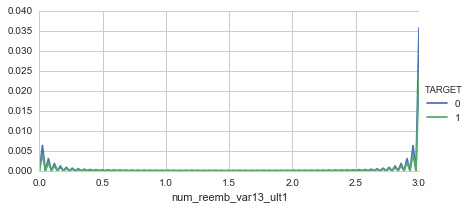

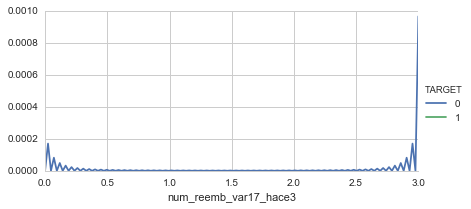

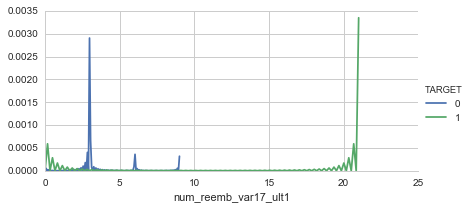

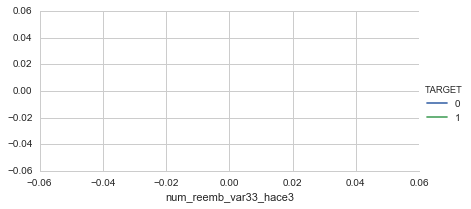

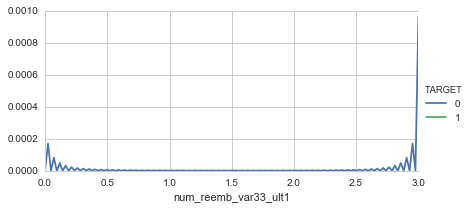

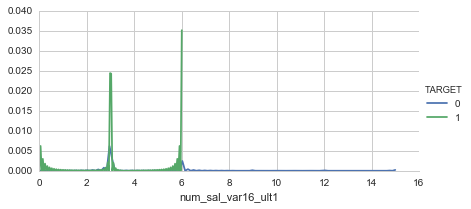

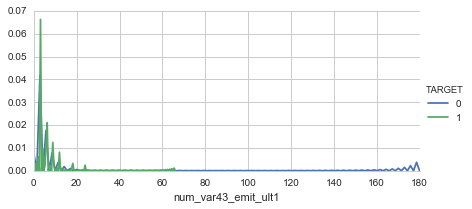

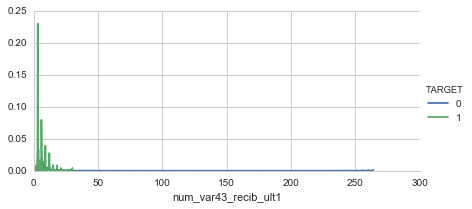

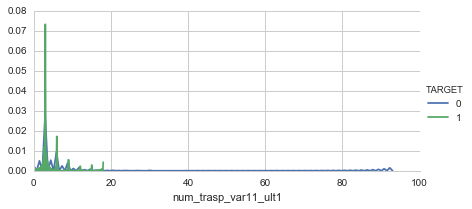

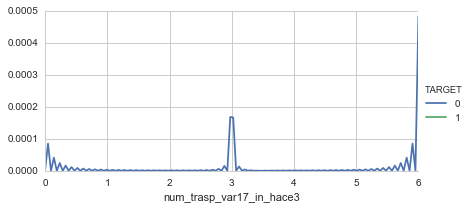

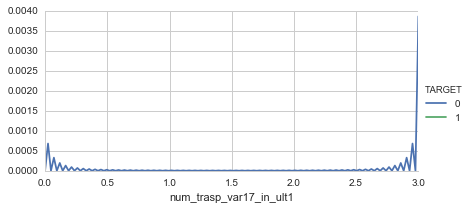

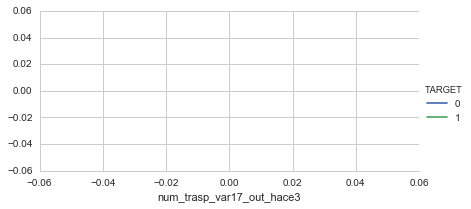

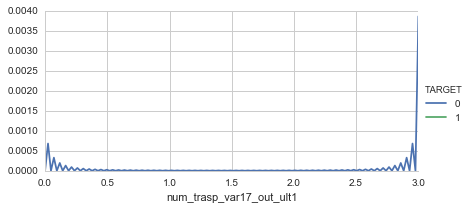

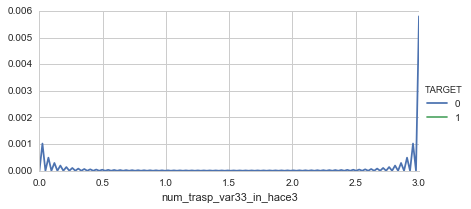

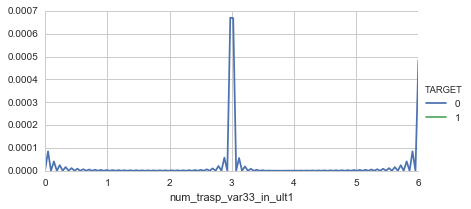

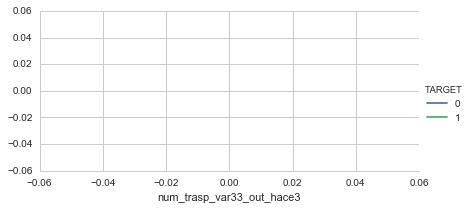

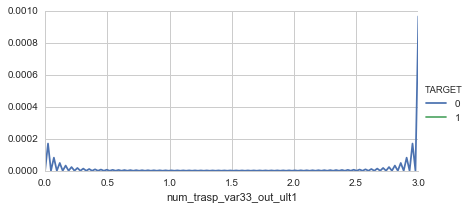

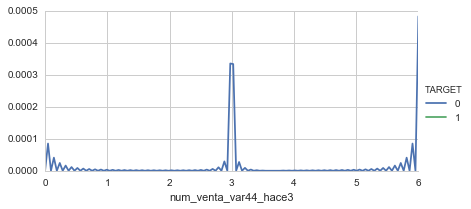

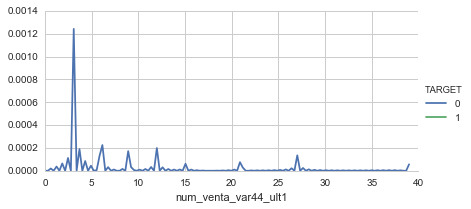

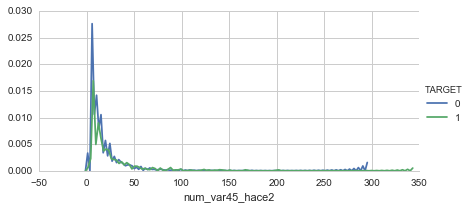

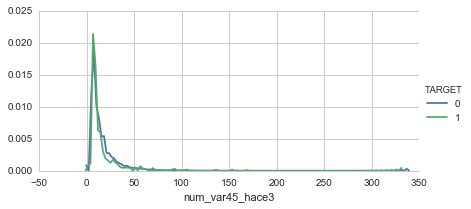

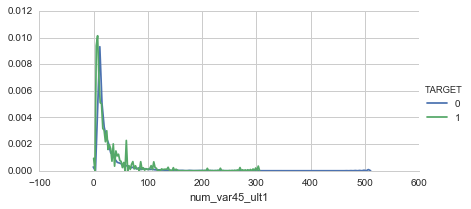

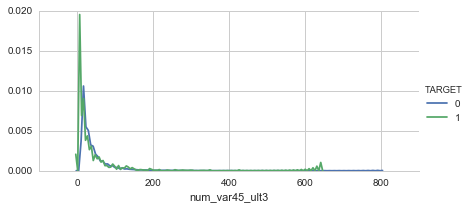

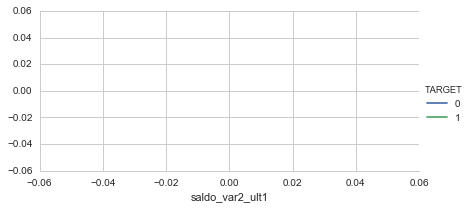

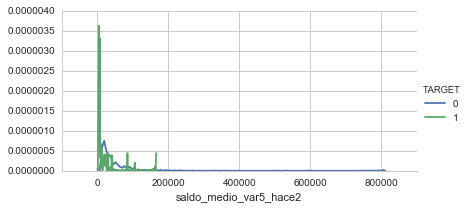

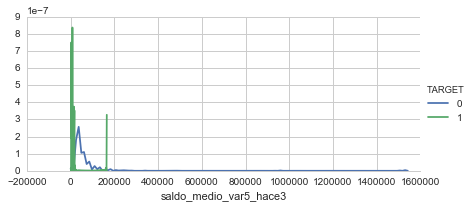

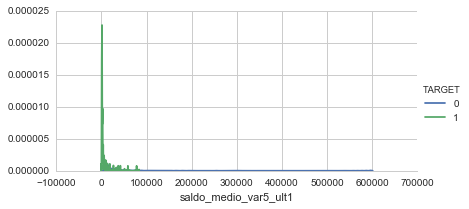

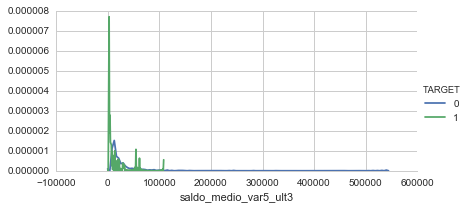

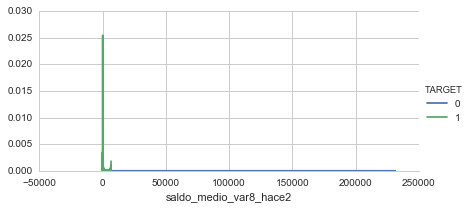

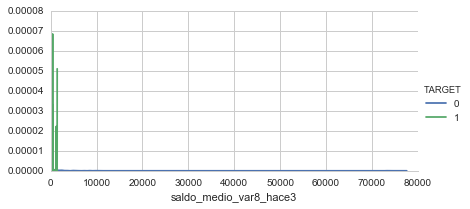

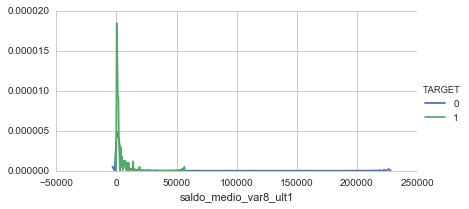

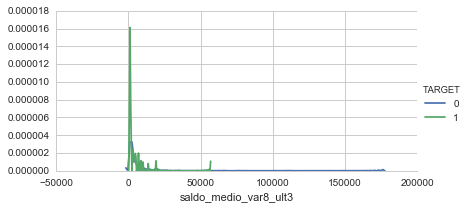

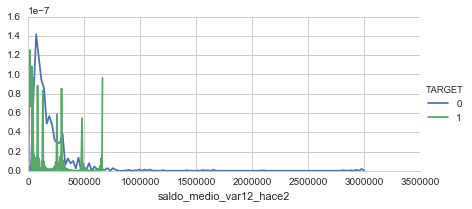

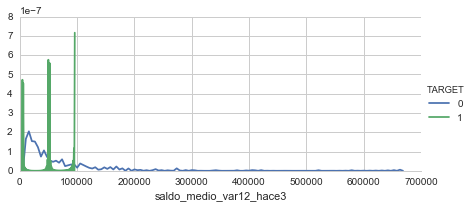

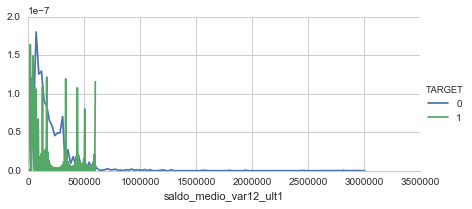

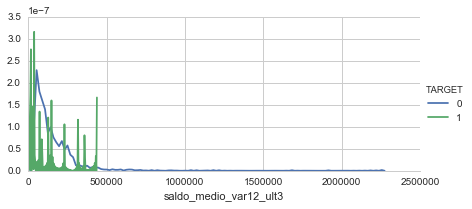

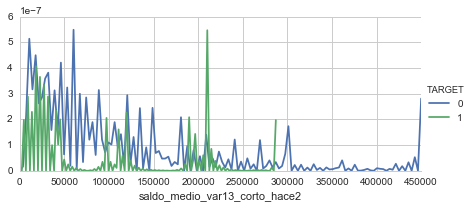

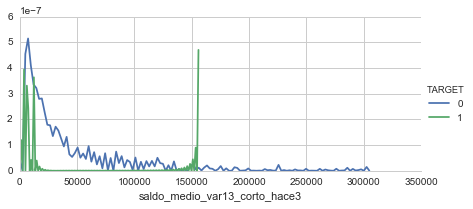

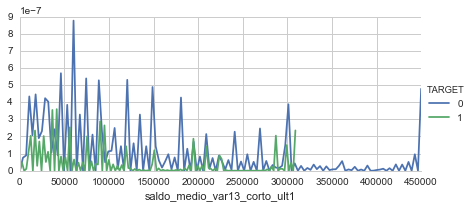

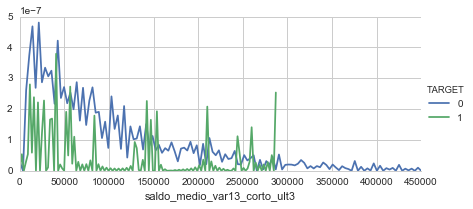

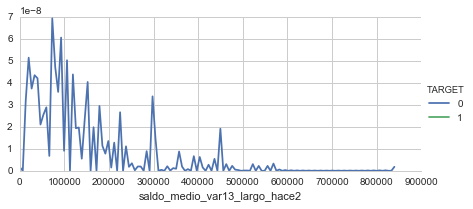

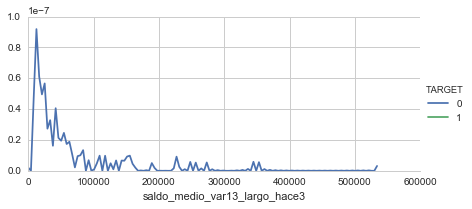

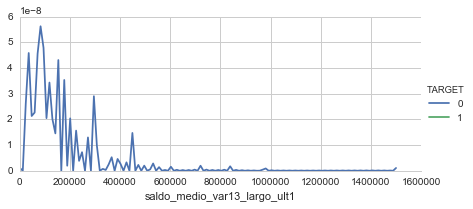

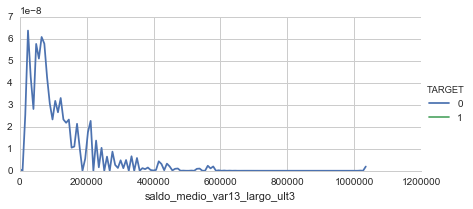

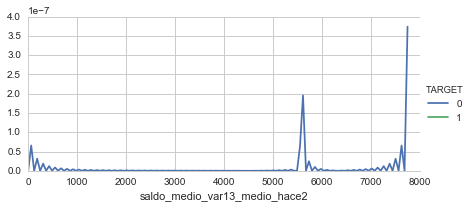

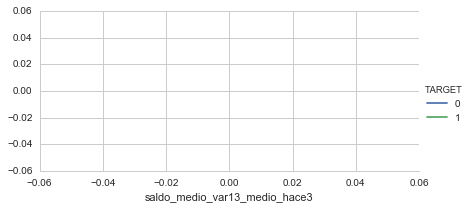

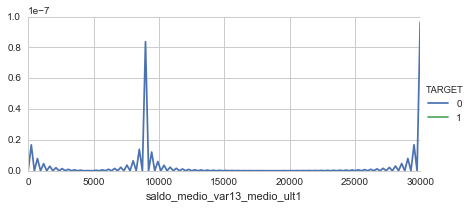

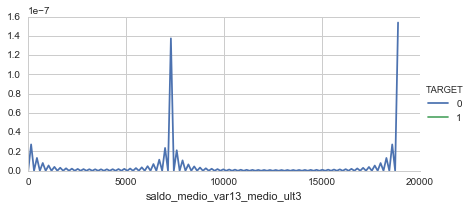

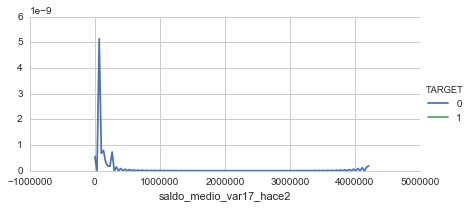

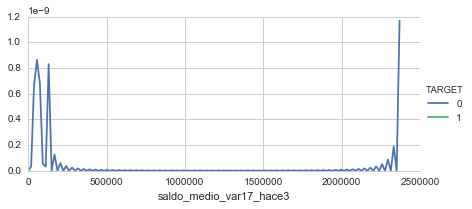

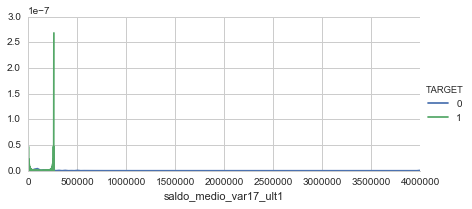

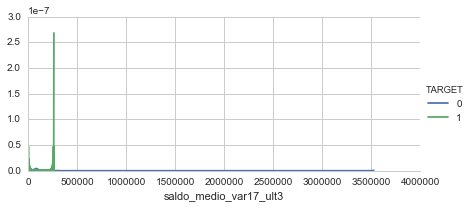

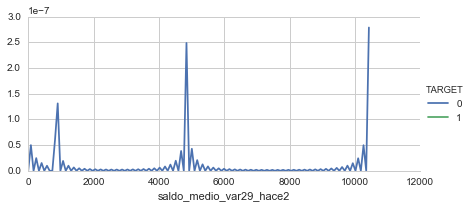

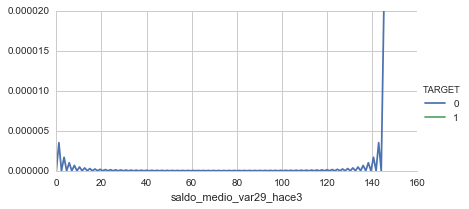

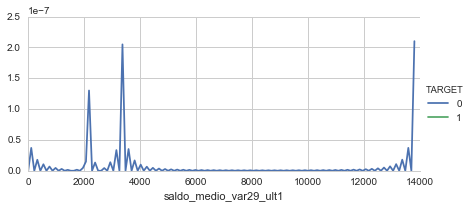

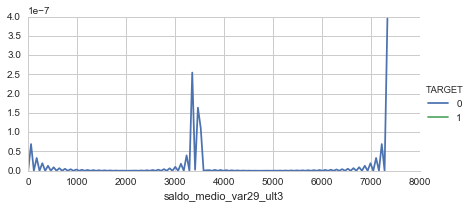

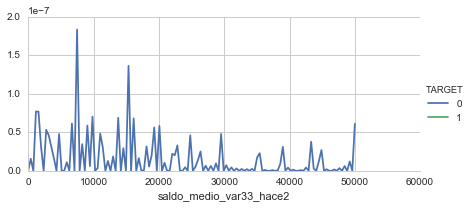

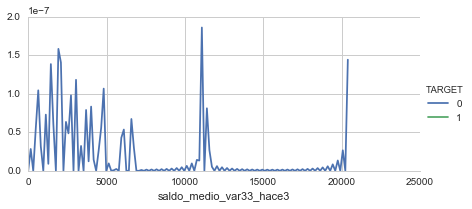

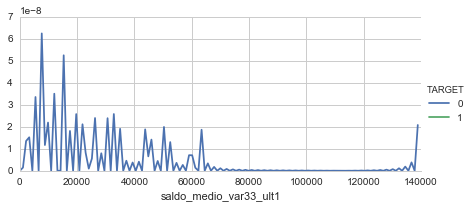

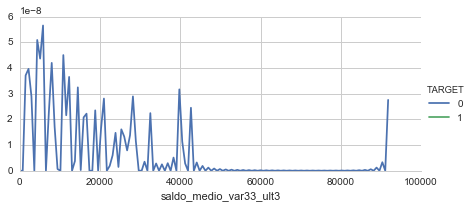

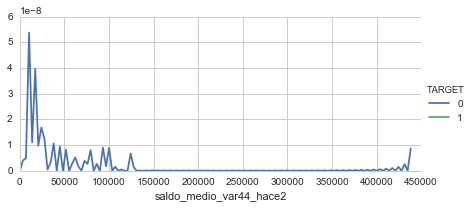

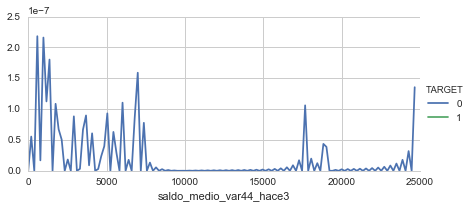

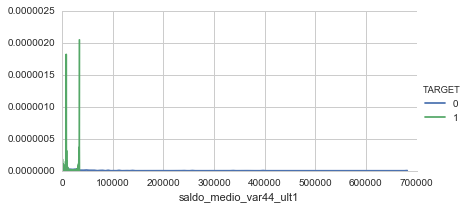

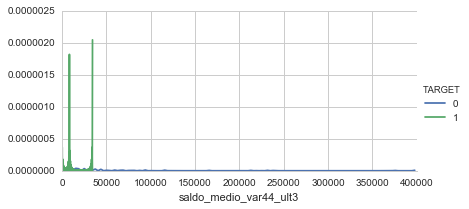

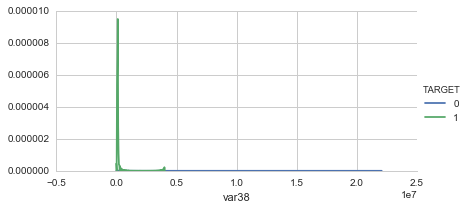

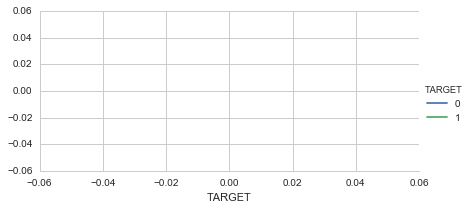

In [34]:
# pandas
import pandas as pd
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
train = pd.read_csv("C://users//Robert//Downloads//train.csv")
# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
sns.set_style('whitegrid')
%matplotlib inline
plt.rcParams['figure.max_open_warning']=300
colnames=list(train.columns.values)
for i in colnames[2:]:
        facet = sns.FacetGrid(train, hue="TARGET",aspect=2)
        facet.map(sns.kdeplot,i,shade= False)
        facet.add_legend()

imp_ent_var16_ult1


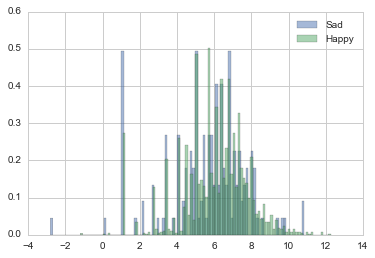

imp_op_var39_comer_ult1


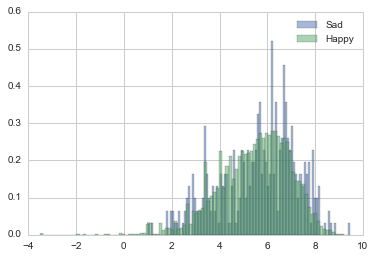

imp_op_var39_comer_ult3


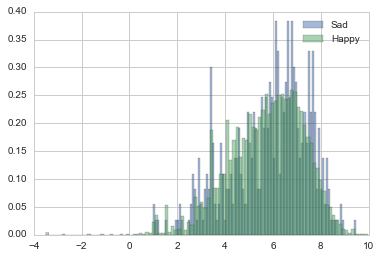

imp_op_var40_comer_ult1


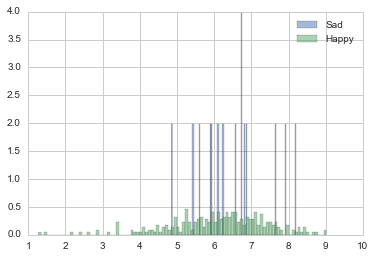

imp_op_var40_comer_ult3


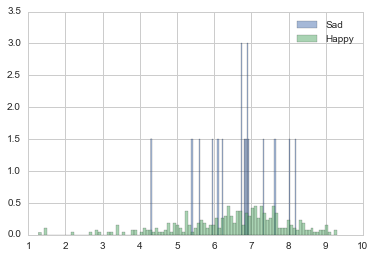

imp_op_var40_efect_ult1


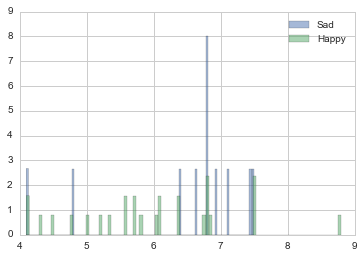

imp_op_var40_efect_ult3


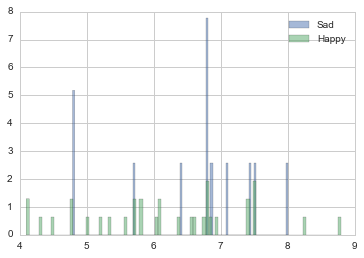

imp_op_var40_ult1


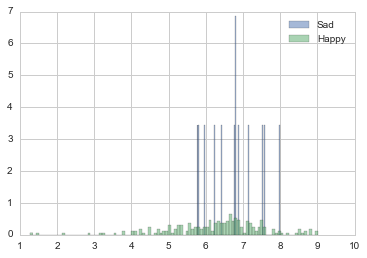

imp_op_var41_comer_ult1


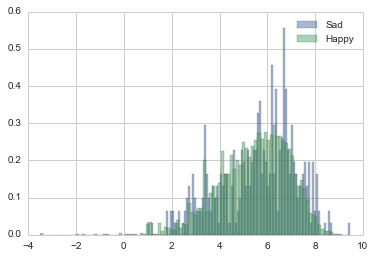

imp_op_var41_comer_ult3


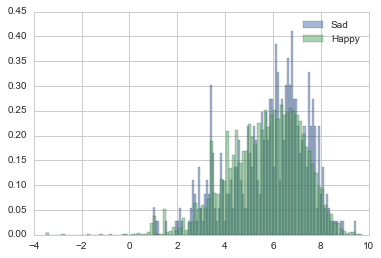

imp_op_var41_efect_ult1


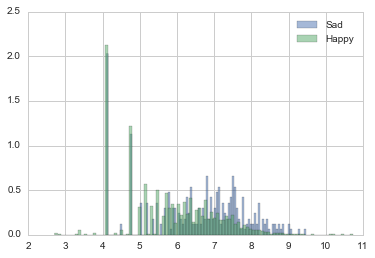

imp_op_var41_efect_ult3


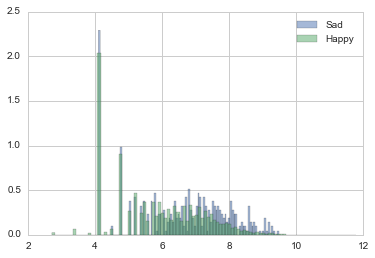

imp_op_var41_ult1


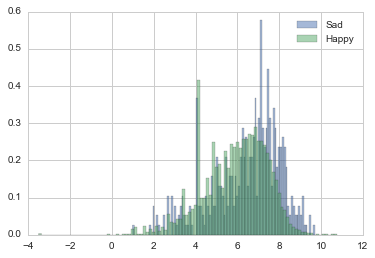

imp_op_var39_efect_ult1


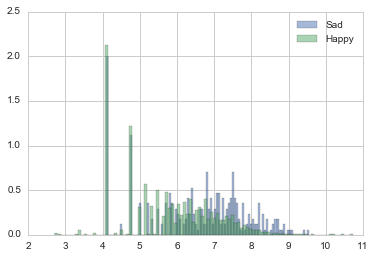

imp_op_var39_efect_ult3


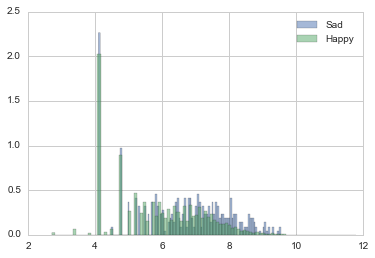

imp_op_var39_ult1


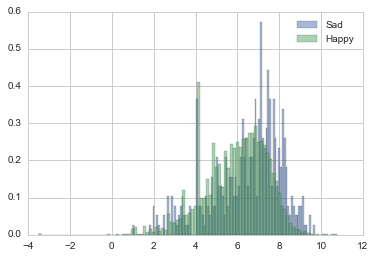

imp_sal_var16_ult1


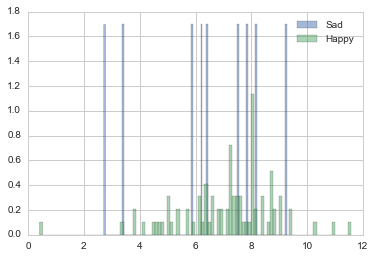

saldo_var1


AttributeError: max must be larger than min in range parameter.

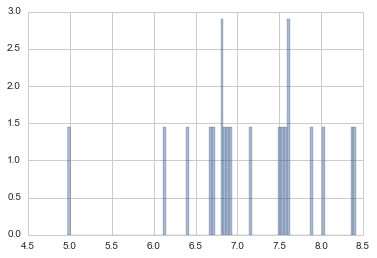

In [58]:
from matplotlib import pyplot
for i in train.filter(regex='^(imp|sal)').columns:
    print(i)  
    x = np.log(train.loc[(train['TARGET']==1) & train[i]>0,i])
    y = np.log(train.loc[(train['TARGET']==0) & train[i]>0,i])

    bins = 100
    pyplot.hist(x, bins, alpha=0.5, label='Sad',normed=1)
    pyplot.hist(y, bins, alpha=0.5, label='Happy',normed=1)
    pyplot.legend(loc='upper right')
    pyplot.show()


In [60]:
train.describe()

ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
75%    113748.750000       2.000000     40.000000            0.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             21024.810000   

       imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count             76020.000000             76020.000000   
mean                  3.559130                 6.472698   
std                  93.155749               153.737066   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                8237.820000             11073.570000   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3      ...       \
count             76020.000000             76020.000000      ...        
mean                  0.412946                 0.567352      ...        
std                  30.604864                36.513513      ...        
min                   0.000000                 0.000000      ...        
25%                   0.000000                 0.000000      ...        
50%                   0.000000                 0.000000      ...        
75%                   0.000000                 0.000000      ...        
max                6600.000000              6600.000000      ...        

       saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
count             76020.000000             76020.000000   
mean                  7.935824                 1.365146   
std                 455.887218               113.959637   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               50003.880000             20385.720000   

       saldo_medio_var33_ult1  saldo_medio_var33_ult3  \
count            76020.000000            76020.000000   
mean                12.215580                8.784074   
std                783.207399              538.439211   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max             138831.630000            91778.730000   

       saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
count             76020.000000             76020.000000   
mean                 31.505324                 1.858575   
std                2013.125393               147.786584   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max              438329.220000             24650.010000   

       saldo_medio_var44_ult1  saldo_medio_var44_ult3       

In [81]:
a=train.describe()
a.drop(['ID','TARGET'],axis=1,inplace=True)
a=a.transpose()
a['Range']=a['max']-a['min']
log_features=a[(a['Range']>1e4)&(a['min']>=0)].index


In [80]:
train.describe([.001,.50,.999])

ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
0.1%      154.019000 -999999.000000      9.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
99.9%  151684.962000     174.000000     92.000000        12000.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
0.1%                  0.000000                 0.000000   
50%                   0.000000                 0.000000   
99.9%              4048.858320              6548.713830   
max               12888.030000             21024.810000   

       imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count             76020.000000             76020.000000   
mean                  3.559130                 6.472698   
std                  93.155749               153.737066   
min                   0.000000                 0.000000   
0.1%                  0.000000                 0.000000   
50%                   0.000000                 0.000000   
99.9%              1068.705780              1930.669620   
max                8237.820000             11073.570000   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3      ...       \
count             76020.000000             76020.000000      ...        
mean                  0.412946                 0.567352      ...        
std                  30.604864                36.513513      ...        
min                   0.000000                 0.000000      ...        
0.1%                  0.000000                 0.000000      ...        
50%                   0.000000                 0.000000      ...        
99.9%                 0.000000                 0.000000      ...        
max                6600.000000              6600.000000      ...        

       saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
count             76020.000000             76020.000000   
mean                  7.935824                 1.365146   
std                 455.887218               113.959637   
min                   0.000000                 0.000000   
0.1%                  0.000000                 0.000000   
50%                   0.000000                 0.000000   
99.9%                 0.000000                 0.000000   
max               50003.880000             20385.720000   

       saldo_medio_var33_ult1  saldo_medio_var33_ult3  \
count            76020.000000            76020.000000   
mean                12.215580                8.784074   
std                783.207399              538.439211   
min                  0.000000                0.000000   
0.1%                 0.000000                0.000000   
50%                  0.000000                0.000000   
99.9%                0.000000                0.000000   
max             138831.630000            91778.730000   

       saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
count             76020.000000             76020.000000   
mean                 31.505324                 1.858575   
std                2013.125393               147.786584   
min                   0.000000                 0.000000   
0.1%                  0.000000                 0.000000   
50%                   0.000000                 0.000000   
99.9%              2452.820640                 0.000000   
max              438329.220000             24650.010000   

       saldo_medio_var44_ult1  saldo_medio_var44_ult3       

In [86]:
log_features=a[(a['Range']>1e4)&(a['min']>=0)].index

In [92]:
b=train[log_features]
b[b==0]=np.NaN

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:2334: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.where(-key, value, inplace=True)


In [95]:
f=b.min()
f.min()

0.029999999999999999

In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv("C://users//Robert//Downloads//train.csv")
test = pd.read_csv("C://users//Robert//Downloads//test.csv")

# clean and split data
train.loc[train['var3']==-999999,'var3']=-1
test.loc[train['var3']==-999999,'var3']=-1

# remove constant columns (std = 0)
ID=test['ID']
target=train['TARGET']
train.drop(['TARGET','ID'],axis=1,inplace=True)
test.drop('ID',axis=1,inplace=True)
train.drop(train.filter(regex='delta'),axis=1,inplace=True)
test.drop(test.filter(regex='delta'),axis=1,inplace=True)
remove = []
for col in train.columns:
    if train[col].std() == 0:
        print("Removing constant feature %s" % col)
        remove.append(col)

train.drop(remove, axis=1, inplace=True)
test.drop(remove, axis=1, inplace=True)

# remove duplicated columns
remove = []
cols = train.columns
for i in range(len(cols)-1):
    v = train[cols[i]].values
    for j in range(i+1,len(cols)):
        if np.array_equal(v,train[cols[j]].values):
            print("Feature %s and %s are equal, removing %s" % (train[cols[i]].name, train[cols[j]].name, train[cols[j]].name))
            remove.append(cols[j])

train.drop(remove, axis=1, inplace=True)
test.drop(remove, axis=1, inplace=True)

#there are some big ranges in there.  Maybe log will help--lets look for which ones.
a=train.describe()
a=a.transpose()
a['Range']=a['max']-a['min']
log_features=a[(a['Range']>1e4)&(a['min']>=0)].index

"""for col in log_features:
    label='LOG('+col+')'
    train[label]=np.log(train[col])
    test[label]=np.log(test[col])
test.replace([np.inf, -np.inf], -6,inplace=True)
train.replace([np.inf, -np.inf], -6,inplace=True)
"""
#id is first column, Target is last column
features = train.columns[1:-1]
for col in list(train.filter(regex='^s').columns):
    label=col+'pop'
    train[label]=(train[col]!=0).astype(int)
    test[label]=(test[col]!=0).astype(int)

train['0count']=(train[features] == 0.).astype(int).sum(axis=1)
test['0count']=(test[features] == 0.).astype(int).sum(axis=1)

train['saldo_var']=train[features].filter(regex='^saldo_v').sum(axis=1)
test['saldo_var']=test[features].filter(regex='^saldo_v').sum(axis=1)
train['sal_med']=train[features].filter(regex='^saldo_med').sum(axis=1)
test['sal_med']=test[features].filter(regex='^saldo_med').sum(axis=1)
train['sal_hace']=train[features].filter(regex='^(saldo)[A-Za-z0-9_]*hace').sum(axis=1)
test['sal_hace']=test[features].filter(regex='^(saldo)[A-Za-z0-9_]*hace').sum(axis=1)
train['sal_ult']=train[features].filter(regex='^(saldo)[A-Za-z0-9_]*ult').sum(axis=1)
test['sal_ult']=test[features].filter(regex='^(saldo)[A-Za-z0-9_]*ult').sum(axis=1)
train['saldo']=train[features].filter(regex='^(saldo)').sum(axis=1)
test['saldo']=test[features].filter(regex='^(saldo)').sum(axis=1)
train['num_var']=train[features].filter(regex='^(num_var)').sum(axis=1)
test['num_var']=test[features].filter(regex='^(num_var)').sum(axis=1)
train['num_op']=train[features].filter(regex='^num_op').sum(axis=1)
test['num_op']=test[features].filter(regex='^num_op').sum(axis=1)
train['imp']=train[features].filter(regex='^imp').sum(axis=1)
test['imp']=test[features].filter(regex='^imp').sum(axis=1)
train['young_person']=(train['var15']<=23).astype(int)
test['young_person']=(test['var15']<=23).astype(int)
train.filter(regex='^L')


Removing constant feature ind_var2_0
Removing constant feature ind_var2
Removing constant feature ind_var27_0
Removing constant feature ind_var28_0
Removing constant feature ind_var28
Removing constant feature ind_var27
Removing constant feature ind_var41
Removing constant feature ind_var46_0
Removing constant feature ind_var46
Removing constant feature num_var27_0
Removing constant feature num_var28_0
Removing constant feature num_var28
Removing constant feature num_var27
Removing constant feature num_var41
Removing constant feature num_var46_0
Removing constant feature num_var46
Removing constant feature saldo_var28
Removing constant feature saldo_var27
Removing constant feature saldo_var41
Removing constant feature saldo_var46
Removing constant feature imp_amort_var18_hace3
Removing constant feature imp_amort_var34_hace3
Removing constant feature imp_reemb_var13_hace3
Removing constant feature imp_reemb_var33_hace3
Removing constant feature imp_trasp_var17_out_hace3
Removing constan

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[76020 rows x 0 columns]

In [2]:
train['ind_var30_0*young_person']=train['ind_var30_0']*train['young_person']
train['num_var37_med_ult2*saldo_medio_var33_ult1']=train['num_var37_med_ult2']*train['saldo_medio_var33_ult1']
train['young_person*young_person']=train['young_person']*train['young_person']
train['ind_var5_0*young_person']=train['ind_var5_0']*train['young_person']
train['ind_var43_recib_ult1*saldo_medio_var13_largo_hace3pop']=train['ind_var43_recib_ult1']*train['saldo_medio_var13_largo_hace3pop']
train['ind_var9_cte_ult1*saldo_medio_var13_corto_hace3pop']=train['ind_var9_cte_ult1']*train['saldo_medio_var13_corto_hace3pop']
train['imp_aport_var17_ult1*ind_var40_0']=train['imp_aport_var17_ult1']*train['ind_var40_0']
train['ind_var9_ult1*saldo_medio_var13_corto_hace3pop']=train['ind_var9_ult1']*train['saldo_medio_var13_corto_hace3pop']
train['ind_var1_0*saldo_medio_var13_corto_hace3pop']=train['ind_var1_0']*train['saldo_medio_var13_corto_hace3pop']
train['ind_var40_0*saldo_medio_var13_corto_hace3pop']=train['ind_var40_0']*train['saldo_medio_var13_corto_hace3pop']
train['num_trasp_var17_out_ult1*saldo_var1']=train['num_trasp_var17_out_ult1']*train['saldo_var1']
train['ind_var31*saldo_medio_var8_hace3']=train['ind_var31']*train['saldo_medio_var8_hace3']
train['ind_var44*saldo_medio_var8_hace3']=train['ind_var44']*train['saldo_medio_var8_hace3']
train['saldo_medio_var8_hace3*saldo_var31pop']=train['saldo_medio_var8_hace3']*train['saldo_var31pop']
train['saldo_medio_var8_hace3*saldo_var44pop']=train['saldo_medio_var8_hace3']*train['saldo_var44pop']
train['ind_var24_0*ind_var7_recib_ult1']=train['ind_var24_0']*train['ind_var7_recib_ult1']
train['ind_var10cte_ult1*saldo_medio_var13_corto_ult1pop']=train['ind_var10cte_ult1']*train['saldo_medio_var13_corto_ult1pop']
train['ind_var10cte_ult1*saldo_medio_var13_corto_ult3pop']=train['ind_var10cte_ult1']*train['saldo_medio_var13_corto_ult3pop']
train['ind_var24*ind_var7_recib_ult1']=train['ind_var24']*train['ind_var7_recib_ult1']
train['ind_var7_recib_ult1*saldo_var24pop']=train['ind_var7_recib_ult1']*train['saldo_var24pop']
train['ind_var24*young_person']=train['ind_var24']*train['young_person']
train['saldo_var24pop*young_person']=train['saldo_var24pop']*train['young_person']
train['ind_var43_recib_ult1*saldo_medio_var44_hace2pop']=train['ind_var43_recib_ult1']*train['saldo_medio_var44_hace2pop']
train['ind_var10cte_ult1*saldo_var13_cortopop']=train['ind_var10cte_ult1']*train['saldo_var13_cortopop']
train['ind_var30_0*ind_var30_0']=train['ind_var30_0']*train['ind_var30_0']
train['num_op_var39_ult3*num_var8_0']=train['num_op_var39_ult3']*train['num_var8_0']
train['ind_var12_0*ind_var20_0']=train['ind_var12_0']*train['ind_var20_0']
train['ind_var20_0*ind_var20_0']=train['ind_var20_0']*train['ind_var20_0']
train['ind_var20_0*ind_var30_0']=train['ind_var20_0']*train['ind_var30_0']
train['ind_var20_0*young_person']=train['ind_var20_0']*train['young_person']
train['ind_var14*saldo_medio_var12_hace3pop']=train['ind_var14']*train['saldo_medio_var12_hace3pop']
train['ind_var19*saldo_medio_var12_hace3pop']=train['ind_var19']*train['saldo_medio_var12_hace3pop']
train['ind_var24_0*young_person']=train['ind_var24_0']*train['young_person']
train['ind_var5_0*ind_var5_0']=train['ind_var5_0']*train['ind_var5_0']
train['ind_var13_largo*saldo_medio_var13_corto_hace3pop']=train['ind_var13_largo']*train['saldo_medio_var13_corto_hace3pop']
train['0count*saldo_medio_var12_hace3pop']=train['0count']*train['saldo_medio_var12_hace3pop']
train['ind_var13*ind_var37_cte']=train['ind_var13']*train['ind_var37_cte']
train['ind_var13_0*ind_var37_cte']=train['ind_var13_0']*train['ind_var37_cte']
train['ind_var13_largo_0*saldo_medio_var13_corto_hace3pop']=train['ind_var13_largo_0']*train['saldo_medio_var13_corto_hace3pop']
train['ind_var37_cte*saldo_var13pop']=train['ind_var37_cte']*train['saldo_var13pop']
train['ind_var12*saldo_var13_largopop']=train['ind_var12']*train['saldo_var13_largopop']
train['ind_var13_largo*saldo_var12pop']=train['ind_var13_largo']*train['saldo_var12pop']
train['ind_var24*num_trasp_var17_out_ult1']=train['ind_var24']*train['num_trasp_var17_out_ult1']
train['saldo_var12pop*saldo_var13_largopop']=train['saldo_var12pop']*train['saldo_var13_largopop']
train['imp_op_var41_ult1*imp_trasp_var17_in_ult1']=train['imp_op_var41_ult1']*train['imp_trasp_var17_in_ult1']
train['saldo_medio_var5_hace3pop*young_person']=train['saldo_medio_var5_hace3pop']*train['young_person']
train['ind_var13*ind_var19']=train['ind_var13']*train['ind_var19']
train['ind_var13_largo_0*ind_var24_0']=train['ind_var13_largo_0']*train['ind_var24_0']
train['imp_trasp_var33_in_hace3*num_meses_var5_ult3']=train['imp_trasp_var33_in_hace3']*train['num_meses_var5_ult3']
train['saldo_medio_var8_hace3pop*young_person']=train['saldo_medio_var8_hace3pop']*train['young_person']
train['ind_var32_0*ind_var43_recib_ult1']=train['ind_var32_0']*train['ind_var43_recib_ult1']
train['ind_var43_recib_ult1*saldo_var32pop']=train['ind_var43_recib_ult1']*train['saldo_var32pop']
train['ind_var25_cte*ind_var7_recib_ult1']=train['ind_var25_cte']*train['ind_var7_recib_ult1']
train['ind_var26_cte*ind_var7_recib_ult1']=train['ind_var26_cte']*train['ind_var7_recib_ult1']
train['ind_var12_0*young_person']=train['ind_var12_0']*train['young_person']
train['ind_var13_largo*saldo_medio_var12_ult1pop']=train['ind_var13_largo']*train['saldo_medio_var12_ult1pop']
train['ind_var13_largo*saldo_medio_var12_ult3pop']=train['ind_var13_largo']*train['saldo_medio_var12_ult3pop']
train['ind_var19*ind_var7_recib_ult1']=train['ind_var19']*train['ind_var7_recib_ult1']
train['ind_var14_0*ind_var19']=train['ind_var14_0']*train['ind_var19']
train['ind_var13_largo*ind_var24_0']=train['ind_var13_largo']*train['ind_var24_0']
train['ind_var24_0*saldo_var13_largopop']=train['ind_var24_0']*train['saldo_var13_largopop']
train['ind_var20*ind_var43_recib_ult1']=train['ind_var20']*train['ind_var43_recib_ult1']
train['ind_var20_0*ind_var43_recib_ult1']=train['ind_var20_0']*train['ind_var43_recib_ult1']
train['ind_var43_recib_ult1*saldo_var20pop']=train['ind_var43_recib_ult1']*train['saldo_var20pop']
train['num_reemb_var13_ult1*num_var12_0']=train['num_reemb_var13_ult1']*train['num_var12_0']
train['ind_var25_0*ind_var7_recib_ult1']=train['ind_var25_0']*train['ind_var7_recib_ult1']
train['ind_var7_recib_ult1*saldo_var25pop']=train['ind_var7_recib_ult1']*train['saldo_var25pop']
train['ind_var19*saldo_medio_var13_corto_ult1pop']=train['ind_var19']*train['saldo_medio_var13_corto_ult1pop']
train['ind_var19*saldo_medio_var13_corto_ult3pop']=train['ind_var19']*train['saldo_medio_var13_corto_ult3pop']
train['ind_var12_0*saldo_medio_var13_largo_hace3pop']=train['ind_var12_0']*train['saldo_medio_var13_largo_hace3pop']
train['ind_var13_largo*ind_var24']=train['ind_var13_largo']*train['ind_var24']
train['ind_var24*saldo_var13_largopop']=train['ind_var24']*train['saldo_var13_largopop']
train['saldo_var13_largopop*saldo_var24pop']=train['saldo_var13_largopop']*train['saldo_var24pop']
train['ind_var12*ind_var13_largo']=train['ind_var12']*train['ind_var13_largo']
train['ind_var12*saldo_var17pop']=train['ind_var12']*train['saldo_var17pop']
train['ind_var12_0*ind_var7_recib_ult1']=train['ind_var12_0']*train['ind_var7_recib_ult1']
train['ind_var13_largo*saldo_medio_var12_hace2pop']=train['ind_var13_largo']*train['saldo_medio_var12_hace2pop']
train['ind_var13_corto_0*ind_var37_cte']=train['ind_var13_corto_0']*train['ind_var37_cte']
train['ind_var37_cte*saldo_medio_var13_corto_ult1pop']=train['ind_var37_cte']*train['saldo_medio_var13_corto_ult1pop']
train['ind_var37_cte*saldo_medio_var13_corto_ult3pop']=train['ind_var37_cte']*train['saldo_medio_var13_corto_ult3pop']
train['ind_var13_corto*ind_var19']=train['ind_var13_corto']*train['ind_var19']
train['ind_var19*saldo_var13_cortopop']=train['ind_var19']*train['saldo_var13_cortopop']
train['ind_var14_0*saldo_medio_var13_largo_hace3pop']=train['ind_var14_0']*train['saldo_medio_var13_largo_hace3pop']
train['num_op_var41_comer_ult3*num_var26_0']=train['num_op_var41_comer_ult3']*train['num_var26_0']
train['saldo_medio_var13_corto_hace3pop*saldo_medio_var13_largo_ult1pop']=train['saldo_medio_var13_corto_hace3pop']*train['saldo_medio_var13_largo_ult1pop']
train['saldo_medio_var13_corto_hace3pop*saldo_medio_var13_largo_ult3pop']=train['saldo_medio_var13_corto_hace3pop']*train['saldo_medio_var13_largo_ult3pop']
train['ind_var7_recib_ult1*saldo_medio_var12_ult1pop']=train['ind_var7_recib_ult1']*train['saldo_medio_var12_ult1pop']
train['ind_var7_recib_ult1*saldo_medio_var12_ult3pop']=train['ind_var7_recib_ult1']*train['saldo_medio_var12_ult3pop']
train['ind_var10cte_ult1*saldo_medio_var13_corto_hace3pop']=train['ind_var10cte_ult1']*train['saldo_medio_var13_corto_hace3pop']
train['ind_var19*saldo_medio_var13_corto_hace2pop']=train['ind_var19']*train['saldo_medio_var13_corto_hace2pop']
train['ind_var13_corto*ind_var37_cte']=train['ind_var13_corto']*train['ind_var37_cte']
train['ind_var37_cte*saldo_var13_cortopop']=train['ind_var37_cte']*train['saldo_var13_cortopop']
train['ind_var13_largo*saldo_var24pop']=train['ind_var13_largo']*train['saldo_var24pop']
train['saldo_var17pop*saldo_var24pop']=train['saldo_var17pop']*train['saldo_var24pop']
train['saldo_medio_var13_corto_hace3pop*young_person']=train['saldo_medio_var13_corto_hace3pop']*train['young_person']
train['ind_var39_0*saldo_medio_var13_largo_hace3pop']=train['ind_var39_0']*train['saldo_medio_var13_largo_hace3pop']
train['saldo_medio_var8_hace3pop*saldo_var31pop']=train['saldo_medio_var8_hace3pop']*train['saldo_var31pop']
train['ind_var10_ult1*saldo_medio_var13_corto_ult1pop']=train['ind_var10_ult1']*train['saldo_medio_var13_corto_ult1pop']
train['ind_var10_ult1*saldo_medio_var13_corto_ult3pop']=train['ind_var10_ult1']*train['saldo_medio_var13_corto_ult3pop']
train['num_op_var40_hace2*saldo_medio_var13_medio_hace2']=train['num_op_var40_hace2']*train['saldo_medio_var13_medio_hace2']
train['ind_var37_cte*saldo_medio_var13_corto_hace2pop']=train['ind_var37_cte']*train['saldo_medio_var13_corto_hace2pop']
train['sal_med*saldo_medio_var17_ult1pop']=train['sal_med']*train['saldo_medio_var17_ult1pop']
train['ind_var13_largo_0*ind_var37_cte']=train['ind_var13_largo_0']*train['ind_var37_cte']
train['ind_var13_0*ind_var37_0']=train['ind_var13_0']*train['ind_var37_0']
train['ind_var13_0*saldo_var37pop']=train['ind_var13_0']*train['saldo_var37pop']
train['ind_var12*ind_var7_recib_ult1']=train['ind_var12']*train['ind_var7_recib_ult1']
train['ind_var13_corto*saldo_medio_var13_largo_hace3pop']=train['ind_var13_corto']*train['saldo_medio_var13_largo_hace3pop']
train['num_var17*saldo_var6pop']=train['num_var17']*train['saldo_var6pop']
train['saldo_medio_var13_corto_hace2pop*saldo_medio_var13_largo_hace3pop']=train['saldo_medio_var13_corto_hace2pop']*train['saldo_medio_var13_largo_hace3pop']
train['saldo_medio_var13_corto_ult1pop*saldo_medio_var13_largo_hace3pop']=train['saldo_medio_var13_corto_ult1pop']*train['saldo_medio_var13_largo_hace3pop']
train['saldo_medio_var13_corto_ult3pop*saldo_medio_var13_largo_hace3pop']=train['saldo_medio_var13_corto_ult3pop']*train['saldo_medio_var13_largo_hace3pop']
train['ind_var8*saldo_medio_var5_ult1pop']=train['ind_var8']*train['saldo_medio_var5_ult1pop']
train['ind_var8*saldo_medio_var5_ult3pop']=train['ind_var8']*train['saldo_medio_var5_ult3pop']
train['saldo_medio_var5_ult1pop*saldo_medio_var8_ult1pop']=train['saldo_medio_var5_ult1pop']*train['saldo_medio_var8_ult1pop']
train['saldo_medio_var5_ult1pop*saldo_medio_var8_ult3pop']=train['saldo_medio_var5_ult1pop']*train['saldo_medio_var8_ult3pop']
train['saldo_medio_var5_ult3pop*saldo_medio_var8_ult1pop']=train['saldo_medio_var5_ult3pop']*train['saldo_medio_var8_ult1pop']
train['saldo_medio_var5_ult3pop*saldo_medio_var8_ult3pop']=train['saldo_medio_var5_ult3pop']*train['saldo_medio_var8_ult3pop']
train['ind_var33_0*ind_var33_0']=train['ind_var33_0']*train['ind_var33_0']
train['ind_var32_0*young_person']=train['ind_var32_0']*train['young_person']
train['ind_var32_cte*young_person']=train['ind_var32_cte']*train['young_person']
train['saldo_var32pop*young_person']=train['saldo_var32pop']*train['young_person']
train['ind_var39_0*young_person']=train['ind_var39_0']*train['young_person']
train['ind_var41_0*young_person']=train['ind_var41_0']*train['young_person']
train['ind_var13*saldo_var37pop']=train['ind_var13']*train['saldo_var37pop']
train['ind_var37_0*saldo_var13pop']=train['ind_var37_0']*train['saldo_var13pop']
train['saldo_var13pop*saldo_var37pop']=train['saldo_var13pop']*train['saldo_var37pop']
train['imp_aport_var17_hace3*imp_op_var41_efect_ult3']=train['imp_aport_var17_hace3']*train['imp_op_var41_efect_ult3']
train['imp_aport_var17_ult1*saldo_medio_var29_ult3']=train['imp_aport_var17_ult1']*train['saldo_medio_var29_ult3']
train['imp_aport_var17_ult1*saldo_var20']=train['imp_aport_var17_ult1']*train['saldo_var20']
train['ind_var5*ind_var8']=train['ind_var5']*train['ind_var8']
train['ind_var5*saldo_medio_var8_ult1pop']=train['ind_var5']*train['saldo_medio_var8_ult1pop']
train['ind_var5*saldo_medio_var8_ult3pop']=train['ind_var5']*train['saldo_medio_var8_ult3pop']
train['ind_var5*saldo_var8pop']=train['ind_var5']*train['saldo_var8pop']
train['ind_var8*saldo_var5pop']=train['ind_var8']*train['saldo_var5pop']
train['num_var22_hace3*saldo_var18pop']=train['num_var22_hace3']*train['saldo_var18pop']
train['saldo_var5pop*saldo_var8pop']=train['saldo_var5pop']*train['saldo_var8pop']
train['ind_var13_largo*ind_var37_cte']=train['ind_var13_largo']*train['ind_var37_cte']
train['ind_var37_cte*saldo_var13_largopop']=train['ind_var37_cte']*train['saldo_var13_largopop']
train['ind_var5_0*saldo_medio_var13_largo_hace3pop']=train['ind_var5_0']*train['saldo_medio_var13_largo_hace3pop']
train['ind_var13_largo_0*saldo_medio_var12_ult1pop']=train['ind_var13_largo_0']*train['saldo_medio_var12_ult1pop']
train['ind_var13_largo_0*saldo_medio_var12_ult3pop']=train['ind_var13_largo_0']*train['saldo_medio_var12_ult3pop']
train['ind_var24_0*saldo_medio_var13_largo_ult1pop']=train['ind_var24_0']*train['saldo_medio_var13_largo_ult1pop']
train['ind_var24_0*saldo_medio_var13_largo_ult3pop']=train['ind_var24_0']*train['saldo_medio_var13_largo_ult3pop']
train['ind_var13_largo_0*ind_var37_0']=train['ind_var13_largo_0']*train['ind_var37_0']
train['ind_var13_largo_0*saldo_var37pop']=train['ind_var13_largo_0']*train['saldo_var37pop']
train['ind_var13_largo*ind_var37_0']=train['ind_var13_largo']*train['ind_var37_0']
train['ind_var37_0*saldo_var13_largopop']=train['ind_var37_0']*train['saldo_var13_largopop']
train['saldo_var13_largopop*saldo_var37pop']=train['saldo_var13_largopop']*train['saldo_var37pop']
train['ind_var10_ult1*saldo_medio_var13_corto_hace2pop']=train['ind_var10_ult1']*train['saldo_medio_var13_corto_hace2pop']
train['ind_var37_cte*saldo_medio_var8_hace3pop']=train['ind_var37_cte']*train['saldo_medio_var8_hace3pop']
train['ind_var37_cte*saldo_medio_var13_largo_ult3pop']=train['ind_var37_cte']*train['saldo_medio_var13_largo_ult3pop']
train['ind_var31*saldo_medio_var44_hace2pop']=train['ind_var31']*train['saldo_medio_var44_hace2pop']
train['ind_var33*num_aport_var13_ult1']=train['ind_var33']*train['num_aport_var13_ult1']
train['ind_var43_emit_ult1*saldo_medio_var33_ult3']=train['ind_var43_emit_ult1']*train['saldo_medio_var33_ult3']
train['ind_var44*saldo_medio_var44_hace2pop']=train['ind_var44']*train['saldo_medio_var44_hace2pop']
train['ind_var31_0*ind_var31_0']=train['ind_var31_0']*train['ind_var31_0']
train['ind_var7_recib_ult1*young_person']=train['ind_var7_recib_ult1']*train['young_person']
train['ind_var1_0*ind_var39_0']=train['ind_var1_0']*train['ind_var39_0']
train['ind_var1_0*ind_var9_cte_ult1']=train['ind_var1_0']*train['ind_var9_cte_ult1']
train['ind_var1_0*ind_var9_ult1']=train['ind_var1_0']*train['ind_var9_ult1']
train['ind_var1_0*ind_var40_0']=train['ind_var1_0']*train['ind_var40_0']
train['ind_var39_0*ind_var40_0']=train['ind_var39_0']*train['ind_var40_0']
train['ind_var40_0*ind_var40_0']=train['ind_var40_0']*train['ind_var40_0']
train['ind_var40_0*ind_var9_cte_ult1']=train['ind_var40_0']*train['ind_var9_cte_ult1']
train['imp_venta_var44_hace3*num_trasp_var17_out_ult1']=train['imp_venta_var44_hace3']*train['num_trasp_var17_out_ult1']
train['ind_var13_largo_0*saldo_medio_var12_hace2pop']=train['ind_var13_largo_0']*train['saldo_medio_var12_hace2pop']
train['ind_var9_ult1*saldo_medio_var44_hace2pop']=train['ind_var9_ult1']*train['saldo_medio_var44_hace2pop']
train['ind_var12*ind_var13_largo_0']=train['ind_var12']*train['ind_var13_largo_0']
train['ind_var5*saldo_medio_var8_hace2pop']=train['ind_var5']*train['saldo_medio_var8_hace2pop']
train['saldo_medio_var5_ult1pop*saldo_medio_var8_hace2pop']=train['saldo_medio_var5_ult1pop']*train['saldo_medio_var8_hace2pop']
train['saldo_medio_var5_ult3pop*saldo_medio_var8_hace2pop']=train['saldo_medio_var5_ult3pop']*train['saldo_medio_var8_hace2pop']
train['ind_var10_ult1*saldo_medio_var44_hace2pop']=train['ind_var10_ult1']*train['saldo_medio_var44_hace2pop']
train['ind_var13_largo_0*young_person']=train['ind_var13_largo_0']*train['young_person']
train['ind_var13_corto*saldo_medio_var13_corto_hace3pop']=train['ind_var13_corto']*train['saldo_medio_var13_corto_hace3pop']
train['ind_var40_0*num_var20']=train['ind_var40_0']*train['num_var20']
train['ind_var7_recib_ult1*saldo_medio_var12_hace2pop']=train['ind_var7_recib_ult1']*train['saldo_medio_var12_hace2pop']
train['ind_var43_emit_ult1*saldo_medio_var13_largo_hace3pop']=train['ind_var43_emit_ult1']*train['saldo_medio_var13_largo_hace3pop']
train['ind_var43_emit_ult1*saldo_medio_var8_hace3pop']=train['ind_var43_emit_ult1']*train['saldo_medio_var8_hace3pop']
train['ind_var13_largo_0*saldo_var24pop']=train['ind_var13_largo_0']*train['saldo_var24pop']
train['ind_var8_0*saldo_medio_var5_ult1pop']=train['ind_var8_0']*train['saldo_medio_var5_ult1pop']
train['ind_var8_0*saldo_medio_var5_ult3pop']=train['ind_var8_0']*train['saldo_medio_var5_ult3pop']
train['ind_var13_0*saldo_medio_var8_ult1pop']=train['ind_var13_0']*train['saldo_medio_var8_ult1pop']
train['ind_var13_0*saldo_medio_var8_ult3pop']=train['ind_var13_0']*train['saldo_medio_var8_ult3pop']
train['num_meses_var13_largo_ult3*num_var33']=train['num_meses_var13_largo_ult3']*train['num_var33']
train['ind_var13_0*saldo_var8pop']=train['ind_var13_0']*train['saldo_var8pop']
train['ind_var37_0*saldo_medio_var44_hace2pop']=train['ind_var37_0']*train['saldo_medio_var44_hace2pop']
train['ind_var8_0*saldo_var5pop']=train['ind_var8_0']*train['saldo_var5pop']
train['ind_var37_cte*saldo_medio_var13_largo_hace2pop']=train['ind_var37_cte']*train['saldo_medio_var13_largo_hace2pop']
train['ind_var12*num_var34_0']=train['ind_var12']*train['num_var34_0']
train['ind_var13_corto_0*saldo_medio_var8_ult1pop']=train['ind_var13_corto_0']*train['saldo_medio_var8_ult1pop']
train['ind_var13_corto_0*saldo_medio_var8_ult3pop']=train['ind_var13_corto_0']*train['saldo_medio_var8_ult3pop']
train['ind_var13_corto_0*saldo_var8pop']=train['ind_var13_corto_0']*train['saldo_var8pop']
train['imp_trasp_var33_out_ult1*saldo_medio_var12_ult1']=train['imp_trasp_var33_out_ult1']*train['saldo_medio_var12_ult1']
train['ind_var37_0*saldo_medio_var13_largo_hace3pop']=train['ind_var37_0']*train['saldo_medio_var13_largo_hace3pop']
train['ind_var19*young_person']=train['ind_var19']*train['young_person']
train['imp_ent_var16_ult1*num_op_var40_hace3']=train['imp_ent_var16_ult1']*train['num_op_var40_hace3']
train['ind_var37_0*saldo_medio_var8_hace3pop']=train['ind_var37_0']*train['saldo_medio_var8_hace3pop']
train['ind_var13*ind_var7_recib_ult1']=train['ind_var13']*train['ind_var7_recib_ult1']
train['ind_var13_0*ind_var7_recib_ult1']=train['ind_var13_0']*train['ind_var7_recib_ult1']
train['ind_var7_recib_ult1*saldo_var13pop']=train['ind_var7_recib_ult1']*train['saldo_var13pop']
train['ind_var12_0*ind_var32_cte']=train['ind_var12_0']*train['ind_var32_cte']
train['ind_var12_0*ind_var32_0']=train['ind_var12_0']*train['ind_var32_0']
train['ind_var12_0*saldo_var32pop']=train['ind_var12_0']*train['saldo_var32pop']
train['ind_var14*ind_var19']=train['ind_var14']*train['ind_var19']
train['ind_var1_0*young_person']=train['ind_var1_0']*train['young_person']
train['ind_var40_0*young_person']=train['ind_var40_0']*train['young_person']
train['saldo_medio_var12_hace2*saldo_medio_var33_ult3pop']=train['saldo_medio_var12_hace2']*train['saldo_medio_var33_ult3pop']
train['imp*saldo_var31']=train['imp']*train['saldo_var31']
train['ind_var32_cte*saldo_medio_var12_hace2pop']=train['ind_var32_cte']*train['saldo_medio_var12_hace2pop']
train['ind_var32_cte*saldo_medio_var12_ult1pop']=train['ind_var32_cte']*train['saldo_medio_var12_ult1pop']
train['ind_var32_cte*saldo_medio_var12_ult3pop']=train['ind_var32_cte']*train['saldo_medio_var12_ult3pop']
train['ind_var32_cte*saldo_var12pop']=train['ind_var32_cte']*train['saldo_var12pop']
train['ind_var43_recib_ult1*ind_var5']=train['ind_var43_recib_ult1']*train['ind_var5']
train['ind_var24*ind_var32_cte']=train['ind_var24']*train['ind_var32_cte']
train['ind_var24_0*ind_var32_cte']=train['ind_var24_0']*train['ind_var32_cte']
train['ind_var32_cte*saldo_var24pop']=train['ind_var32_cte']*train['saldo_var24pop']
train['ind_var25_0*ind_var32_0']=train['ind_var25_0']*train['ind_var32_0']
train['ind_var25_0*ind_var32_cte']=train['ind_var25_0']*train['ind_var32_cte']
train['ind_var25_0*saldo_var32pop']=train['ind_var25_0']*train['saldo_var32pop']
train['ind_var25_cte*ind_var32_0']=train['ind_var25_cte']*train['ind_var32_0']
train['ind_var25_cte*ind_var32_cte']=train['ind_var25_cte']*train['ind_var32_cte']
train['ind_var25_cte*saldo_var32pop']=train['ind_var25_cte']*train['saldo_var32pop']
train['ind_var32_0*saldo_var25pop']=train['ind_var32_0']*train['saldo_var25pop']
train['ind_var32_cte*saldo_var25pop']=train['ind_var32_cte']*train['saldo_var25pop']
train['ind_var7_recib_ult1*saldo_var6']=train['ind_var7_recib_ult1']*train['saldo_var6']
train['saldo_var25pop*saldo_var32pop']=train['saldo_var25pop']*train['saldo_var32pop']
train['ind_var12*ind_var32_0']=train['ind_var12']*train['ind_var32_0']
train['ind_var12*saldo_var32pop']=train['ind_var12']*train['saldo_var32pop']
train['ind_var32_0*saldo_medio_var12_ult1pop']=train['ind_var32_0']*train['saldo_medio_var12_ult1pop']
train['ind_var32_0*saldo_medio_var12_ult3pop']=train['ind_var32_0']*train['saldo_medio_var12_ult3pop']
train['ind_var32_0*saldo_var12pop']=train['ind_var32_0']*train['saldo_var12pop']
train['ind_var9_ult1*num_var8_0']=train['ind_var9_ult1']*train['num_var8_0']
train['saldo_var12pop*saldo_var32pop']=train['saldo_var12pop']*train['saldo_var32pop']
train['imp_aport_var33_hace3*imp_reemb_var17_ult1']=train['imp_aport_var33_hace3']*train['imp_reemb_var17_ult1']
train['ind_var24*ind_var32_0']=train['ind_var24']*train['ind_var32_0']
train['ind_var24*saldo_var32pop']=train['ind_var24']*train['saldo_var32pop']
train['ind_var24_0*ind_var32_0']=train['ind_var24_0']*train['ind_var32_0']
train['ind_var24_0*saldo_var32pop']=train['ind_var24_0']*train['saldo_var32pop']
train['ind_var32_0*saldo_var24pop']=train['ind_var32_0']*train['saldo_var24pop']
train['num_op_var40_hace2*var15']=train['num_op_var40_hace2']*train['var15']
train['saldo_medio_var12_ult1*saldo_medio_var8_ult3']=train['saldo_medio_var12_ult1']*train['saldo_medio_var8_ult3']
train['saldo_medio_var44_ult1pop*saldo_var44']=train['saldo_medio_var44_ult1pop']*train['saldo_var44']
train['saldo_var24pop*saldo_var32pop']=train['saldo_var24pop']*train['saldo_var32pop']
train['ind_var13_largo*saldo_var37pop']=train['ind_var13_largo']*train['saldo_var37pop']
train['saldo_var17pop*saldo_var37pop']=train['saldo_var17pop']*train['saldo_var37pop']
train['saldo_medio_var13_largo_ult3pop*saldo_medio_var13_largo_ult3pop']=train['saldo_medio_var13_largo_ult3pop']*train['saldo_medio_var13_largo_ult3pop']
train['saldo_medio_var17_hace3pop*saldo_medio_var17_hace3pop']=train['saldo_medio_var17_hace3pop']*train['saldo_medio_var17_hace3pop']
train['saldo_medio_var5_hace2pop*saldo_medio_var8_hace2pop']=train['saldo_medio_var5_hace2pop']*train['saldo_medio_var8_hace2pop']
train['saldo_medio_var5_hace3pop*saldo_medio_var5_hace3pop']=train['saldo_medio_var5_hace3pop']*train['saldo_medio_var5_hace3pop']
train['ind_var37_cte*saldo_medio_var13_corto_hace3pop']=train['ind_var37_cte']*train['saldo_medio_var13_corto_hace3pop']
train['ind_var30*ind_var30']=train['ind_var30']*train['ind_var30']
train['ind_var30*saldo_var30pop']=train['ind_var30']*train['saldo_var30pop']
train['ind_var30_0*saldo_var30pop']=train['ind_var30_0']*train['saldo_var30pop']
train['saldo_var30pop*saldo_var30pop']=train['saldo_var30pop']*train['saldo_var30pop']
train['ind_var37_cte*saldo_medio_var13_largo_hace3pop']=train['ind_var37_cte']*train['saldo_medio_var13_largo_hace3pop']
train['ind_var30_0*ind_var40_0']=train['ind_var30_0']*train['ind_var40_0']
train['ind_var1_0*ind_var30_0']=train['ind_var1_0']*train['ind_var30_0']
train['ind_var8_0*saldo_medio_var13_corto_hace2pop']=train['ind_var8_0']*train['saldo_medio_var13_corto_hace2pop']
train['ind_var8*saldo_medio_var13_corto_hace2pop']=train['ind_var8']*train['saldo_medio_var13_corto_hace2pop']
train['ind_var13_largo*ind_var14']=train['ind_var13_largo']*train['ind_var14']
train['ind_var13_largo*saldo_var14pop']=train['ind_var13_largo']*train['saldo_var14pop']
train['ind_var13_largo_0*ind_var14']=train['ind_var13_largo_0']*train['ind_var14']
train['ind_var14*saldo_var13_largopop']=train['ind_var14']*train['saldo_var13_largopop']
train['num_var18_0*saldo_medio_var12_ult1']=train['num_var18_0']*train['saldo_medio_var12_ult1']
train['saldo_var13_largopop*saldo_var14pop']=train['saldo_var13_largopop']*train['saldo_var14pop']
train['ind_var12*saldo_medio_var44_hace2pop']=train['ind_var12']*train['saldo_medio_var44_hace2pop']
train['saldo_medio_var12_hace2pop*saldo_medio_var44_hace2pop']=train['saldo_medio_var12_hace2pop']*train['saldo_medio_var44_hace2pop']
train['saldo_medio_var12_ult1pop*saldo_medio_var44_hace2pop']=train['saldo_medio_var12_ult1pop']*train['saldo_medio_var44_hace2pop']
train['saldo_medio_var12_ult3pop*saldo_medio_var44_hace2pop']=train['saldo_medio_var12_ult3pop']*train['saldo_medio_var44_hace2pop']
train['ind_var13_0*ind_var26_cte']=train['ind_var13_0']*train['ind_var26_cte']
train['num_op_var39_efect_ult3*num_var40']=train['num_op_var39_efect_ult3']*train['num_var40']
train['ind_var13*ind_var26_cte']=train['ind_var13']*train['ind_var26_cte']
train['num_var20*saldo_var32pop']=train['num_var20']*train['saldo_var32pop']
train['ind_var24*saldo_medio_var44_hace2pop']=train['ind_var24']*train['saldo_medio_var44_hace2pop']
train['ind_var41_0*num_meses_var13_medio_ult3']=train['ind_var41_0']*train['num_meses_var13_medio_ult3']
train['ind_var7_recib_ult1*saldo_var26pop']=train['ind_var7_recib_ult1']*train['saldo_var26pop']
train['ind_var17_0*ind_var19']=train['ind_var17_0']*train['ind_var19']
train['saldo_medio_var13_corto_hace3pop*saldo_medio_var13_corto_ult1pop']=train['saldo_medio_var13_corto_hace3pop']*train['saldo_medio_var13_corto_ult1pop']
train['saldo_medio_var13_corto_hace3pop*saldo_medio_var13_corto_ult3pop']=train['saldo_medio_var13_corto_hace3pop']*train['saldo_medio_var13_corto_ult3pop']
train['saldo_var13_largopop*young_person']=train['saldo_var13_largopop']*train['young_person']
train['ind_var39_0*ind_var39_0']=train['ind_var39_0']*train['ind_var39_0']
train['ind_var17_0*saldo_medio_var12_hace2pop']=train['ind_var17_0']*train['saldo_medio_var12_hace2pop']
train['ind_var30_0*saldo_medio_var5_hace3pop']=train['ind_var30_0']*train['saldo_medio_var5_hace3pop']
train['ind_var40*saldo_medio_var5_ult1pop']=train['ind_var40']*train['saldo_medio_var5_ult1pop']
train['ind_var40_0*saldo_var42pop']=train['ind_var40_0']*train['saldo_var42pop']
train['sal_ult*saldo_medio_var33_ult1']=train['sal_ult']*train['saldo_medio_var33_ult1']
train['ind_var13_corto_0*num_trasp_var33_out_ult1']=train['ind_var13_corto_0']*train['num_trasp_var33_out_ult1']
train['ind_var1_0*saldo_var42pop']=train['ind_var1_0']*train['saldo_var42pop']
train['saldo_medio_var12_ult1pop*saldo_medio_var13_largo_ult1pop']=train['saldo_medio_var12_ult1pop']*train['saldo_medio_var13_largo_ult1pop']
train['saldo_medio_var12_ult1pop*saldo_medio_var13_largo_ult3pop']=train['saldo_medio_var12_ult1pop']*train['saldo_medio_var13_largo_ult3pop']
train['saldo_medio_var12_ult3pop*saldo_medio_var13_largo_ult1pop']=train['saldo_medio_var12_ult3pop']*train['saldo_medio_var13_largo_ult1pop']
train['saldo_medio_var12_ult3pop*saldo_medio_var13_largo_ult3pop']=train['saldo_medio_var12_ult3pop']*train['saldo_medio_var13_largo_ult3pop']
train['ind_var5_0*saldo_medio_var5_hace3pop']=train['ind_var5_0']*train['saldo_medio_var5_hace3pop']
train['ind_var30*ind_var40_0']=train['ind_var30']*train['ind_var40_0']
train['ind_var40_0*saldo_var30pop']=train['ind_var40_0']*train['saldo_var30pop']
train['ind_var1_0*ind_var30']=train['ind_var1_0']*train['ind_var30']
train['ind_var1_0*saldo_var30pop']=train['ind_var1_0']*train['saldo_var30pop']
train['ind_var19*saldo_medio_var13_corto_hace3pop']=train['ind_var19']*train['saldo_medio_var13_corto_hace3pop']
train['ind_var10cte_ult1*saldo_var13pop']=train['ind_var10cte_ult1']*train['saldo_var13pop']
train['ind_var25_cte*saldo_medio_var13_corto_hace3pop']=train['ind_var25_cte']*train['saldo_medio_var13_corto_hace3pop']
train['ind_var43_emit_ult1*saldo_medio_var44_hace3pop']=train['ind_var43_emit_ult1']*train['saldo_medio_var44_hace3pop']
train['ind_var5*saldo_medio_var13_largo_hace3pop']=train['ind_var5']*train['saldo_medio_var13_largo_hace3pop']
train['ind_var13_largo_0*saldo_medio_var12_hace3pop']=train['ind_var13_largo_0']*train['saldo_medio_var12_hace3pop']
train['ind_var37_0*saldo_medio_var13_largo_ult1pop']=train['ind_var37_0']*train['saldo_medio_var13_largo_ult1pop']
train['ind_var37_0*saldo_medio_var13_largo_ult3pop']=train['ind_var37_0']*train['saldo_medio_var13_largo_ult3pop']
train['ind_var13_largo_0*ind_var19']=train['ind_var13_largo_0']*train['ind_var19']
train['imp_var7_emit_ult1*num_var6_0']=train['imp_var7_emit_ult1']*train['num_var6_0']
train['ind_var17_0*saldo_medio_var17_hace3pop']=train['ind_var17_0']*train['saldo_medio_var17_hace3pop']
train['ind_var31_0*saldo_medio_var17_hace3pop']=train['ind_var31_0']*train['saldo_medio_var17_hace3pop']
train['ind_var19*ind_var43_emit_ult1']=train['ind_var19']*train['ind_var43_emit_ult1']
train['ind_var17_0*saldo_medio_var17_hace2pop']=train['ind_var17_0']*train['saldo_medio_var17_hace2pop']
train['ind_var31_0*saldo_medio_var17_hace2pop']=train['ind_var31_0']*train['saldo_medio_var17_hace2pop']
train['saldo_medio_var17_hace2pop*saldo_medio_var17_hace2pop']=train['saldo_medio_var17_hace2pop']*train['saldo_medio_var17_hace2pop']
train['saldo_medio_var5_hace2pop*saldo_medio_var5_hace3pop']=train['saldo_medio_var5_hace2pop']*train['saldo_medio_var5_hace3pop']
train['imp_reemb_var17_ult1*num_var13_largo']=train['imp_reemb_var17_ult1']*train['num_var13_largo']
train['ind_var17_0*ind_var24']=train['ind_var17_0']*train['ind_var24']
train['ind_var17*saldo_medio_var17_hace3pop']=train['ind_var17']*train['saldo_medio_var17_hace3pop']
train['ind_var31*saldo_medio_var17_hace3pop']=train['ind_var31']*train['saldo_medio_var17_hace3pop']
train['saldo_medio_var17_hace3pop*saldo_medio_var17_ult1pop']=train['saldo_medio_var17_hace3pop']*train['saldo_medio_var17_ult1pop']
train['saldo_medio_var17_hace3pop*saldo_medio_var17_ult3pop']=train['saldo_medio_var17_hace3pop']*train['saldo_medio_var17_ult3pop']
train['ind_var14_0*saldo_medio_var8_hace3pop']=train['ind_var14_0']*train['saldo_medio_var8_hace3pop']
train['ind_var13_corto*ind_var7_recib_ult1']=train['ind_var13_corto']*train['ind_var7_recib_ult1']
train['ind_var13_corto_0*ind_var7_recib_ult1']=train['ind_var13_corto_0']*train['ind_var7_recib_ult1']
train['ind_var7_recib_ult1*saldo_medio_var13_corto_ult1pop']=train['ind_var7_recib_ult1']*train['saldo_medio_var13_corto_ult1pop']
train['ind_var7_recib_ult1*saldo_medio_var13_corto_ult3pop']=train['ind_var7_recib_ult1']*train['saldo_medio_var13_corto_ult3pop']
train['ind_var7_recib_ult1*saldo_var13_cortopop']=train['ind_var7_recib_ult1']*train['saldo_var13_cortopop']
train['saldo_medio_var13_corto_ult1pop*saldo_medio_var8_ult3']=train['saldo_medio_var13_corto_ult1pop']*train['saldo_medio_var8_ult3']
train['ind_var19*saldo_medio_var13_largo_hace2pop']=train['ind_var19']*train['saldo_medio_var13_largo_hace2pop']
train['ind_var19*saldo_medio_var13_largo_ult1pop']=train['ind_var19']*train['saldo_medio_var13_largo_ult1pop']
train['ind_var19*saldo_medio_var13_largo_ult3pop']=train['ind_var19']*train['saldo_medio_var13_largo_ult3pop']
train['num_meses_var39_vig_ult3*num_var1_0']=train['num_meses_var39_vig_ult3']*train['num_var1_0']
train['ind_var30_0*saldo_var42pop']=train['ind_var30_0']*train['saldo_var42pop']
train['saldo_var30pop*saldo_var42pop']=train['saldo_var30pop']*train['saldo_var42pop']
train['saldo_var42pop*saldo_var42pop']=train['saldo_var42pop']*train['saldo_var42pop']
train['ind_var30*saldo_var42pop']=train['ind_var30']*train['saldo_var42pop']
train['ind_var12*saldo_medio_var12_hace2pop']=train['ind_var12']*train['saldo_medio_var12_hace2pop']
train['ind_var13_largo*ind_var7_recib_ult1']=train['ind_var13_largo']*train['ind_var7_recib_ult1']
train['ind_var13_largo_0*ind_var7_recib_ult1']=train['ind_var13_largo_0']*train['ind_var7_recib_ult1']
train['ind_var7_recib_ult1*saldo_var13_largopop']=train['ind_var7_recib_ult1']*train['saldo_var13_largopop']
train['num_var14*saldo_medio_var17_hace3pop']=train['num_var14']*train['saldo_medio_var17_hace3pop']
train['saldo_medio_var17_hace2pop*saldo_medio_var17_ult1pop']=train['saldo_medio_var17_hace2pop']*train['saldo_medio_var17_ult1pop']
train['saldo_medio_var17_hace2pop*saldo_medio_var17_ult3pop']=train['saldo_medio_var17_hace2pop']*train['saldo_medio_var17_ult3pop']
train['imp_var7_emit_ult1*num_var5']=train['imp_var7_emit_ult1']*train['num_var5']
train['ind_var31*ind_var33']=train['ind_var31']*train['ind_var33']
train['ind_var31*ind_var33_0']=train['ind_var31']*train['ind_var33_0']
train['ind_var31*saldo_medio_var33_hace2pop']=train['ind_var31']*train['saldo_medio_var33_hace2pop']
train['ind_var31*saldo_medio_var33_ult1pop']=train['ind_var31']*train['saldo_medio_var33_ult1pop']
train['ind_var31*saldo_medio_var33_ult3pop']=train['ind_var31']*train['saldo_medio_var33_ult3pop']
train['ind_var31*saldo_var33pop']=train['ind_var31']*train['saldo_var33pop']
train['ind_var31_0*ind_var33']=train['ind_var31_0']*train['ind_var33']
train['ind_var31_0*saldo_medio_var33_hace2pop']=train['ind_var31_0']*train['saldo_medio_var33_hace2pop']
train['ind_var31_0*saldo_medio_var33_ult1pop']=train['ind_var31_0']*train['saldo_medio_var33_ult1pop']
train['ind_var31_0*saldo_medio_var33_ult3pop']=train['ind_var31_0']*train['saldo_medio_var33_ult3pop']
train['ind_var31_0*saldo_var33pop']=train['ind_var31_0']*train['saldo_var33pop']
train['ind_var33*ind_var33']=train['ind_var33']*train['ind_var33']
train['ind_var33*saldo_medio_var33_ult1pop']=train['ind_var33']*train['saldo_medio_var33_ult1pop']
train['ind_var33*saldo_var31pop']=train['ind_var33']*train['saldo_var31pop']
train['ind_var33*saldo_var33pop']=train['ind_var33']*train['saldo_var33pop']
train['ind_var33_0*saldo_medio_var33_hace2pop']=train['ind_var33_0']*train['saldo_medio_var33_hace2pop']
train['ind_var33_0*saldo_medio_var33_ult1pop']=train['ind_var33_0']*train['saldo_medio_var33_ult1pop']
train['ind_var33_0*saldo_var31pop']=train['ind_var33_0']*train['saldo_var31pop']
train['ind_var9_ult1*saldo_var37']=train['ind_var9_ult1']*train['saldo_var37']
train['num_op_var41_efect_ult3*num_var44_0']=train['num_op_var41_efect_ult3']*train['num_var44_0']
train['num_reemb_var13_ult1*num_reemb_var17_ult1']=train['num_reemb_var13_ult1']*train['num_reemb_var17_ult1']
train['saldo_medio_var33_hace2pop*saldo_medio_var33_hace2pop']=train['saldo_medio_var33_hace2pop']*train['saldo_medio_var33_hace2pop']
train['saldo_medio_var33_hace2pop*saldo_medio_var33_ult1pop']=train['saldo_medio_var33_hace2pop']*train['saldo_medio_var33_ult1pop']
train['saldo_medio_var33_hace2pop*saldo_medio_var33_ult3pop']=train['saldo_medio_var33_hace2pop']*train['saldo_medio_var33_ult3pop']
train['saldo_medio_var33_ult1pop*saldo_medio_var33_ult1pop']=train['saldo_medio_var33_ult1pop']*train['saldo_medio_var33_ult1pop']
train['saldo_medio_var33_ult1pop*saldo_medio_var33_ult3pop']=train['saldo_medio_var33_ult1pop']*train['saldo_medio_var33_ult3pop']
train['saldo_medio_var33_ult3pop*saldo_medio_var33_ult3pop']=train['saldo_medio_var33_ult3pop']*train['saldo_medio_var33_ult3pop']
train['saldo_var31pop*saldo_var33pop']=train['saldo_var31pop']*train['saldo_var33pop']
train['saldo_var33pop*saldo_var33pop']=train['saldo_var33pop']*train['saldo_var33pop']
train['ind_var7_recib_ult1*saldo_medio_var13_corto_hace2pop']=train['ind_var7_recib_ult1']*train['saldo_medio_var13_corto_hace2pop']
train['ind_var13*ind_var13']=train['ind_var13']*train['ind_var13']
train['ind_var13*ind_var30']=train['ind_var13']*train['ind_var30']
train['ind_var13*ind_var30_0']=train['ind_var13']*train['ind_var30_0']
train['ind_var13*saldo_var13pop']=train['ind_var13']*train['saldo_var13pop']
train['ind_var13*saldo_var30pop']=train['ind_var13']*train['saldo_var30pop']
train['ind_var13_0*saldo_var13pop']=train['ind_var13_0']*train['saldo_var13pop']
train['ind_var30*saldo_var13pop']=train['ind_var30']*train['saldo_var13pop']
train['ind_var30_0*saldo_var13pop']=train['ind_var30_0']*train['saldo_var13pop']
train['num_var*saldo_var33pop']=train['num_var']*train['saldo_var33pop']
train['saldo_var13pop*saldo_var13pop']=train['saldo_var13pop']*train['saldo_var13pop']
train['saldo_var13pop*saldo_var30pop']=train['saldo_var13pop']*train['saldo_var30pop']
train['ind_var40_0*ind_var41_0']=train['ind_var40_0']*train['ind_var41_0']
train['num_var6_0*saldo_var17']=train['num_var6_0']*train['saldo_var17']
train['ind_var13*saldo_medio_var8_ult1pop']=train['ind_var13']*train['saldo_medio_var8_ult1pop']
train['ind_var13*saldo_medio_var8_ult3pop']=train['ind_var13']*train['saldo_medio_var8_ult3pop']
train['ind_var20_0*num_aport_var13_hace3']=train['ind_var20_0']*train['num_aport_var13_hace3']
train['ind_var8_0*saldo_var13pop']=train['ind_var8_0']*train['saldo_var13pop']
train['ind_var1_0*ind_var41_0']=train['ind_var1_0']*train['ind_var41_0']
train['ind_var13*saldo_var8pop']=train['ind_var13']*train['saldo_var8pop']
train['ind_var8*saldo_var13pop']=train['ind_var8']*train['saldo_var13pop']
train['ind_var25_0*saldo_medio_var13_corto_hace3pop']=train['ind_var25_0']*train['saldo_medio_var13_corto_hace3pop']
train['ind_var43_emit_ult1*saldo_var5pop']=train['ind_var43_emit_ult1']*train['saldo_var5pop']
train['ind_var12*saldo_medio_var12_hace3pop']=train['ind_var12']*train['saldo_medio_var12_hace3pop']
train['saldo_medio_var13_corto_hace3pop*saldo_var12pop']=train['saldo_medio_var13_corto_hace3pop']*train['saldo_var12pop']
train['ind_var12_0*ind_var26_cte']=train['ind_var12_0']*train['ind_var26_cte']
train['ind_var13_corto_0*ind_var37_0']=train['ind_var13_corto_0']*train['ind_var37_0']
train['ind_var13_corto_0*saldo_var37pop']=train['ind_var13_corto_0']*train['saldo_var37pop']
train['ind_var37_0*saldo_medio_var13_corto_ult1pop']=train['ind_var37_0']*train['saldo_medio_var13_corto_ult1pop']
train['ind_var37_0*saldo_medio_var13_corto_ult3pop']=train['ind_var37_0']*train['saldo_medio_var13_corto_ult3pop']
train['ind_var13*saldo_medio_var13_corto_hace2pop']=train['ind_var13']*train['saldo_medio_var13_corto_hace2pop']
train['ind_var13_corto*saldo_medio_var13_corto_hace2pop']=train['ind_var13_corto']*train['saldo_medio_var13_corto_hace2pop']
train['ind_var13_0*ind_var25_cte']=train['ind_var13_0']*train['ind_var25_cte']
train['ind_var13*ind_var25_cte']=train['ind_var13']*train['ind_var25_cte']
train['ind_var25_cte*saldo_var13pop']=train['ind_var25_cte']*train['saldo_var13pop']
train['ind_var5_0*saldo_medio_var5_hace2pop']=train['ind_var5_0']*train['saldo_medio_var5_hace2pop']
train['ind_var12_0*ind_var25_cte']=train['ind_var12_0']*train['ind_var25_cte']
train['ind_var24_0*ind_var26_cte']=train['ind_var24_0']*train['ind_var26_cte']
train['num_reemb_var17_ult1*saldo_medio_var44_hace3']=train['num_reemb_var17_ult1']*train['saldo_medio_var44_hace3']
train['ind_var24*saldo_medio_var12_hace2pop']=train['ind_var24']*train['saldo_medio_var12_hace2pop']
train['ind_var12_0*saldo_medio_var44_hace2pop']=train['ind_var12_0']*train['saldo_medio_var44_hace2pop']
train['ind_var32_cte*saldo_medio_var12_hace3pop']=train['ind_var32_cte']*train['saldo_medio_var12_hace3pop']
train['num_aport_var33_ult1*saldo_medio_var13_largo_ult3pop']=train['num_aport_var33_ult1']*train['saldo_medio_var13_largo_ult3pop']
train['saldo_medio_var13_corto_hace3*saldo_var6pop']=train['saldo_medio_var13_corto_hace3']*train['saldo_var6pop']
train['ind_var30_0*saldo_medio_var5_hace2pop']=train['ind_var30_0']*train['saldo_medio_var5_hace2pop']
train['num_var13_medio_0*saldo_medio_var44_hace3']=train['num_var13_medio_0']*train['saldo_medio_var44_hace3']
train['saldo_medio_var5_hace2pop*saldo_medio_var5_hace2pop']=train['saldo_medio_var5_hace2pop']*train['saldo_medio_var5_hace2pop']
train['ind_var13_corto*saldo_medio_var8_ult1pop']=train['ind_var13_corto']*train['saldo_medio_var8_ult1pop']
train['ind_var13_corto*saldo_medio_var8_ult3pop']=train['ind_var13_corto']*train['saldo_medio_var8_ult3pop']
train['ind_var8_0*saldo_medio_var13_corto_ult1pop']=train['ind_var8_0']*train['saldo_medio_var13_corto_ult1pop']
train['ind_var8_0*saldo_medio_var13_corto_ult3pop']=train['ind_var8_0']*train['saldo_medio_var13_corto_ult3pop']
train['ind_var8_0*saldo_var13_cortopop']=train['ind_var8_0']*train['saldo_var13_cortopop']
train['ind_var13_corto*saldo_var8pop']=train['ind_var13_corto']*train['saldo_var8pop']
train['ind_var8*saldo_medio_var13_corto_ult1pop']=train['ind_var8']*train['saldo_medio_var13_corto_ult1pop']
train['ind_var31_0*saldo_medio_var44_hace2pop']=train['ind_var31_0']*train['saldo_medio_var44_hace2pop']
train['ind_var44_0*saldo_medio_var44_hace2pop']=train['ind_var44_0']*train['saldo_medio_var44_hace2pop']
train['saldo_medio_var44_hace2pop*saldo_medio_var44_hace2pop']=train['saldo_medio_var44_hace2pop']*train['saldo_medio_var44_hace2pop']
train['saldo_medio_var44_hace2pop*saldo_medio_var44_ult1pop']=train['saldo_medio_var44_hace2pop']*train['saldo_medio_var44_ult1pop']
train['saldo_medio_var44_hace2pop*saldo_medio_var44_ult3pop']=train['saldo_medio_var44_hace2pop']*train['saldo_medio_var44_ult3pop']
train['ind_var12*saldo_medio_var13_largo_hace3pop']=train['ind_var12']*train['saldo_medio_var13_largo_hace3pop']
train['sal_hace*saldo_medio_var5_ult1']=train['sal_hace']*train['saldo_medio_var5_ult1']
train['saldo_medio_var12_ult1pop*saldo_medio_var13_largo_hace3pop']=train['saldo_medio_var12_ult1pop']*train['saldo_medio_var13_largo_hace3pop']
train['saldo_medio_var12_ult3pop*saldo_medio_var13_largo_hace3pop']=train['saldo_medio_var12_ult3pop']*train['saldo_medio_var13_largo_hace3pop']
train['ind_var14*young_person']=train['ind_var14']*train['young_person']
train['saldo_var14pop*young_person']=train['saldo_var14pop']*train['young_person']
train['saldo_medio_var13_corto_hace2pop*saldo_medio_var13_corto_ult1pop']=train['saldo_medio_var13_corto_hace2pop']*train['saldo_medio_var13_corto_ult1pop']
train['saldo_medio_var13_corto_hace2pop*saldo_medio_var13_corto_ult3pop']=train['saldo_medio_var13_corto_hace2pop']*train['saldo_medio_var13_corto_ult3pop']
train['imp_op_var41_comer_ult1*saldo_medio_var13_largo_ult3']=train['imp_op_var41_comer_ult1']*train['saldo_medio_var13_largo_ult3']
train['ind_var13_0*saldo_medio_var13_largo_ult1pop']=train['ind_var13_0']*train['saldo_medio_var13_largo_ult1pop']
train['ind_var13_0*saldo_medio_var13_largo_ult3pop']=train['ind_var13_0']*train['saldo_medio_var13_largo_ult3pop']
train['ind_var13_largo_0*saldo_medio_var13_largo_ult1pop']=train['ind_var13_largo_0']*train['saldo_medio_var13_largo_ult1pop']
train['ind_var13_largo_0*saldo_medio_var13_largo_ult3pop']=train['ind_var13_largo_0']*train['saldo_medio_var13_largo_ult3pop']
train['ind_var30*saldo_medio_var13_largo_ult3pop']=train['ind_var30']*train['saldo_medio_var13_largo_ult3pop']
train['ind_var30_0*saldo_medio_var13_largo_ult1pop']=train['ind_var30_0']*train['saldo_medio_var13_largo_ult1pop']
train['ind_var30_0*saldo_medio_var13_largo_ult3pop']=train['ind_var30_0']*train['saldo_medio_var13_largo_ult3pop']
train['saldo_medio_var13_largo_ult1pop*saldo_medio_var13_largo_ult1pop']=train['saldo_medio_var13_largo_ult1pop']*train['saldo_medio_var13_largo_ult1pop']
train['saldo_medio_var13_largo_ult1pop*saldo_medio_var13_largo_ult3pop']=train['saldo_medio_var13_largo_ult1pop']*train['saldo_medio_var13_largo_ult3pop']
train['saldo_medio_var29_ult3pop*saldo_medio_var33_ult1pop']=train['saldo_medio_var29_ult3pop']*train['saldo_medio_var33_ult1pop']
train['num_trasp_var17_in_ult1*saldo_var25']=train['num_trasp_var17_in_ult1']*train['saldo_var25']
train['saldo_medio_var5_ult1pop*young_person']=train['saldo_medio_var5_ult1pop']*train['young_person']
train['saldo_medio_var5_ult3pop*young_person']=train['saldo_medio_var5_ult3pop']*train['young_person']
train['ind_var24_0*ind_var25_cte']=train['ind_var24_0']*train['ind_var25_cte']
train['ind_var32_cte*saldo_medio_var5_ult3pop']=train['ind_var32_cte']*train['saldo_medio_var5_ult3pop']
train['ind_var32_cte*saldo_var5pop']=train['ind_var32_cte']*train['saldo_var5pop']
train['ind_var13_largo*saldo_medio_var13_largo_ult1pop']=train['ind_var13_largo']*train['saldo_medio_var13_largo_ult1pop']
train['ind_var13_largo*saldo_medio_var13_largo_ult3pop']=train['ind_var13_largo']*train['saldo_medio_var13_largo_ult3pop']
train['ind_var13*saldo_medio_var13_largo_ult1pop']=train['ind_var13']*train['saldo_medio_var13_largo_ult1pop']
train['ind_var13*saldo_medio_var13_largo_ult3pop']=train['ind_var13']*train['saldo_medio_var13_largo_ult3pop']
train['ind_var31*saldo_medio_var17_hace2pop']=train['ind_var31']*train['saldo_medio_var17_hace2pop']
train['ind_var13_largo*saldo_medio_var17_hace2pop']=train['ind_var13_largo']*train['saldo_medio_var17_hace2pop']
train['ind_var17*saldo_medio_var17_hace2pop']=train['ind_var17']*train['saldo_medio_var17_hace2pop']
train['ind_var14*saldo_medio_var13_largo_ult1pop']=train['ind_var14']*train['saldo_medio_var13_largo_ult1pop']
train['ind_var14*saldo_medio_var13_largo_ult3pop']=train['ind_var14']*train['saldo_medio_var13_largo_ult3pop']
train['num_op_var40_hace3*saldo_medio_var5_hace3pop']=train['num_op_var40_hace3']*train['saldo_medio_var5_hace3pop']
train['ind_var24_0*saldo_var12pop']=train['ind_var24_0']*train['saldo_var12pop']
train['ind_var1_0*ind_var8']=train['ind_var1_0']*train['ind_var8']
train['ind_var1_0*saldo_var8pop']=train['ind_var1_0']*train['saldo_var8pop']
train['ind_var40_0*saldo_var8pop']=train['ind_var40_0']*train['saldo_var8pop']
train['imp_venta_var44_ult1*num_var13_largo']=train['imp_venta_var44_ult1']*train['num_var13_largo']
train['ind_var12*ind_var24']=train['ind_var12']*train['ind_var24']
train['ind_var12*saldo_var24pop']=train['ind_var12']*train['saldo_var24pop']
train['ind_var12_0*ind_var24']=train['ind_var12_0']*train['ind_var24']
train['ind_var12_0*saldo_var24pop']=train['ind_var12_0']*train['saldo_var24pop']
train['ind_var13_largo*num_trasp_var17_out_ult1']=train['ind_var13_largo']*train['num_trasp_var17_out_ult1']
train['ind_var18_0*saldo_medio_var13_largo_hace3']=train['ind_var18_0']*train['saldo_medio_var13_largo_hace3']
train['ind_var24*ind_var24']=train['ind_var24']*train['ind_var24']
train['ind_var24*ind_var30']=train['ind_var24']*train['ind_var30']
train['ind_var24*ind_var30_0']=train['ind_var24']*train['ind_var30_0']
train['ind_var24*saldo_medio_var12_ult1pop']=train['ind_var24']*train['saldo_medio_var12_ult1pop']
train['ind_var24*saldo_medio_var12_ult3pop']=train['ind_var24']*train['saldo_medio_var12_ult3pop']
train['ind_var24*saldo_var12pop']=train['ind_var24']*train['saldo_var12pop']
train['ind_var24*saldo_var24pop']=train['ind_var24']*train['saldo_var24pop']
train['ind_var24*saldo_var30pop']=train['ind_var24']*train['saldo_var30pop']
train['ind_var24*saldo_var42pop']=train['ind_var24']*train['saldo_var42pop']
train['ind_var24_0*saldo_var24pop']=train['ind_var24_0']*train['saldo_var24pop']
train['ind_var30*saldo_var24pop']=train['ind_var30']*train['saldo_var24pop']
train['ind_var30_0*saldo_var24pop']=train['ind_var30_0']*train['saldo_var24pop']
train['ind_var37_cte*saldo_medio_var13_medio_hace2']=train['ind_var37_cte']*train['saldo_medio_var13_medio_hace2']
train['num_aport_var17_ult1*saldo_medio_var44_hace2pop']=train['num_aport_var17_ult1']*train['saldo_medio_var44_hace2pop']
train['saldo_medio_var12_hace3*saldo_var34pop']=train['saldo_medio_var12_hace3']*train['saldo_var34pop']
train['saldo_medio_var13_corto_ult3pop*saldo_var26']=train['saldo_medio_var13_corto_ult3pop']*train['saldo_var26']
train['saldo_var12pop*saldo_var24pop']=train['saldo_var12pop']*train['saldo_var24pop']
train['saldo_var24pop*saldo_var24pop']=train['saldo_var24pop']*train['saldo_var24pop']
train['saldo_var24pop*saldo_var30pop']=train['saldo_var24pop']*train['saldo_var30pop']
train['saldo_var24pop*saldo_var42pop']=train['saldo_var24pop']*train['saldo_var42pop']
train['ind_var33_0*ind_var37_0']=train['ind_var33_0']*train['ind_var37_0']
train['ind_var33_0*ind_var37_cte']=train['ind_var33_0']*train['ind_var37_cte']
train['ind_var33_0*saldo_var37pop']=train['ind_var33_0']*train['saldo_var37pop']
train['ind_var13_0*ind_var26_0']=train['ind_var13_0']*train['ind_var26_0']
train['ind_var13_0*saldo_var26pop']=train['ind_var13_0']*train['saldo_var26pop']
train['ind_var13*ind_var43_emit_ult1']=train['ind_var13']*train['ind_var43_emit_ult1']
train['ind_var43_emit_ult1*saldo_var13pop']=train['ind_var43_emit_ult1']*train['saldo_var13pop']
train['ind_var13*ind_var26_0']=train['ind_var13']*train['ind_var26_0']
train['ind_var13*saldo_var26pop']=train['ind_var13']*train['saldo_var26pop']
train['ind_var26_0*saldo_var13pop']=train['ind_var26_0']*train['saldo_var13pop']
train['saldo_var13pop*saldo_var26pop']=train['saldo_var13pop']*train['saldo_var26pop']
train['imp_compra_var44_ult1*imp_op_var39_efect_ult1']=train['imp_compra_var44_ult1']*train['imp_op_var39_efect_ult1']
train['num_var31*saldo_medio_var8_hace3']=train['num_var31']*train['saldo_medio_var8_hace3']
train['num_var44*saldo_medio_var8_hace3']=train['num_var44']*train['saldo_medio_var8_hace3']
train['ind_var13_0*saldo_medio_var8_hace2pop']=train['ind_var13_0']*train['saldo_medio_var8_hace2pop']
train['ind_var1_0*ind_var8_0']=train['ind_var1_0']*train['ind_var8_0']
train['ind_var1_0*saldo_medio_var8_ult1pop']=train['ind_var1_0']*train['saldo_medio_var8_ult1pop']
train['ind_var40_0*saldo_medio_var8_ult1pop']=train['ind_var40_0']*train['saldo_medio_var8_ult1pop']
train['ind_var40_0*saldo_medio_var8_ult3pop']=train['ind_var40_0']*train['saldo_medio_var8_ult3pop']
train['ind_var13_0*ind_var13_largo_0']=train['ind_var13_0']*train['ind_var13_largo_0']
train['ind_var13_largo_0*ind_var13_largo_0']=train['ind_var13_largo_0']*train['ind_var13_largo_0']
train['ind_var13_largo_0*ind_var30_0']=train['ind_var13_largo_0']*train['ind_var30_0']
train['ind_var20*saldo_var18pop']=train['ind_var20']*train['saldo_var18pop']
train['ind_var30_0*ind_var40']=train['ind_var30_0']*train['ind_var40']
train['ind_var30_0*saldo_var40pop']=train['ind_var30_0']*train['saldo_var40pop']
train['ind_var30_0*saldo_var1pop']=train['ind_var30_0']*train['saldo_var1pop']
train['ind_var1*ind_var30_0']=train['ind_var1']*train['ind_var30_0']
train['ind_var13_corto_0*ind_var40']=train['ind_var13_corto_0']*train['ind_var40']
train['ind_var14_0*ind_var7_recib_ult1']=train['ind_var14_0']*train['ind_var7_recib_ult1']
train['ind_var17_0*ind_var37_cte']=train['ind_var17_0']*train['ind_var37_cte']
train['saldo_medio_var5_hace2pop*young_person']=train['saldo_medio_var5_hace2pop']*train['young_person']
train['ind_var13_corto*ind_var37_0']=train['ind_var13_corto']*train['ind_var37_0']
train['ind_var13_corto*saldo_var37pop']=train['ind_var13_corto']*train['saldo_var37pop']
train['ind_var37_0*saldo_var13_cortopop']=train['ind_var37_0']*train['saldo_var13_cortopop']
train['saldo_var13_cortopop*saldo_var37pop']=train['saldo_var13_cortopop']*train['saldo_var37pop']
train['ind_var37_0*saldo_medio_var13_largo_hace2pop']=train['ind_var37_0']*train['saldo_medio_var13_largo_hace2pop']
train['imp_compra_var44_hace3*saldo_var6pop']=train['imp_compra_var44_hace3']*train['saldo_var6pop']
train['ind_var12*ind_var17_0']=train['ind_var12']*train['ind_var17_0']
train['ind_var17_0*saldo_medio_var12_ult1pop']=train['ind_var17_0']*train['saldo_medio_var12_ult1pop']
train['ind_var17_0*saldo_medio_var12_ult3pop']=train['ind_var17_0']*train['saldo_medio_var12_ult3pop']
train['ind_var17_0*saldo_var12pop']=train['ind_var17_0']*train['saldo_var12pop']
train['ind_var13_0*saldo_medio_var13_largo_hace2pop']=train['ind_var13_0']*train['saldo_medio_var13_largo_hace2pop']
train['ind_var13_largo_0*saldo_medio_var13_largo_hace2pop']=train['ind_var13_largo_0']*train['saldo_medio_var13_largo_hace2pop']
train['ind_var30*saldo_medio_var13_largo_hace2pop']=train['ind_var30']*train['saldo_medio_var13_largo_hace2pop']
train['ind_var30_0*saldo_medio_var13_largo_hace2pop']=train['ind_var30_0']*train['saldo_medio_var13_largo_hace2pop']
train['saldo_medio_var13_largo_hace2pop*saldo_medio_var13_largo_hace2pop']=train['saldo_medio_var13_largo_hace2pop']*train['saldo_medio_var13_largo_hace2pop']
train['ind_var10cte_ult1*saldo_medio_var12_hace3pop']=train['ind_var10cte_ult1']*train['saldo_medio_var12_hace3pop']
train['ind_var13_largo*saldo_medio_var12_hace3pop']=train['ind_var13_largo']*train['saldo_medio_var12_hace3pop']
train['saldo_medio_var13_corto_ult3*saldo_var25']=train['saldo_medio_var13_corto_ult3']*train['saldo_var25']
train['ind_var41_0*ind_var41_0']=train['ind_var41_0']*train['ind_var41_0']
train['ind_var13_corto_0*saldo_medio_var8_hace2pop']=train['ind_var13_corto_0']*train['saldo_medio_var8_hace2pop']
train['ind_var13*saldo_medio_var13_largo_hace2pop']=train['ind_var13']*train['saldo_medio_var13_largo_hace2pop']
train['ind_var12*ind_var17']=train['ind_var12']*train['ind_var17']
train['ind_var12*saldo_medio_var17_ult1pop']=train['ind_var12']*train['saldo_medio_var17_ult1pop']
train['ind_var12*saldo_medio_var17_ult3pop']=train['ind_var12']*train['saldo_medio_var17_ult3pop']
train['ind_var17*saldo_medio_var12_ult1pop']=train['ind_var17']*train['saldo_medio_var12_ult1pop']
train['ind_var17*saldo_medio_var12_ult3pop']=train['ind_var17']*train['saldo_medio_var12_ult3pop']
train['ind_var17*saldo_var12pop']=train['ind_var17']*train['saldo_var12pop']
train['num_trasp_var17_in_ult1*num_var6']=train['num_trasp_var17_in_ult1']*train['num_var6']
train['saldo_medio_var12_ult1pop*saldo_medio_var17_ult1pop']=train['saldo_medio_var12_ult1pop']*train['saldo_medio_var17_ult1pop']
train['saldo_medio_var12_ult1pop*saldo_medio_var17_ult3pop']=train['saldo_medio_var12_ult1pop']*train['saldo_medio_var17_ult3pop']
train['saldo_medio_var12_ult3pop*saldo_medio_var17_ult1pop']=train['saldo_medio_var12_ult3pop']*train['saldo_medio_var17_ult1pop']
train['saldo_medio_var12_ult3pop*saldo_medio_var17_ult3pop']=train['saldo_medio_var12_ult3pop']*train['saldo_medio_var17_ult3pop']
train['saldo_var12pop*saldo_var17pop']=train['saldo_var12pop']*train['saldo_var17pop']
train['saldo_medio_var13_largo_hace2pop*saldo_medio_var13_largo_ult1pop']=train['saldo_medio_var13_largo_hace2pop']*train['saldo_medio_var13_largo_ult1pop']
train['saldo_medio_var13_largo_hace2pop*saldo_medio_var13_largo_ult3pop']=train['saldo_medio_var13_largo_hace2pop']*train['saldo_medio_var13_largo_ult3pop']
train['ind_var17*saldo_var24pop']=train['ind_var17']*train['saldo_var24pop']
train['ind_var24*saldo_medio_var17_ult1pop']=train['ind_var24']*train['saldo_medio_var17_ult1pop']
train['ind_var24*saldo_var17pop']=train['ind_var24']*train['saldo_var17pop']
train['num_op_var40_comer_ult1*num_op_var41_ult3']=train['num_op_var40_comer_ult1']*train['num_op_var41_ult3']
train['num_var26_0*num_var5_0']=train['num_var26_0']*train['num_var5_0']
train['ind_var13_largo*saldo_medio_var13_largo_hace2pop']=train['ind_var13_largo']*train['saldo_medio_var13_largo_hace2pop']
train['ind_var10cte_ult1*num_meses_var13_corto_ult3']=train['ind_var10cte_ult1']*train['num_meses_var13_corto_ult3']
train['ind_var26_cte*saldo_medio_var13_corto_ult1pop']=train['ind_var26_cte']*train['saldo_medio_var13_corto_ult1pop']
train['ind_var26_cte*saldo_medio_var13_corto_ult3pop']=train['ind_var26_cte']*train['saldo_medio_var13_corto_ult3pop']
train['ind_var26_cte*saldo_var13_cortopop']=train['ind_var26_cte']*train['saldo_var13_cortopop']
train['ind_var31*saldo_var31pop']=train['ind_var31']*train['saldo_var31pop']
train['ind_var31_0*saldo_var31pop']=train['ind_var31_0']*train['saldo_var31pop']
train['num_meses_var29_ult3*num_var13_corto']=train['num_meses_var29_ult3']*train['num_var13_corto']
train['ind_var17*saldo_medio_var12_hace2pop']=train['ind_var17']*train['saldo_medio_var12_hace2pop']
train['saldo_medio_var12_hace2pop*saldo_medio_var17_ult1pop']=train['saldo_medio_var12_hace2pop']*train['saldo_medio_var17_ult1pop']
train['saldo_medio_var12_hace2pop*saldo_medio_var17_ult3pop']=train['saldo_medio_var12_hace2pop']*train['saldo_medio_var17_ult3pop']
train['ind_var13*saldo_medio_var44_ult3pop']=train['ind_var13']*train['saldo_medio_var44_ult3pop']
train['ind_var43_emit_ult1*saldo_var13_cortopop']=train['ind_var43_emit_ult1']*train['saldo_var13_cortopop']
train['ind_var17_0*ind_var44']=train['ind_var17_0']*train['ind_var44']
train['ind_var17_0*ind_var44_0']=train['ind_var17_0']*train['ind_var44_0']
train['ind_var17_0*saldo_medio_var44_ult1pop']=train['ind_var17_0']*train['saldo_medio_var44_ult1pop']
train['ind_var17_0*saldo_medio_var44_ult3pop']=train['ind_var17_0']*train['saldo_medio_var44_ult3pop']
train['ind_var17_0*saldo_var44pop']=train['ind_var17_0']*train['saldo_var44pop']
train['num_aport_var33_ult1*saldo_var33']=train['num_aport_var33_ult1']*train['saldo_var33']
train['ind_var13_largo*ind_var19']=train['ind_var13_largo']*train['ind_var19']
train['ind_var19*saldo_var13_largopop']=train['ind_var19']*train['saldo_var13_largopop']
train['saldo_medio_var44_hace2pop*saldo_medio_var44_hace3pop']=train['saldo_medio_var44_hace2pop']*train['saldo_medio_var44_hace3pop']
train['saldo_medio_var5_hace2pop*saldo_medio_var5_ult1pop']=train['saldo_medio_var5_hace2pop']*train['saldo_medio_var5_ult1pop']
train['saldo_medio_var5_hace2pop*saldo_medio_var5_ult3pop']=train['saldo_medio_var5_hace2pop']*train['saldo_medio_var5_ult3pop']
train['num_var13_medio_0*saldo_medio_var13_largo_hace3']=train['num_var13_medio_0']*train['saldo_medio_var13_largo_hace3']
train['ind_var41_0*saldo_var40pop']=train['ind_var41_0']*train['saldo_var40pop']
train['ind_var1*ind_var41_0']=train['ind_var1']*train['ind_var41_0']
train['ind_var17*ind_var37_cte']=train['ind_var17']*train['ind_var37_cte']
train['ind_var37_cte*saldo_medio_var17_ult3pop']=train['ind_var37_cte']*train['saldo_medio_var17_ult3pop']
train['ind_var37_cte*saldo_var17pop']=train['ind_var37_cte']*train['saldo_var17pop']
train['ind_var13_largo*ind_var13_largo']=train['ind_var13_largo']*train['ind_var13_largo']
train['ind_var13_largo*saldo_var17pop']=train['ind_var13_largo']*train['saldo_var17pop']
train['num_meses_var44_ult3*saldo_medio_var13_largo_ult3']=train['num_meses_var44_ult3']*train['saldo_medio_var13_largo_ult3']
train['saldo_var17pop*saldo_var17pop']=train['saldo_var17pop']*train['saldo_var17pop']
train['ind_var12_0*ind_var9_cte_ult1']=train['ind_var12_0']*train['ind_var9_cte_ult1']
train['ind_var31*saldo_medio_var33_hace3pop']=train['ind_var31']*train['saldo_medio_var33_hace3pop']
train['ind_var31_0*saldo_medio_var33_hace3pop']=train['ind_var31_0']*train['saldo_medio_var33_hace3pop']
train['ind_var33*saldo_medio_var33_hace3pop']=train['ind_var33']*train['saldo_medio_var33_hace3pop']
train['ind_var33_0*saldo_medio_var33_hace3pop']=train['ind_var33_0']*train['saldo_medio_var33_hace3pop']
train['num_op_var41_comer_ult3*num_op_var41_hace3']=train['num_op_var41_comer_ult3']*train['num_op_var41_hace3']
train['saldo_medio_var33_hace2pop*saldo_medio_var33_hace3pop']=train['saldo_medio_var33_hace2pop']*train['saldo_medio_var33_hace3pop']
train['saldo_medio_var33_hace3pop*saldo_medio_var33_ult3pop']=train['saldo_medio_var33_hace3pop']*train['saldo_medio_var33_ult3pop']
train['ind_var5_0*saldo_var30pop']=train['ind_var5_0']*train['saldo_var30pop']
train['num_var20*saldo_var24pop']=train['num_var20']*train['saldo_var24pop']
train['ind_var13_0*ind_var13_0']=train['ind_var13_0']*train['ind_var13_0']
train['ind_var13_0*ind_var30_0']=train['ind_var13_0']*train['ind_var30_0']
train['saldo_medio_var44_hace2*saldo_var1']=train['saldo_medio_var44_hace2']*train['saldo_var1']
train['ind_var13_largo*ind_var26_cte']=train['ind_var13_largo']*train['ind_var26_cte']
train['ind_var13_largo_0*ind_var26_cte']=train['ind_var13_largo_0']*train['ind_var26_cte']
train['ind_var26_cte*saldo_var13_largopop']=train['ind_var26_cte']*train['saldo_var13_largopop']
train['ind_var5*young_person']=train['ind_var5']*train['young_person']
train['saldo_medio_var33_hace2pop*saldo_var34']=train['saldo_medio_var33_hace2pop']*train['saldo_var34']
train['saldo_var5pop*young_person']=train['saldo_var5pop']*train['young_person']
train['ind_var1_0*saldo_medio_var8_hace2pop']=train['ind_var1_0']*train['saldo_medio_var8_hace2pop']
train['ind_var13_corto*ind_var43_emit_ult1']=train['ind_var13_corto']*train['ind_var43_emit_ult1']
train['num_var32_0*saldo_var40']=train['num_var32_0']*train['saldo_var40']
train['ind_var25_0*saldo_medio_var8_hace2pop']=train['ind_var25_0']*train['saldo_medio_var8_hace2pop']
train['saldo_medio_var12_ult1pop*young_person']=train['saldo_medio_var12_ult1pop']*train['young_person']
train['saldo_medio_var12_ult3pop*young_person']=train['saldo_medio_var12_ult3pop']*train['young_person']
train['imp_trasp_var33_out_ult1*saldo_medio_var13_corto_ult1pop']=train['imp_trasp_var33_out_ult1']*train['saldo_medio_var13_corto_ult1pop']
train['num_var1_0*saldo_medio_var13_corto_hace3pop']=train['num_var1_0']*train['saldo_medio_var13_corto_hace3pop']
train['num_var40_0*saldo_medio_var13_corto_hace3pop']=train['num_var40_0']*train['saldo_medio_var13_corto_hace3pop']
train['ind_var12*young_person']=train['ind_var12']*train['young_person']
train['saldo_var12pop*young_person']=train['saldo_var12pop']*train['young_person']
train['ind_var30*saldo_medio_var5_hace3pop']=train['ind_var30']*train['saldo_medio_var5_hace3pop']
train['num_op_var40_hace3*saldo_medio_var5_hace2pop']=train['num_op_var40_hace3']*train['saldo_medio_var5_hace2pop']
train['ind_var13_largo_0*ind_var30']=train['ind_var13_largo_0']*train['ind_var30']
train['ind_var13_largo_0*saldo_var30pop']=train['ind_var13_largo_0']*train['saldo_var30pop']
train['ind_var17_0*ind_var24_0']=train['ind_var17_0']*train['ind_var24_0']
train['ind_var1_0*saldo_medio_var8_hace3pop']=train['ind_var1_0']*train['saldo_medio_var8_hace3pop']
train['ind_var40_0*saldo_medio_var8_hace3pop']=train['ind_var40_0']*train['saldo_medio_var8_hace3pop']
train['ind_var13_largo_0*saldo_var13pop']=train['ind_var13_largo_0']*train['saldo_var13pop']
train['num_op_var40_comer_ult3*saldo_var6']=train['num_op_var40_comer_ult3']*train['saldo_var6']
train['imp_aport_var13_ult1*saldo_medio_var13_corto_hace3pop']=train['imp_aport_var13_ult1']*train['saldo_medio_var13_corto_hace3pop']
train['num_var13_corto*num_var4']=train['num_var13_corto']*train['num_var4']
train['saldo_medio_var8_hace3pop*saldo_medio_var8_ult1pop']=train['saldo_medio_var8_hace3pop']*train['saldo_medio_var8_ult1pop']
train['saldo_medio_var8_hace3pop*saldo_medio_var8_ult3pop']=train['saldo_medio_var8_hace3pop']*train['saldo_medio_var8_ult3pop']
train['ind_var5_0*ind_var9_ult1']=train['ind_var5_0']*train['ind_var9_ult1']
train['ind_var13_0*saldo_medio_var13_corto_hace3pop']=train['ind_var13_0']*train['saldo_medio_var13_corto_hace3pop']
train['ind_var13_corto_0*saldo_medio_var13_corto_hace3pop']=train['ind_var13_corto_0']*train['saldo_medio_var13_corto_hace3pop']
train['ind_var30_0*saldo_medio_var13_corto_hace3pop']=train['ind_var30_0']*train['saldo_medio_var13_corto_hace3pop']
train['ind_var17*ind_var19']=train['ind_var17']*train['ind_var19']
train['ind_var19*saldo_medio_var17_ult3pop']=train['ind_var19']*train['saldo_medio_var17_ult3pop']
train['ind_var19*saldo_var17pop']=train['ind_var19']*train['saldo_var17pop']
train['ind_var13*saldo_medio_var8_hace3pop']=train['ind_var13']*train['saldo_medio_var8_hace3pop']
train['ind_var13_0*saldo_medio_var8_hace3pop']=train['ind_var13_0']*train['saldo_medio_var8_hace3pop']
train['imp_reemb_var33_ult1*num_var13_corto_0']=train['imp_reemb_var33_ult1']*train['num_var13_corto_0']
train['imp_trasp_var33_in_hace3*num_var41_0']=train['imp_trasp_var33_in_hace3']*train['num_var41_0']
train['ind_var13*saldo_var13_largopop']=train['ind_var13']*train['saldo_var13_largopop']
train['ind_var13_0*saldo_var13_largopop']=train['ind_var13_0']*train['saldo_var13_largopop']
train['ind_var13_largo*ind_var30']=train['ind_var13_largo']*train['ind_var30']
train['ind_var13_largo*ind_var30_0']=train['ind_var13_largo']*train['ind_var30_0']
train['ind_var13_largo*saldo_var13_largopop']=train['ind_var13_largo']*train['saldo_var13_largopop']
train['ind_var13_largo*saldo_var13pop']=train['ind_var13_largo']*train['saldo_var13pop']
train['ind_var13_largo_0*saldo_var13_largopop']=train['ind_var13_largo_0']*train['saldo_var13_largopop']
train['ind_var30*saldo_var13_largopop']=train['ind_var30']*train['saldo_var13_largopop']
train['ind_var30_0*saldo_var13_largopop']=train['ind_var30_0']*train['saldo_var13_largopop']
train['num_var7_recib_ult1*saldo_var8']=train['num_var7_recib_ult1']*train['saldo_var8']
train['saldo_var13_largopop*saldo_var13_largopop']=train['saldo_var13_largopop']*train['saldo_var13_largopop']
train['saldo_var13_largopop*saldo_var13pop']=train['saldo_var13_largopop']*train['saldo_var13pop']
train['saldo_var13_largopop*saldo_var30pop']=train['saldo_var13_largopop']*train['saldo_var30pop']
train['ind_var13_largo_0*saldo_var17pop']=train['ind_var13_largo_0']*train['saldo_var17pop']
train['imp_trasp_var33_in_hace3*saldo_medio_var44_hace3pop']=train['imp_trasp_var33_in_hace3']*train['saldo_medio_var44_hace3pop']
train['ind_var24*num_trasp_var33_in_ult1']=train['ind_var24']*train['num_trasp_var33_in_ult1']
train['ind_var44*saldo_medio_var8_ult1pop']=train['ind_var44']*train['saldo_medio_var8_ult1pop']
train['ind_var44*saldo_medio_var8_ult3pop']=train['ind_var44']*train['saldo_medio_var8_ult3pop']
train['ind_var44*saldo_var8pop']=train['ind_var44']*train['saldo_var8pop']
train['ind_var8*saldo_var44pop']=train['ind_var8']*train['saldo_var44pop']
train['ind_var8_0*saldo_var44pop']=train['ind_var8_0']*train['saldo_var44pop']
train['ind_var13_corto*ind_var43_recib_ult1']=train['ind_var13_corto']*train['ind_var43_recib_ult1']
train['ind_var43_recib_ult1*saldo_var13_cortopop']=train['ind_var43_recib_ult1']*train['saldo_var13_cortopop']
train['ind_var17*ind_var37_0']=train['ind_var17']*train['ind_var37_0']
train['ind_var17*saldo_var37pop']=train['ind_var17']*train['saldo_var37pop']
train['ind_var17_0*ind_var37_0']=train['ind_var17_0']*train['ind_var37_0']
train['ind_var17_0*saldo_var37pop']=train['ind_var17_0']*train['saldo_var37pop']
train['ind_var37_0*saldo_medio_var17_ult1pop']=train['ind_var37_0']*train['saldo_medio_var17_ult1pop']
train['ind_var37_0*saldo_medio_var17_ult3pop']=train['ind_var37_0']*train['saldo_medio_var17_ult3pop']
train['ind_var37_0*saldo_var17pop']=train['ind_var37_0']*train['saldo_var17pop']
train['num_op_var40_efect_ult1*saldo_medio_var29_ult1']=train['num_op_var40_efect_ult1']*train['saldo_medio_var29_ult1']
train['ind_var24*ind_var39_0']=train['ind_var24']*train['ind_var39_0']
train['ind_var24*ind_var41_0']=train['ind_var24']*train['ind_var41_0']
train['ind_var39_0*saldo_var24pop']=train['ind_var39_0']*train['saldo_var24pop']
train['ind_var41_0*saldo_var24pop']=train['ind_var41_0']*train['saldo_var24pop']
train['num_meses_var8_ult3*saldo_var42']=train['num_meses_var8_ult3']*train['saldo_var42']
train['ind_var12*ind_var20']=train['ind_var12']*train['ind_var20']
train['ind_var12*ind_var20_0']=train['ind_var12']*train['ind_var20_0']
train['ind_var12*saldo_var20pop']=train['ind_var12']*train['saldo_var20pop']
train['ind_var12_0*ind_var20']=train['ind_var12_0']*train['ind_var20']
train['ind_var12_0*saldo_var20pop']=train['ind_var12_0']*train['saldo_var20pop']
train['ind_var20*ind_var20']=train['ind_var20']*train['ind_var20']
train['ind_var20*ind_var30']=train['ind_var20']*train['ind_var30']
train['ind_var20*ind_var30_0']=train['ind_var20']*train['ind_var30_0']
train['ind_var20*num_var4']=train['ind_var20']*train['num_var4']
train['ind_var20*saldo_medio_var12_ult1pop']=train['ind_var20']*train['saldo_medio_var12_ult1pop']
train['ind_var20*saldo_medio_var12_ult3pop']=train['ind_var20']*train['saldo_medio_var12_ult3pop']
train['ind_var20*saldo_var12pop']=train['ind_var20']*train['saldo_var12pop']
train['ind_var20*saldo_var20pop']=train['ind_var20']*train['saldo_var20pop']
train['ind_var20*saldo_var30pop']=train['ind_var20']*train['saldo_var30pop']
train['ind_var20*saldo_var42pop']=train['ind_var20']*train['saldo_var42pop']
train['ind_var20*young_person']=train['ind_var20']*train['young_person']
train['ind_var20_0*num_var4']=train['ind_var20_0']*train['num_var4']
train['ind_var20_0*saldo_medio_var12_ult1pop']=train['ind_var20_0']*train['saldo_medio_var12_ult1pop']
train['ind_var20_0*saldo_medio_var12_ult3pop']=train['ind_var20_0']*train['saldo_medio_var12_ult3pop']
train['ind_var20_0*saldo_var12pop']=train['ind_var20_0']*train['saldo_var12pop']
train['ind_var20_0*saldo_var20pop']=train['ind_var20_0']*train['saldo_var20pop']
train['ind_var20_0*saldo_var30pop']=train['ind_var20_0']*train['saldo_var30pop']
train['ind_var20_0*saldo_var42pop']=train['ind_var20_0']*train['saldo_var42pop']
train['ind_var30*saldo_var20pop']=train['ind_var30']*train['saldo_var20pop']
train['num_aport_var17_ult1*num_op_var41_hace2']=train['num_aport_var17_ult1']*train['num_op_var41_hace2']
train['num_var18_0*saldo_medio_var13_largo_ult1']=train['num_var18_0']*train['saldo_medio_var13_largo_ult1']
train['num_var4*saldo_var20pop']=train['num_var4']*train['saldo_var20pop']
train['saldo_var20pop*saldo_var30pop']=train['saldo_var20pop']*train['saldo_var30pop']
train['saldo_var20pop*saldo_var42pop']=train['saldo_var20pop']*train['saldo_var42pop']
train['saldo_var20pop*young_person']=train['saldo_var20pop']*train['young_person']
train['ind_var43_recib_ult1*num_reemb_var13_ult1']=train['ind_var43_recib_ult1']*train['num_reemb_var13_ult1']
train['ind_var12_0*saldo_var13pop']=train['ind_var12_0']*train['saldo_var13pop']
train['imp_trasp_var17_in_hace3*ind_var31']=train['imp_trasp_var17_in_hace3']*train['ind_var31']
train['imp_var43_emit_ult1*num_var13_medio_0']=train['imp_var43_emit_ult1']*train['num_var13_medio_0']
train['ind_var13_largo*saldo_medio_var44_ult1pop']=train['ind_var13_largo']*train['saldo_medio_var44_ult1pop']
train['ind_var13_largo*saldo_medio_var44_ult3pop']=train['ind_var13_largo']*train['saldo_medio_var44_ult3pop']
train['ind_var13_largo*saldo_var44pop']=train['ind_var13_largo']*train['saldo_var44pop']
train['ind_var17*ind_var44_0']=train['ind_var17']*train['ind_var44_0']
train['ind_var17*saldo_medio_var44_ult1pop']=train['ind_var17']*train['saldo_medio_var44_ult1pop']
train['ind_var17*saldo_medio_var44_ult3pop']=train['ind_var17']*train['saldo_medio_var44_ult3pop']
train['ind_var17*saldo_var44pop']=train['ind_var17']*train['saldo_var44pop']
train['ind_var44*saldo_medio_var17_ult1pop']=train['ind_var44']*train['saldo_medio_var17_ult1pop']
train['ind_var44*saldo_medio_var17_ult3pop']=train['ind_var44']*train['saldo_medio_var17_ult3pop']
train['ind_var44*saldo_var17pop']=train['ind_var44']*train['saldo_var17pop']
train['ind_var44_0*saldo_medio_var17_ult1pop']=train['ind_var44_0']*train['saldo_medio_var17_ult1pop']
train['ind_var44_0*saldo_medio_var17_ult3pop']=train['ind_var44_0']*train['saldo_medio_var17_ult3pop']
train['ind_var44_0*saldo_var17pop']=train['ind_var44_0']*train['saldo_var17pop']
train['num_compra_var44_hace3*num_op_var39_ult3']=train['num_compra_var44_hace3']*train['num_op_var39_ult3']
train['num_med_var22_ult3*saldo_var40']=train['num_med_var22_ult3']*train['saldo_var40']
train['num_meses_var8_ult3*saldo_medio_var44_hace3']=train['num_meses_var8_ult3']*train['saldo_medio_var44_hace3']
train['saldo_medio_var17_ult1pop*saldo_medio_var44_ult1pop']=train['saldo_medio_var17_ult1pop']*train['saldo_medio_var44_ult1pop']
train['saldo_medio_var17_ult1pop*saldo_medio_var44_ult3pop']=train['saldo_medio_var17_ult1pop']*train['saldo_medio_var44_ult3pop']
train['saldo_medio_var17_ult3pop*saldo_medio_var44_ult1pop']=train['saldo_medio_var17_ult3pop']*train['saldo_medio_var44_ult1pop']
train['saldo_medio_var17_ult3pop*saldo_medio_var44_ult3pop']=train['saldo_medio_var17_ult3pop']*train['saldo_medio_var44_ult3pop']
train['saldo_var17pop*saldo_var44pop']=train['saldo_var17pop']*train['saldo_var44pop']
train['ind_var40_0*ind_var43_recib_ult1']=train['ind_var40_0']*train['ind_var43_recib_ult1']
train['ind_var1_0*ind_var43_recib_ult1']=train['ind_var1_0']*train['ind_var43_recib_ult1']
train['ind_var26_0*saldo_medio_var8_hace3pop']=train['ind_var26_0']*train['saldo_medio_var8_hace3pop']
train['imp_reemb_var17_ult1*num_var8']=train['imp_reemb_var17_ult1']*train['num_var8']
train['saldo_medio_var8_hace2pop*saldo_medio_var8_ult1pop']=train['saldo_medio_var8_hace2pop']*train['saldo_medio_var8_ult1pop']
train['ind_var13_0*ind_var25_0']=train['ind_var13_0']*train['ind_var25_0']
train['ind_var13_0*saldo_var25pop']=train['ind_var13_0']*train['saldo_var25pop']
train['num_meses_var13_medio_ult3*saldo_medio_var17_ult3pop']=train['num_meses_var13_medio_ult3']*train['saldo_medio_var17_ult3pop']
train['ind_var12_0*ind_var13_corto']=train['ind_var12_0']*train['ind_var13_corto']
train['ind_var12_0*saldo_var13_cortopop']=train['ind_var12_0']*train['saldo_var13_cortopop']
train['ind_var13*ind_var25_0']=train['ind_var13']*train['ind_var25_0']
train['ind_var13*saldo_var25pop']=train['ind_var13']*train['saldo_var25pop']
train['ind_var25_0*saldo_var13pop']=train['ind_var25_0']*train['saldo_var13pop']
train['saldo_var13pop*saldo_var25pop']=train['saldo_var13pop']*train['saldo_var25pop']
train['ind_var26_cte*saldo_medio_var13_corto_hace2pop']=train['ind_var26_cte']*train['saldo_medio_var13_corto_hace2pop']
train['ind_var24_0*saldo_medio_var17_ult1pop']=train['ind_var24_0']*train['saldo_medio_var17_ult1pop']
train['ind_var24_0*saldo_medio_var17_ult3pop']=train['ind_var24_0']*train['saldo_medio_var17_ult3pop']
train['ind_var24_0*saldo_var17pop']=train['ind_var24_0']*train['saldo_var17pop']
train['ind_var5*saldo_medio_var8_hace3pop']=train['ind_var5']*train['saldo_medio_var8_hace3pop']
train['saldo_medio_var13_corto_hace2pop*saldo_var26pop']=train['saldo_medio_var13_corto_hace2pop']*train['saldo_var26pop']
train['saldo_medio_var13_largo_hace2pop*saldo_medio_var8_hace3']=train['saldo_medio_var13_largo_hace2pop']*train['saldo_medio_var8_hace3']
train['saldo_medio_var5_ult1pop*saldo_medio_var8_hace3pop']=train['saldo_medio_var5_ult1pop']*train['saldo_medio_var8_hace3pop']
train['saldo_medio_var5_ult3pop*saldo_medio_var8_hace3pop']=train['saldo_medio_var5_ult3pop']*train['saldo_medio_var8_hace3pop']
train['num_var24*young_person']=train['num_var24']*train['young_person']
train['ind_var13_corto_0*ind_var26_0']=train['ind_var13_corto_0']*train['ind_var26_0']
train['ind_var13_corto_0*saldo_var26pop']=train['ind_var13_corto_0']*train['saldo_var26pop']
train['ind_var26_0*saldo_medio_var13_corto_ult1pop']=train['ind_var26_0']*train['saldo_medio_var13_corto_ult1pop']
train['ind_var26_0*saldo_medio_var13_corto_ult3pop']=train['ind_var26_0']*train['saldo_medio_var13_corto_ult3pop']
train['ind_var43_emit_ult1*ind_var43_emit_ult1']=train['ind_var43_emit_ult1']*train['ind_var43_emit_ult1']
train['ind_var5*saldo_medio_var5_hace2pop']=train['ind_var5']*train['saldo_medio_var5_hace2pop']
train['saldo_medio_var13_medio_hace2pop*saldo_medio_var5_ult3']=train['saldo_medio_var13_medio_hace2pop']*train['saldo_medio_var5_ult3']
train['ind_var26_0*saldo_medio_var13_corto_hace3pop']=train['ind_var26_0']*train['saldo_medio_var13_corto_hace3pop']
train['ind_var13_corto*ind_var26_0']=train['ind_var13_corto']*train['ind_var26_0']
train['ind_var13_corto*saldo_var26pop']=train['ind_var13_corto']*train['saldo_var26pop']
train['ind_var26_0*saldo_var13_cortopop']=train['ind_var26_0']*train['saldo_var13_cortopop']
train['num_reemb_var17_hace3*num_trasp_var33_in_ult1']=train['num_reemb_var17_hace3']*train['num_trasp_var33_in_ult1']
train['saldo_var13_cortopop*saldo_var26pop']=train['saldo_var13_cortopop']*train['saldo_var26pop']
train['ind_var24_0*saldo_medio_var13_largo_hace2pop']=train['ind_var24_0']*train['saldo_medio_var13_largo_hace2pop']
train['ind_var24*saldo_medio_var13_largo_hace3pop']=train['ind_var24']*train['saldo_medio_var13_largo_hace3pop']
train['ind_var24_0*saldo_medio_var13_largo_hace3pop']=train['ind_var24_0']*train['saldo_medio_var13_largo_hace3pop']
train['ind_var26_0*saldo_medio_var8_hace2pop']=train['ind_var26_0']*train['saldo_medio_var8_hace2pop']
train['ind_var6_0*num_aport_var13_ult1']=train['ind_var6_0']*train['num_aport_var13_ult1']
train['ind_var13_corto*saldo_medio_var8_hace3pop']=train['ind_var13_corto']*train['saldo_medio_var8_hace3pop']
train['ind_var13_corto_0*saldo_medio_var8_hace3pop']=train['ind_var13_corto_0']*train['saldo_medio_var8_hace3pop']
train['ind_var5_0*saldo_var24pop']=train['ind_var5_0']*train['saldo_var24pop']
train['ind_var33*ind_var44']=train['ind_var33']*train['ind_var44']
train['ind_var13_largo*saldo_medio_var13_largo_hace3pop']=train['ind_var13_largo']*train['saldo_medio_var13_largo_hace3pop']
train['imp_trasp_var33_in_ult1*num_var34_0']=train['imp_trasp_var33_in_ult1']*train['num_var34_0']
train['ind_var13*saldo_medio_var13_largo_hace3pop']=train['ind_var13']*train['saldo_medio_var13_largo_hace3pop']
train['ind_var13_0*saldo_medio_var13_largo_hace3pop']=train['ind_var13_0']*train['saldo_medio_var13_largo_hace3pop']
train['ind_var13_largo_0*saldo_medio_var13_largo_hace3pop']=train['ind_var13_largo_0']*train['saldo_medio_var13_largo_hace3pop']
train['ind_var30*saldo_medio_var13_largo_hace3pop']=train['ind_var30']*train['saldo_medio_var13_largo_hace3pop']
train['saldo_medio_var13_largo_hace3pop*saldo_medio_var13_largo_hace3pop']=train['saldo_medio_var13_largo_hace3pop']*train['saldo_medio_var13_largo_hace3pop']
train['saldo_var42pop*var3']=train['saldo_var42pop']*train['var3']


In [4]:
test['ind_var30_0*young_person']=test['ind_var30_0']*test['young_person']
test['num_var37_med_ult2*saldo_medio_var33_ult1']=test['num_var37_med_ult2']*test['saldo_medio_var33_ult1']
test['young_person*young_person']=test['young_person']*test['young_person']
test['ind_var5_0*young_person']=test['ind_var5_0']*test['young_person']
test['ind_var43_recib_ult1*saldo_medio_var13_largo_hace3pop']=test['ind_var43_recib_ult1']*test['saldo_medio_var13_largo_hace3pop']
test['ind_var9_cte_ult1*saldo_medio_var13_corto_hace3pop']=test['ind_var9_cte_ult1']*test['saldo_medio_var13_corto_hace3pop']
test['imp_aport_var17_ult1*ind_var40_0']=test['imp_aport_var17_ult1']*test['ind_var40_0']
test['ind_var9_ult1*saldo_medio_var13_corto_hace3pop']=test['ind_var9_ult1']*test['saldo_medio_var13_corto_hace3pop']
test['ind_var1_0*saldo_medio_var13_corto_hace3pop']=test['ind_var1_0']*test['saldo_medio_var13_corto_hace3pop']
test['ind_var40_0*saldo_medio_var13_corto_hace3pop']=test['ind_var40_0']*test['saldo_medio_var13_corto_hace3pop']
test['num_trasp_var17_out_ult1*saldo_var1']=test['num_trasp_var17_out_ult1']*test['saldo_var1']
test['ind_var31*saldo_medio_var8_hace3']=test['ind_var31']*test['saldo_medio_var8_hace3']
test['ind_var44*saldo_medio_var8_hace3']=test['ind_var44']*test['saldo_medio_var8_hace3']
test['saldo_medio_var8_hace3*saldo_var31pop']=test['saldo_medio_var8_hace3']*test['saldo_var31pop']
test['saldo_medio_var8_hace3*saldo_var44pop']=test['saldo_medio_var8_hace3']*test['saldo_var44pop']
test['ind_var24_0*ind_var7_recib_ult1']=test['ind_var24_0']*test['ind_var7_recib_ult1']
test['ind_var10cte_ult1*saldo_medio_var13_corto_ult1pop']=test['ind_var10cte_ult1']*test['saldo_medio_var13_corto_ult1pop']
test['ind_var10cte_ult1*saldo_medio_var13_corto_ult3pop']=test['ind_var10cte_ult1']*test['saldo_medio_var13_corto_ult3pop']
test['ind_var24*ind_var7_recib_ult1']=test['ind_var24']*test['ind_var7_recib_ult1']
test['ind_var7_recib_ult1*saldo_var24pop']=test['ind_var7_recib_ult1']*test['saldo_var24pop']
test['ind_var24*young_person']=test['ind_var24']*test['young_person']
test['saldo_var24pop*young_person']=test['saldo_var24pop']*test['young_person']
test['ind_var43_recib_ult1*saldo_medio_var44_hace2pop']=test['ind_var43_recib_ult1']*test['saldo_medio_var44_hace2pop']
test['ind_var10cte_ult1*saldo_var13_cortopop']=test['ind_var10cte_ult1']*test['saldo_var13_cortopop']
test['ind_var30_0*ind_var30_0']=test['ind_var30_0']*test['ind_var30_0']
test['num_op_var39_ult3*num_var8_0']=test['num_op_var39_ult3']*test['num_var8_0']
test['ind_var12_0*ind_var20_0']=test['ind_var12_0']*test['ind_var20_0']
test['ind_var20_0*ind_var20_0']=test['ind_var20_0']*test['ind_var20_0']
test['ind_var20_0*ind_var30_0']=test['ind_var20_0']*test['ind_var30_0']
test['ind_var20_0*young_person']=test['ind_var20_0']*test['young_person']
test['ind_var14*saldo_medio_var12_hace3pop']=test['ind_var14']*test['saldo_medio_var12_hace3pop']
test['ind_var19*saldo_medio_var12_hace3pop']=test['ind_var19']*test['saldo_medio_var12_hace3pop']
test['ind_var24_0*young_person']=test['ind_var24_0']*test['young_person']
test['ind_var5_0*ind_var5_0']=test['ind_var5_0']*test['ind_var5_0']
test['ind_var13_largo*saldo_medio_var13_corto_hace3pop']=test['ind_var13_largo']*test['saldo_medio_var13_corto_hace3pop']
test['0count*saldo_medio_var12_hace3pop']=test['0count']*test['saldo_medio_var12_hace3pop']
test['ind_var13*ind_var37_cte']=test['ind_var13']*test['ind_var37_cte']
test['ind_var13_0*ind_var37_cte']=test['ind_var13_0']*test['ind_var37_cte']
test['ind_var13_largo_0*saldo_medio_var13_corto_hace3pop']=test['ind_var13_largo_0']*test['saldo_medio_var13_corto_hace3pop']
test['ind_var37_cte*saldo_var13pop']=test['ind_var37_cte']*test['saldo_var13pop']
test['ind_var12*saldo_var13_largopop']=test['ind_var12']*test['saldo_var13_largopop']
test['ind_var13_largo*saldo_var12pop']=test['ind_var13_largo']*test['saldo_var12pop']
test['ind_var24*num_trasp_var17_out_ult1']=test['ind_var24']*test['num_trasp_var17_out_ult1']
test['saldo_var12pop*saldo_var13_largopop']=test['saldo_var12pop']*test['saldo_var13_largopop']
test['imp_op_var41_ult1*imp_trasp_var17_in_ult1']=test['imp_op_var41_ult1']*test['imp_trasp_var17_in_ult1']
test['saldo_medio_var5_hace3pop*young_person']=test['saldo_medio_var5_hace3pop']*test['young_person']
test['ind_var13*ind_var19']=test['ind_var13']*test['ind_var19']
test['ind_var13_largo_0*ind_var24_0']=test['ind_var13_largo_0']*test['ind_var24_0']
test['imp_trasp_var33_in_hace3*num_meses_var5_ult3']=test['imp_trasp_var33_in_hace3']*test['num_meses_var5_ult3']
test['saldo_medio_var8_hace3pop*young_person']=test['saldo_medio_var8_hace3pop']*test['young_person']
test['ind_var32_0*ind_var43_recib_ult1']=test['ind_var32_0']*test['ind_var43_recib_ult1']
test['ind_var43_recib_ult1*saldo_var32pop']=test['ind_var43_recib_ult1']*test['saldo_var32pop']
test['ind_var25_cte*ind_var7_recib_ult1']=test['ind_var25_cte']*test['ind_var7_recib_ult1']
test['ind_var26_cte*ind_var7_recib_ult1']=test['ind_var26_cte']*test['ind_var7_recib_ult1']
test['ind_var12_0*young_person']=test['ind_var12_0']*test['young_person']
test['ind_var13_largo*saldo_medio_var12_ult1pop']=test['ind_var13_largo']*test['saldo_medio_var12_ult1pop']
test['ind_var13_largo*saldo_medio_var12_ult3pop']=test['ind_var13_largo']*test['saldo_medio_var12_ult3pop']
test['ind_var19*ind_var7_recib_ult1']=test['ind_var19']*test['ind_var7_recib_ult1']
test['ind_var14_0*ind_var19']=test['ind_var14_0']*test['ind_var19']
test['ind_var13_largo*ind_var24_0']=test['ind_var13_largo']*test['ind_var24_0']
test['ind_var24_0*saldo_var13_largopop']=test['ind_var24_0']*test['saldo_var13_largopop']
test['ind_var20*ind_var43_recib_ult1']=test['ind_var20']*test['ind_var43_recib_ult1']
test['ind_var20_0*ind_var43_recib_ult1']=test['ind_var20_0']*test['ind_var43_recib_ult1']
test['ind_var43_recib_ult1*saldo_var20pop']=test['ind_var43_recib_ult1']*test['saldo_var20pop']
test['num_reemb_var13_ult1*num_var12_0']=test['num_reemb_var13_ult1']*test['num_var12_0']
test['ind_var25_0*ind_var7_recib_ult1']=test['ind_var25_0']*test['ind_var7_recib_ult1']
test['ind_var7_recib_ult1*saldo_var25pop']=test['ind_var7_recib_ult1']*test['saldo_var25pop']
test['ind_var19*saldo_medio_var13_corto_ult1pop']=test['ind_var19']*test['saldo_medio_var13_corto_ult1pop']
test['ind_var19*saldo_medio_var13_corto_ult3pop']=test['ind_var19']*test['saldo_medio_var13_corto_ult3pop']
test['ind_var12_0*saldo_medio_var13_largo_hace3pop']=test['ind_var12_0']*test['saldo_medio_var13_largo_hace3pop']
test['ind_var13_largo*ind_var24']=test['ind_var13_largo']*test['ind_var24']
test['ind_var24*saldo_var13_largopop']=test['ind_var24']*test['saldo_var13_largopop']
test['saldo_var13_largopop*saldo_var24pop']=test['saldo_var13_largopop']*test['saldo_var24pop']
test['ind_var12*ind_var13_largo']=test['ind_var12']*test['ind_var13_largo']
test['ind_var12*saldo_var17pop']=test['ind_var12']*test['saldo_var17pop']
test['ind_var12_0*ind_var7_recib_ult1']=test['ind_var12_0']*test['ind_var7_recib_ult1']
test['ind_var13_largo*saldo_medio_var12_hace2pop']=test['ind_var13_largo']*test['saldo_medio_var12_hace2pop']
test['ind_var13_corto_0*ind_var37_cte']=test['ind_var13_corto_0']*test['ind_var37_cte']
test['ind_var37_cte*saldo_medio_var13_corto_ult1pop']=test['ind_var37_cte']*test['saldo_medio_var13_corto_ult1pop']
test['ind_var37_cte*saldo_medio_var13_corto_ult3pop']=test['ind_var37_cte']*test['saldo_medio_var13_corto_ult3pop']
test['ind_var13_corto*ind_var19']=test['ind_var13_corto']*test['ind_var19']
test['ind_var19*saldo_var13_cortopop']=test['ind_var19']*test['saldo_var13_cortopop']
test['ind_var14_0*saldo_medio_var13_largo_hace3pop']=test['ind_var14_0']*test['saldo_medio_var13_largo_hace3pop']
test['num_op_var41_comer_ult3*num_var26_0']=test['num_op_var41_comer_ult3']*test['num_var26_0']
test['saldo_medio_var13_corto_hace3pop*saldo_medio_var13_largo_ult1pop']=test['saldo_medio_var13_corto_hace3pop']*test['saldo_medio_var13_largo_ult1pop']
test['saldo_medio_var13_corto_hace3pop*saldo_medio_var13_largo_ult3pop']=test['saldo_medio_var13_corto_hace3pop']*test['saldo_medio_var13_largo_ult3pop']
test['ind_var7_recib_ult1*saldo_medio_var12_ult1pop']=test['ind_var7_recib_ult1']*test['saldo_medio_var12_ult1pop']
test['ind_var7_recib_ult1*saldo_medio_var12_ult3pop']=test['ind_var7_recib_ult1']*test['saldo_medio_var12_ult3pop']
test['ind_var10cte_ult1*saldo_medio_var13_corto_hace3pop']=test['ind_var10cte_ult1']*test['saldo_medio_var13_corto_hace3pop']
test['ind_var19*saldo_medio_var13_corto_hace2pop']=test['ind_var19']*test['saldo_medio_var13_corto_hace2pop']
test['ind_var13_corto*ind_var37_cte']=test['ind_var13_corto']*test['ind_var37_cte']
test['ind_var37_cte*saldo_var13_cortopop']=test['ind_var37_cte']*test['saldo_var13_cortopop']
test['ind_var13_largo*saldo_var24pop']=test['ind_var13_largo']*test['saldo_var24pop']
test['saldo_var17pop*saldo_var24pop']=test['saldo_var17pop']*test['saldo_var24pop']
test['saldo_medio_var13_corto_hace3pop*young_person']=test['saldo_medio_var13_corto_hace3pop']*test['young_person']
test['ind_var39_0*saldo_medio_var13_largo_hace3pop']=test['ind_var39_0']*test['saldo_medio_var13_largo_hace3pop']
test['saldo_medio_var8_hace3pop*saldo_var31pop']=test['saldo_medio_var8_hace3pop']*test['saldo_var31pop']
test['ind_var10_ult1*saldo_medio_var13_corto_ult1pop']=test['ind_var10_ult1']*test['saldo_medio_var13_corto_ult1pop']
test['ind_var10_ult1*saldo_medio_var13_corto_ult3pop']=test['ind_var10_ult1']*test['saldo_medio_var13_corto_ult3pop']
test['num_op_var40_hace2*saldo_medio_var13_medio_hace2']=test['num_op_var40_hace2']*test['saldo_medio_var13_medio_hace2']
test['ind_var37_cte*saldo_medio_var13_corto_hace2pop']=test['ind_var37_cte']*test['saldo_medio_var13_corto_hace2pop']
test['sal_med*saldo_medio_var17_ult1pop']=test['sal_med']*test['saldo_medio_var17_ult1pop']
test['ind_var13_largo_0*ind_var37_cte']=test['ind_var13_largo_0']*test['ind_var37_cte']
test['ind_var13_0*ind_var37_0']=test['ind_var13_0']*test['ind_var37_0']
test['ind_var13_0*saldo_var37pop']=test['ind_var13_0']*test['saldo_var37pop']
test['ind_var12*ind_var7_recib_ult1']=test['ind_var12']*test['ind_var7_recib_ult1']
test['ind_var13_corto*saldo_medio_var13_largo_hace3pop']=test['ind_var13_corto']*test['saldo_medio_var13_largo_hace3pop']
test['num_var17*saldo_var6pop']=test['num_var17']*test['saldo_var6pop']
test['saldo_medio_var13_corto_hace2pop*saldo_medio_var13_largo_hace3pop']=test['saldo_medio_var13_corto_hace2pop']*test['saldo_medio_var13_largo_hace3pop']
test['saldo_medio_var13_corto_ult1pop*saldo_medio_var13_largo_hace3pop']=test['saldo_medio_var13_corto_ult1pop']*test['saldo_medio_var13_largo_hace3pop']
test['saldo_medio_var13_corto_ult3pop*saldo_medio_var13_largo_hace3pop']=test['saldo_medio_var13_corto_ult3pop']*test['saldo_medio_var13_largo_hace3pop']
test['ind_var8*saldo_medio_var5_ult1pop']=test['ind_var8']*test['saldo_medio_var5_ult1pop']
test['ind_var8*saldo_medio_var5_ult3pop']=test['ind_var8']*test['saldo_medio_var5_ult3pop']
test['saldo_medio_var5_ult1pop*saldo_medio_var8_ult1pop']=test['saldo_medio_var5_ult1pop']*test['saldo_medio_var8_ult1pop']
test['saldo_medio_var5_ult1pop*saldo_medio_var8_ult3pop']=test['saldo_medio_var5_ult1pop']*test['saldo_medio_var8_ult3pop']
test['saldo_medio_var5_ult3pop*saldo_medio_var8_ult1pop']=test['saldo_medio_var5_ult3pop']*test['saldo_medio_var8_ult1pop']
test['saldo_medio_var5_ult3pop*saldo_medio_var8_ult3pop']=test['saldo_medio_var5_ult3pop']*test['saldo_medio_var8_ult3pop']
test['ind_var33_0*ind_var33_0']=test['ind_var33_0']*test['ind_var33_0']
test['ind_var32_0*young_person']=test['ind_var32_0']*test['young_person']
test['ind_var32_cte*young_person']=test['ind_var32_cte']*test['young_person']
test['saldo_var32pop*young_person']=test['saldo_var32pop']*test['young_person']
test['ind_var39_0*young_person']=test['ind_var39_0']*test['young_person']
test['ind_var41_0*young_person']=test['ind_var41_0']*test['young_person']
test['ind_var13*saldo_var37pop']=test['ind_var13']*test['saldo_var37pop']
test['ind_var37_0*saldo_var13pop']=test['ind_var37_0']*test['saldo_var13pop']
test['saldo_var13pop*saldo_var37pop']=test['saldo_var13pop']*test['saldo_var37pop']
test['imp_aport_var17_hace3*imp_op_var41_efect_ult3']=test['imp_aport_var17_hace3']*test['imp_op_var41_efect_ult3']
test['imp_aport_var17_ult1*saldo_medio_var29_ult3']=test['imp_aport_var17_ult1']*test['saldo_medio_var29_ult3']
test['imp_aport_var17_ult1*saldo_var20']=test['imp_aport_var17_ult1']*test['saldo_var20']
test['ind_var5*ind_var8']=test['ind_var5']*test['ind_var8']
test['ind_var5*saldo_medio_var8_ult1pop']=test['ind_var5']*test['saldo_medio_var8_ult1pop']
test['ind_var5*saldo_medio_var8_ult3pop']=test['ind_var5']*test['saldo_medio_var8_ult3pop']
test['ind_var5*saldo_var8pop']=test['ind_var5']*test['saldo_var8pop']
test['ind_var8*saldo_var5pop']=test['ind_var8']*test['saldo_var5pop']
test['num_var22_hace3*saldo_var18pop']=test['num_var22_hace3']*test['saldo_var18pop']
test['saldo_var5pop*saldo_var8pop']=test['saldo_var5pop']*test['saldo_var8pop']
test['ind_var13_largo*ind_var37_cte']=test['ind_var13_largo']*test['ind_var37_cte']
test['ind_var37_cte*saldo_var13_largopop']=test['ind_var37_cte']*test['saldo_var13_largopop']
test['ind_var5_0*saldo_medio_var13_largo_hace3pop']=test['ind_var5_0']*test['saldo_medio_var13_largo_hace3pop']
test['ind_var13_largo_0*saldo_medio_var12_ult1pop']=test['ind_var13_largo_0']*test['saldo_medio_var12_ult1pop']
test['ind_var13_largo_0*saldo_medio_var12_ult3pop']=test['ind_var13_largo_0']*test['saldo_medio_var12_ult3pop']
test['ind_var24_0*saldo_medio_var13_largo_ult1pop']=test['ind_var24_0']*test['saldo_medio_var13_largo_ult1pop']
test['ind_var24_0*saldo_medio_var13_largo_ult3pop']=test['ind_var24_0']*test['saldo_medio_var13_largo_ult3pop']
test['ind_var13_largo_0*ind_var37_0']=test['ind_var13_largo_0']*test['ind_var37_0']
test['ind_var13_largo_0*saldo_var37pop']=test['ind_var13_largo_0']*test['saldo_var37pop']
test['ind_var13_largo*ind_var37_0']=test['ind_var13_largo']*test['ind_var37_0']
test['ind_var37_0*saldo_var13_largopop']=test['ind_var37_0']*test['saldo_var13_largopop']
test['saldo_var13_largopop*saldo_var37pop']=test['saldo_var13_largopop']*test['saldo_var37pop']
test['ind_var10_ult1*saldo_medio_var13_corto_hace2pop']=test['ind_var10_ult1']*test['saldo_medio_var13_corto_hace2pop']
test['ind_var37_cte*saldo_medio_var8_hace3pop']=test['ind_var37_cte']*test['saldo_medio_var8_hace3pop']
test['ind_var37_cte*saldo_medio_var13_largo_ult3pop']=test['ind_var37_cte']*test['saldo_medio_var13_largo_ult3pop']
test['ind_var31*saldo_medio_var44_hace2pop']=test['ind_var31']*test['saldo_medio_var44_hace2pop']
test['ind_var33*num_aport_var13_ult1']=test['ind_var33']*test['num_aport_var13_ult1']
test['ind_var43_emit_ult1*saldo_medio_var33_ult3']=test['ind_var43_emit_ult1']*test['saldo_medio_var33_ult3']
test['ind_var44*saldo_medio_var44_hace2pop']=test['ind_var44']*test['saldo_medio_var44_hace2pop']
test['ind_var31_0*ind_var31_0']=test['ind_var31_0']*test['ind_var31_0']
test['ind_var7_recib_ult1*young_person']=test['ind_var7_recib_ult1']*test['young_person']
test['ind_var1_0*ind_var39_0']=test['ind_var1_0']*test['ind_var39_0']
test['ind_var1_0*ind_var9_cte_ult1']=test['ind_var1_0']*test['ind_var9_cte_ult1']
test['ind_var1_0*ind_var9_ult1']=test['ind_var1_0']*test['ind_var9_ult1']
test['ind_var1_0*ind_var40_0']=test['ind_var1_0']*test['ind_var40_0']
test['ind_var39_0*ind_var40_0']=test['ind_var39_0']*test['ind_var40_0']
test['ind_var40_0*ind_var40_0']=test['ind_var40_0']*test['ind_var40_0']
test['ind_var40_0*ind_var9_cte_ult1']=test['ind_var40_0']*test['ind_var9_cte_ult1']
test['imp_venta_var44_hace3*num_trasp_var17_out_ult1']=test['imp_venta_var44_hace3']*test['num_trasp_var17_out_ult1']
test['ind_var13_largo_0*saldo_medio_var12_hace2pop']=test['ind_var13_largo_0']*test['saldo_medio_var12_hace2pop']
test['ind_var9_ult1*saldo_medio_var44_hace2pop']=test['ind_var9_ult1']*test['saldo_medio_var44_hace2pop']
test['ind_var12*ind_var13_largo_0']=test['ind_var12']*test['ind_var13_largo_0']
test['ind_var5*saldo_medio_var8_hace2pop']=test['ind_var5']*test['saldo_medio_var8_hace2pop']
test['saldo_medio_var5_ult1pop*saldo_medio_var8_hace2pop']=test['saldo_medio_var5_ult1pop']*test['saldo_medio_var8_hace2pop']
test['saldo_medio_var5_ult3pop*saldo_medio_var8_hace2pop']=test['saldo_medio_var5_ult3pop']*test['saldo_medio_var8_hace2pop']
test['ind_var10_ult1*saldo_medio_var44_hace2pop']=test['ind_var10_ult1']*test['saldo_medio_var44_hace2pop']
test['ind_var13_largo_0*young_person']=test['ind_var13_largo_0']*test['young_person']
test['ind_var13_corto*saldo_medio_var13_corto_hace3pop']=test['ind_var13_corto']*test['saldo_medio_var13_corto_hace3pop']
test['ind_var40_0*num_var20']=test['ind_var40_0']*test['num_var20']
test['ind_var7_recib_ult1*saldo_medio_var12_hace2pop']=test['ind_var7_recib_ult1']*test['saldo_medio_var12_hace2pop']
test['ind_var43_emit_ult1*saldo_medio_var13_largo_hace3pop']=test['ind_var43_emit_ult1']*test['saldo_medio_var13_largo_hace3pop']
test['ind_var43_emit_ult1*saldo_medio_var8_hace3pop']=test['ind_var43_emit_ult1']*test['saldo_medio_var8_hace3pop']
test['ind_var13_largo_0*saldo_var24pop']=test['ind_var13_largo_0']*test['saldo_var24pop']
test['ind_var8_0*saldo_medio_var5_ult1pop']=test['ind_var8_0']*test['saldo_medio_var5_ult1pop']
test['ind_var8_0*saldo_medio_var5_ult3pop']=test['ind_var8_0']*test['saldo_medio_var5_ult3pop']
test['ind_var13_0*saldo_medio_var8_ult1pop']=test['ind_var13_0']*test['saldo_medio_var8_ult1pop']
test['ind_var13_0*saldo_medio_var8_ult3pop']=test['ind_var13_0']*test['saldo_medio_var8_ult3pop']
test['num_meses_var13_largo_ult3*num_var33']=test['num_meses_var13_largo_ult3']*test['num_var33']
test['ind_var13_0*saldo_var8pop']=test['ind_var13_0']*test['saldo_var8pop']
test['ind_var37_0*saldo_medio_var44_hace2pop']=test['ind_var37_0']*test['saldo_medio_var44_hace2pop']
test['ind_var8_0*saldo_var5pop']=test['ind_var8_0']*test['saldo_var5pop']
test['ind_var37_cte*saldo_medio_var13_largo_hace2pop']=test['ind_var37_cte']*test['saldo_medio_var13_largo_hace2pop']
test['ind_var12*num_var34_0']=test['ind_var12']*test['num_var34_0']
test['ind_var13_corto_0*saldo_medio_var8_ult1pop']=test['ind_var13_corto_0']*test['saldo_medio_var8_ult1pop']
test['ind_var13_corto_0*saldo_medio_var8_ult3pop']=test['ind_var13_corto_0']*test['saldo_medio_var8_ult3pop']
test['ind_var13_corto_0*saldo_var8pop']=test['ind_var13_corto_0']*test['saldo_var8pop']
test['imp_trasp_var33_out_ult1*saldo_medio_var12_ult1']=test['imp_trasp_var33_out_ult1']*test['saldo_medio_var12_ult1']
test['ind_var37_0*saldo_medio_var13_largo_hace3pop']=test['ind_var37_0']*test['saldo_medio_var13_largo_hace3pop']
test['ind_var19*young_person']=test['ind_var19']*test['young_person']
test['imp_ent_var16_ult1*num_op_var40_hace3']=test['imp_ent_var16_ult1']*test['num_op_var40_hace3']
test['ind_var37_0*saldo_medio_var8_hace3pop']=test['ind_var37_0']*test['saldo_medio_var8_hace3pop']
test['ind_var13*ind_var7_recib_ult1']=test['ind_var13']*test['ind_var7_recib_ult1']
test['ind_var13_0*ind_var7_recib_ult1']=test['ind_var13_0']*test['ind_var7_recib_ult1']
test['ind_var7_recib_ult1*saldo_var13pop']=test['ind_var7_recib_ult1']*test['saldo_var13pop']
test['ind_var12_0*ind_var32_cte']=test['ind_var12_0']*test['ind_var32_cte']
test['ind_var12_0*ind_var32_0']=test['ind_var12_0']*test['ind_var32_0']
test['ind_var12_0*saldo_var32pop']=test['ind_var12_0']*test['saldo_var32pop']
test['ind_var14*ind_var19']=test['ind_var14']*test['ind_var19']
test['ind_var1_0*young_person']=test['ind_var1_0']*test['young_person']
test['ind_var40_0*young_person']=test['ind_var40_0']*test['young_person']
test['saldo_medio_var12_hace2*saldo_medio_var33_ult3pop']=test['saldo_medio_var12_hace2']*test['saldo_medio_var33_ult3pop']
test['imp*saldo_var31']=test['imp']*test['saldo_var31']
test['ind_var32_cte*saldo_medio_var12_hace2pop']=test['ind_var32_cte']*test['saldo_medio_var12_hace2pop']
test['ind_var32_cte*saldo_medio_var12_ult1pop']=test['ind_var32_cte']*test['saldo_medio_var12_ult1pop']
test['ind_var32_cte*saldo_medio_var12_ult3pop']=test['ind_var32_cte']*test['saldo_medio_var12_ult3pop']
test['ind_var32_cte*saldo_var12pop']=test['ind_var32_cte']*test['saldo_var12pop']
test['ind_var43_recib_ult1*ind_var5']=test['ind_var43_recib_ult1']*test['ind_var5']
test['ind_var24*ind_var32_cte']=test['ind_var24']*test['ind_var32_cte']
test['ind_var24_0*ind_var32_cte']=test['ind_var24_0']*test['ind_var32_cte']
test['ind_var32_cte*saldo_var24pop']=test['ind_var32_cte']*test['saldo_var24pop']
test['ind_var25_0*ind_var32_0']=test['ind_var25_0']*test['ind_var32_0']
test['ind_var25_0*ind_var32_cte']=test['ind_var25_0']*test['ind_var32_cte']
test['ind_var25_0*saldo_var32pop']=test['ind_var25_0']*test['saldo_var32pop']
test['ind_var25_cte*ind_var32_0']=test['ind_var25_cte']*test['ind_var32_0']
test['ind_var25_cte*ind_var32_cte']=test['ind_var25_cte']*test['ind_var32_cte']
test['ind_var25_cte*saldo_var32pop']=test['ind_var25_cte']*test['saldo_var32pop']
test['ind_var32_0*saldo_var25pop']=test['ind_var32_0']*test['saldo_var25pop']
test['ind_var32_cte*saldo_var25pop']=test['ind_var32_cte']*test['saldo_var25pop']
test['ind_var7_recib_ult1*saldo_var6']=test['ind_var7_recib_ult1']*test['saldo_var6']
test['saldo_var25pop*saldo_var32pop']=test['saldo_var25pop']*test['saldo_var32pop']
test['ind_var12*ind_var32_0']=test['ind_var12']*test['ind_var32_0']
test['ind_var12*saldo_var32pop']=test['ind_var12']*test['saldo_var32pop']
test['ind_var32_0*saldo_medio_var12_ult1pop']=test['ind_var32_0']*test['saldo_medio_var12_ult1pop']
test['ind_var32_0*saldo_medio_var12_ult3pop']=test['ind_var32_0']*test['saldo_medio_var12_ult3pop']
test['ind_var32_0*saldo_var12pop']=test['ind_var32_0']*test['saldo_var12pop']
test['ind_var9_ult1*num_var8_0']=test['ind_var9_ult1']*test['num_var8_0']
test['saldo_var12pop*saldo_var32pop']=test['saldo_var12pop']*test['saldo_var32pop']
test['imp_aport_var33_hace3*imp_reemb_var17_ult1']=test['imp_aport_var33_hace3']*test['imp_reemb_var17_ult1']
test['ind_var24*ind_var32_0']=test['ind_var24']*test['ind_var32_0']
test['ind_var24*saldo_var32pop']=test['ind_var24']*test['saldo_var32pop']
test['ind_var24_0*ind_var32_0']=test['ind_var24_0']*test['ind_var32_0']
test['ind_var24_0*saldo_var32pop']=test['ind_var24_0']*test['saldo_var32pop']
test['ind_var32_0*saldo_var24pop']=test['ind_var32_0']*test['saldo_var24pop']
test['num_op_var40_hace2*var15']=test['num_op_var40_hace2']*test['var15']
test['saldo_medio_var12_ult1*saldo_medio_var8_ult3']=test['saldo_medio_var12_ult1']*test['saldo_medio_var8_ult3']
test['saldo_medio_var44_ult1pop*saldo_var44']=test['saldo_medio_var44_ult1pop']*test['saldo_var44']
test['saldo_var24pop*saldo_var32pop']=test['saldo_var24pop']*test['saldo_var32pop']
test['ind_var13_largo*saldo_var37pop']=test['ind_var13_largo']*test['saldo_var37pop']
test['saldo_var17pop*saldo_var37pop']=test['saldo_var17pop']*test['saldo_var37pop']
test['saldo_medio_var13_largo_ult3pop*saldo_medio_var13_largo_ult3pop']=test['saldo_medio_var13_largo_ult3pop']*test['saldo_medio_var13_largo_ult3pop']
test['saldo_medio_var17_hace3pop*saldo_medio_var17_hace3pop']=test['saldo_medio_var17_hace3pop']*test['saldo_medio_var17_hace3pop']
test['saldo_medio_var5_hace2pop*saldo_medio_var8_hace2pop']=test['saldo_medio_var5_hace2pop']*test['saldo_medio_var8_hace2pop']
test['saldo_medio_var5_hace3pop*saldo_medio_var5_hace3pop']=test['saldo_medio_var5_hace3pop']*test['saldo_medio_var5_hace3pop']
test['ind_var37_cte*saldo_medio_var13_corto_hace3pop']=test['ind_var37_cte']*test['saldo_medio_var13_corto_hace3pop']
test['ind_var30*ind_var30']=test['ind_var30']*test['ind_var30']
test['ind_var30*saldo_var30pop']=test['ind_var30']*test['saldo_var30pop']
test['ind_var30_0*saldo_var30pop']=test['ind_var30_0']*test['saldo_var30pop']
test['saldo_var30pop*saldo_var30pop']=test['saldo_var30pop']*test['saldo_var30pop']
test['ind_var37_cte*saldo_medio_var13_largo_hace3pop']=test['ind_var37_cte']*test['saldo_medio_var13_largo_hace3pop']
test['ind_var30_0*ind_var40_0']=test['ind_var30_0']*test['ind_var40_0']
test['ind_var1_0*ind_var30_0']=test['ind_var1_0']*test['ind_var30_0']
test['ind_var8_0*saldo_medio_var13_corto_hace2pop']=test['ind_var8_0']*test['saldo_medio_var13_corto_hace2pop']
test['ind_var8*saldo_medio_var13_corto_hace2pop']=test['ind_var8']*test['saldo_medio_var13_corto_hace2pop']
test['ind_var13_largo*ind_var14']=test['ind_var13_largo']*test['ind_var14']
test['ind_var13_largo*saldo_var14pop']=test['ind_var13_largo']*test['saldo_var14pop']
test['ind_var13_largo_0*ind_var14']=test['ind_var13_largo_0']*test['ind_var14']
test['ind_var14*saldo_var13_largopop']=test['ind_var14']*test['saldo_var13_largopop']
test['num_var18_0*saldo_medio_var12_ult1']=test['num_var18_0']*test['saldo_medio_var12_ult1']
test['saldo_var13_largopop*saldo_var14pop']=test['saldo_var13_largopop']*test['saldo_var14pop']
test['ind_var12*saldo_medio_var44_hace2pop']=test['ind_var12']*test['saldo_medio_var44_hace2pop']
test['saldo_medio_var12_hace2pop*saldo_medio_var44_hace2pop']=test['saldo_medio_var12_hace2pop']*test['saldo_medio_var44_hace2pop']
test['saldo_medio_var12_ult1pop*saldo_medio_var44_hace2pop']=test['saldo_medio_var12_ult1pop']*test['saldo_medio_var44_hace2pop']
test['saldo_medio_var12_ult3pop*saldo_medio_var44_hace2pop']=test['saldo_medio_var12_ult3pop']*test['saldo_medio_var44_hace2pop']
test['ind_var13_0*ind_var26_cte']=test['ind_var13_0']*test['ind_var26_cte']
test['num_op_var39_efect_ult3*num_var40']=test['num_op_var39_efect_ult3']*test['num_var40']
test['ind_var13*ind_var26_cte']=test['ind_var13']*test['ind_var26_cte']
test['num_var20*saldo_var32pop']=test['num_var20']*test['saldo_var32pop']
test['ind_var24*saldo_medio_var44_hace2pop']=test['ind_var24']*test['saldo_medio_var44_hace2pop']
test['ind_var41_0*num_meses_var13_medio_ult3']=test['ind_var41_0']*test['num_meses_var13_medio_ult3']
test['ind_var7_recib_ult1*saldo_var26pop']=test['ind_var7_recib_ult1']*test['saldo_var26pop']
test['ind_var17_0*ind_var19']=test['ind_var17_0']*test['ind_var19']
test['saldo_medio_var13_corto_hace3pop*saldo_medio_var13_corto_ult1pop']=test['saldo_medio_var13_corto_hace3pop']*test['saldo_medio_var13_corto_ult1pop']
test['saldo_medio_var13_corto_hace3pop*saldo_medio_var13_corto_ult3pop']=test['saldo_medio_var13_corto_hace3pop']*test['saldo_medio_var13_corto_ult3pop']
test['saldo_var13_largopop*young_person']=test['saldo_var13_largopop']*test['young_person']
test['ind_var39_0*ind_var39_0']=test['ind_var39_0']*test['ind_var39_0']
test['ind_var17_0*saldo_medio_var12_hace2pop']=test['ind_var17_0']*test['saldo_medio_var12_hace2pop']
test['ind_var30_0*saldo_medio_var5_hace3pop']=test['ind_var30_0']*test['saldo_medio_var5_hace3pop']
test['ind_var40*saldo_medio_var5_ult1pop']=test['ind_var40']*test['saldo_medio_var5_ult1pop']
test['ind_var40_0*saldo_var42pop']=test['ind_var40_0']*test['saldo_var42pop']
test['sal_ult*saldo_medio_var33_ult1']=test['sal_ult']*test['saldo_medio_var33_ult1']
test['ind_var13_corto_0*num_trasp_var33_out_ult1']=test['ind_var13_corto_0']*test['num_trasp_var33_out_ult1']
test['ind_var1_0*saldo_var42pop']=test['ind_var1_0']*test['saldo_var42pop']
test['saldo_medio_var12_ult1pop*saldo_medio_var13_largo_ult1pop']=test['saldo_medio_var12_ult1pop']*test['saldo_medio_var13_largo_ult1pop']
test['saldo_medio_var12_ult1pop*saldo_medio_var13_largo_ult3pop']=test['saldo_medio_var12_ult1pop']*test['saldo_medio_var13_largo_ult3pop']
test['saldo_medio_var12_ult3pop*saldo_medio_var13_largo_ult1pop']=test['saldo_medio_var12_ult3pop']*test['saldo_medio_var13_largo_ult1pop']
test['saldo_medio_var12_ult3pop*saldo_medio_var13_largo_ult3pop']=test['saldo_medio_var12_ult3pop']*test['saldo_medio_var13_largo_ult3pop']
test['ind_var5_0*saldo_medio_var5_hace3pop']=test['ind_var5_0']*test['saldo_medio_var5_hace3pop']
test['ind_var30*ind_var40_0']=test['ind_var30']*test['ind_var40_0']
test['ind_var40_0*saldo_var30pop']=test['ind_var40_0']*test['saldo_var30pop']
test['ind_var1_0*ind_var30']=test['ind_var1_0']*test['ind_var30']
test['ind_var1_0*saldo_var30pop']=test['ind_var1_0']*test['saldo_var30pop']
test['ind_var19*saldo_medio_var13_corto_hace3pop']=test['ind_var19']*test['saldo_medio_var13_corto_hace3pop']
test['ind_var10cte_ult1*saldo_var13pop']=test['ind_var10cte_ult1']*test['saldo_var13pop']
test['ind_var25_cte*saldo_medio_var13_corto_hace3pop']=test['ind_var25_cte']*test['saldo_medio_var13_corto_hace3pop']
test['ind_var43_emit_ult1*saldo_medio_var44_hace3pop']=test['ind_var43_emit_ult1']*test['saldo_medio_var44_hace3pop']
test['ind_var5*saldo_medio_var13_largo_hace3pop']=test['ind_var5']*test['saldo_medio_var13_largo_hace3pop']
test['ind_var13_largo_0*saldo_medio_var12_hace3pop']=test['ind_var13_largo_0']*test['saldo_medio_var12_hace3pop']
test['ind_var37_0*saldo_medio_var13_largo_ult1pop']=test['ind_var37_0']*test['saldo_medio_var13_largo_ult1pop']
test['ind_var37_0*saldo_medio_var13_largo_ult3pop']=test['ind_var37_0']*test['saldo_medio_var13_largo_ult3pop']
test['ind_var13_largo_0*ind_var19']=test['ind_var13_largo_0']*test['ind_var19']
test['imp_var7_emit_ult1*num_var6_0']=test['imp_var7_emit_ult1']*test['num_var6_0']
test['ind_var17_0*saldo_medio_var17_hace3pop']=test['ind_var17_0']*test['saldo_medio_var17_hace3pop']
test['ind_var31_0*saldo_medio_var17_hace3pop']=test['ind_var31_0']*test['saldo_medio_var17_hace3pop']
test['ind_var19*ind_var43_emit_ult1']=test['ind_var19']*test['ind_var43_emit_ult1']
test['ind_var17_0*saldo_medio_var17_hace2pop']=test['ind_var17_0']*test['saldo_medio_var17_hace2pop']
test['ind_var31_0*saldo_medio_var17_hace2pop']=test['ind_var31_0']*test['saldo_medio_var17_hace2pop']
test['saldo_medio_var17_hace2pop*saldo_medio_var17_hace2pop']=test['saldo_medio_var17_hace2pop']*test['saldo_medio_var17_hace2pop']
test['saldo_medio_var5_hace2pop*saldo_medio_var5_hace3pop']=test['saldo_medio_var5_hace2pop']*test['saldo_medio_var5_hace3pop']
test['imp_reemb_var17_ult1*num_var13_largo']=test['imp_reemb_var17_ult1']*test['num_var13_largo']
test['ind_var17_0*ind_var24']=test['ind_var17_0']*test['ind_var24']
test['ind_var17*saldo_medio_var17_hace3pop']=test['ind_var17']*test['saldo_medio_var17_hace3pop']
test['ind_var31*saldo_medio_var17_hace3pop']=test['ind_var31']*test['saldo_medio_var17_hace3pop']
test['saldo_medio_var17_hace3pop*saldo_medio_var17_ult1pop']=test['saldo_medio_var17_hace3pop']*test['saldo_medio_var17_ult1pop']
test['saldo_medio_var17_hace3pop*saldo_medio_var17_ult3pop']=test['saldo_medio_var17_hace3pop']*test['saldo_medio_var17_ult3pop']
test['ind_var14_0*saldo_medio_var8_hace3pop']=test['ind_var14_0']*test['saldo_medio_var8_hace3pop']
test['ind_var13_corto*ind_var7_recib_ult1']=test['ind_var13_corto']*test['ind_var7_recib_ult1']
test['ind_var13_corto_0*ind_var7_recib_ult1']=test['ind_var13_corto_0']*test['ind_var7_recib_ult1']
test['ind_var7_recib_ult1*saldo_medio_var13_corto_ult1pop']=test['ind_var7_recib_ult1']*test['saldo_medio_var13_corto_ult1pop']
test['ind_var7_recib_ult1*saldo_medio_var13_corto_ult3pop']=test['ind_var7_recib_ult1']*test['saldo_medio_var13_corto_ult3pop']
test['ind_var7_recib_ult1*saldo_var13_cortopop']=test['ind_var7_recib_ult1']*test['saldo_var13_cortopop']
test['saldo_medio_var13_corto_ult1pop*saldo_medio_var8_ult3']=test['saldo_medio_var13_corto_ult1pop']*test['saldo_medio_var8_ult3']
test['ind_var19*saldo_medio_var13_largo_hace2pop']=test['ind_var19']*test['saldo_medio_var13_largo_hace2pop']
test['ind_var19*saldo_medio_var13_largo_ult1pop']=test['ind_var19']*test['saldo_medio_var13_largo_ult1pop']
test['ind_var19*saldo_medio_var13_largo_ult3pop']=test['ind_var19']*test['saldo_medio_var13_largo_ult3pop']
test['num_meses_var39_vig_ult3*num_var1_0']=test['num_meses_var39_vig_ult3']*test['num_var1_0']
test['ind_var30_0*saldo_var42pop']=test['ind_var30_0']*test['saldo_var42pop']
test['saldo_var30pop*saldo_var42pop']=test['saldo_var30pop']*test['saldo_var42pop']
test['saldo_var42pop*saldo_var42pop']=test['saldo_var42pop']*test['saldo_var42pop']
test['ind_var30*saldo_var42pop']=test['ind_var30']*test['saldo_var42pop']
test['ind_var12*saldo_medio_var12_hace2pop']=test['ind_var12']*test['saldo_medio_var12_hace2pop']
test['ind_var13_largo*ind_var7_recib_ult1']=test['ind_var13_largo']*test['ind_var7_recib_ult1']
test['ind_var13_largo_0*ind_var7_recib_ult1']=test['ind_var13_largo_0']*test['ind_var7_recib_ult1']
test['ind_var7_recib_ult1*saldo_var13_largopop']=test['ind_var7_recib_ult1']*test['saldo_var13_largopop']
test['num_var14*saldo_medio_var17_hace3pop']=test['num_var14']*test['saldo_medio_var17_hace3pop']
test['saldo_medio_var17_hace2pop*saldo_medio_var17_ult1pop']=test['saldo_medio_var17_hace2pop']*test['saldo_medio_var17_ult1pop']
test['saldo_medio_var17_hace2pop*saldo_medio_var17_ult3pop']=test['saldo_medio_var17_hace2pop']*test['saldo_medio_var17_ult3pop']
test['imp_var7_emit_ult1*num_var5']=test['imp_var7_emit_ult1']*test['num_var5']
test['ind_var31*ind_var33']=test['ind_var31']*test['ind_var33']
test['ind_var31*ind_var33_0']=test['ind_var31']*test['ind_var33_0']
test['ind_var31*saldo_medio_var33_hace2pop']=test['ind_var31']*test['saldo_medio_var33_hace2pop']
test['ind_var31*saldo_medio_var33_ult1pop']=test['ind_var31']*test['saldo_medio_var33_ult1pop']
test['ind_var31*saldo_medio_var33_ult3pop']=test['ind_var31']*test['saldo_medio_var33_ult3pop']
test['ind_var31*saldo_var33pop']=test['ind_var31']*test['saldo_var33pop']
test['ind_var31_0*ind_var33']=test['ind_var31_0']*test['ind_var33']
test['ind_var31_0*saldo_medio_var33_hace2pop']=test['ind_var31_0']*test['saldo_medio_var33_hace2pop']
test['ind_var31_0*saldo_medio_var33_ult1pop']=test['ind_var31_0']*test['saldo_medio_var33_ult1pop']
test['ind_var31_0*saldo_medio_var33_ult3pop']=test['ind_var31_0']*test['saldo_medio_var33_ult3pop']
test['ind_var31_0*saldo_var33pop']=test['ind_var31_0']*test['saldo_var33pop']
test['ind_var33*ind_var33']=test['ind_var33']*test['ind_var33']
test['ind_var33*saldo_medio_var33_ult1pop']=test['ind_var33']*test['saldo_medio_var33_ult1pop']
test['ind_var33*saldo_var31pop']=test['ind_var33']*test['saldo_var31pop']
test['ind_var33*saldo_var33pop']=test['ind_var33']*test['saldo_var33pop']
test['ind_var33_0*saldo_medio_var33_hace2pop']=test['ind_var33_0']*test['saldo_medio_var33_hace2pop']
test['ind_var33_0*saldo_medio_var33_ult1pop']=test['ind_var33_0']*test['saldo_medio_var33_ult1pop']
test['ind_var33_0*saldo_var31pop']=test['ind_var33_0']*test['saldo_var31pop']
test['ind_var9_ult1*saldo_var37']=test['ind_var9_ult1']*test['saldo_var37']
test['num_op_var41_efect_ult3*num_var44_0']=test['num_op_var41_efect_ult3']*test['num_var44_0']
test['num_reemb_var13_ult1*num_reemb_var17_ult1']=test['num_reemb_var13_ult1']*test['num_reemb_var17_ult1']
test['saldo_medio_var33_hace2pop*saldo_medio_var33_hace2pop']=test['saldo_medio_var33_hace2pop']*test['saldo_medio_var33_hace2pop']
test['saldo_medio_var33_hace2pop*saldo_medio_var33_ult1pop']=test['saldo_medio_var33_hace2pop']*test['saldo_medio_var33_ult1pop']
test['saldo_medio_var33_hace2pop*saldo_medio_var33_ult3pop']=test['saldo_medio_var33_hace2pop']*test['saldo_medio_var33_ult3pop']
test['saldo_medio_var33_ult1pop*saldo_medio_var33_ult1pop']=test['saldo_medio_var33_ult1pop']*test['saldo_medio_var33_ult1pop']
test['saldo_medio_var33_ult1pop*saldo_medio_var33_ult3pop']=test['saldo_medio_var33_ult1pop']*test['saldo_medio_var33_ult3pop']
test['saldo_medio_var33_ult3pop*saldo_medio_var33_ult3pop']=test['saldo_medio_var33_ult3pop']*test['saldo_medio_var33_ult3pop']
test['saldo_var31pop*saldo_var33pop']=test['saldo_var31pop']*test['saldo_var33pop']
test['saldo_var33pop*saldo_var33pop']=test['saldo_var33pop']*test['saldo_var33pop']
test['ind_var7_recib_ult1*saldo_medio_var13_corto_hace2pop']=test['ind_var7_recib_ult1']*test['saldo_medio_var13_corto_hace2pop']
test['ind_var13*ind_var13']=test['ind_var13']*test['ind_var13']
test['ind_var13*ind_var30']=test['ind_var13']*test['ind_var30']
test['ind_var13*ind_var30_0']=test['ind_var13']*test['ind_var30_0']
test['ind_var13*saldo_var13pop']=test['ind_var13']*test['saldo_var13pop']
test['ind_var13*saldo_var30pop']=test['ind_var13']*test['saldo_var30pop']
test['ind_var13_0*saldo_var13pop']=test['ind_var13_0']*test['saldo_var13pop']
test['ind_var30*saldo_var13pop']=test['ind_var30']*test['saldo_var13pop']
test['ind_var30_0*saldo_var13pop']=test['ind_var30_0']*test['saldo_var13pop']
test['num_var*saldo_var33pop']=test['num_var']*test['saldo_var33pop']
test['saldo_var13pop*saldo_var13pop']=test['saldo_var13pop']*test['saldo_var13pop']
test['saldo_var13pop*saldo_var30pop']=test['saldo_var13pop']*test['saldo_var30pop']
test['ind_var40_0*ind_var41_0']=test['ind_var40_0']*test['ind_var41_0']
test['num_var6_0*saldo_var17']=test['num_var6_0']*test['saldo_var17']
test['ind_var13*saldo_medio_var8_ult1pop']=test['ind_var13']*test['saldo_medio_var8_ult1pop']
test['ind_var13*saldo_medio_var8_ult3pop']=test['ind_var13']*test['saldo_medio_var8_ult3pop']
test['ind_var20_0*num_aport_var13_hace3']=test['ind_var20_0']*test['num_aport_var13_hace3']
test['ind_var8_0*saldo_var13pop']=test['ind_var8_0']*test['saldo_var13pop']
test['ind_var1_0*ind_var41_0']=test['ind_var1_0']*test['ind_var41_0']
test['ind_var13*saldo_var8pop']=test['ind_var13']*test['saldo_var8pop']
test['ind_var8*saldo_var13pop']=test['ind_var8']*test['saldo_var13pop']
test['ind_var25_0*saldo_medio_var13_corto_hace3pop']=test['ind_var25_0']*test['saldo_medio_var13_corto_hace3pop']
test['ind_var43_emit_ult1*saldo_var5pop']=test['ind_var43_emit_ult1']*test['saldo_var5pop']
test['ind_var12*saldo_medio_var12_hace3pop']=test['ind_var12']*test['saldo_medio_var12_hace3pop']
test['saldo_medio_var13_corto_hace3pop*saldo_var12pop']=test['saldo_medio_var13_corto_hace3pop']*test['saldo_var12pop']
test['ind_var12_0*ind_var26_cte']=test['ind_var12_0']*test['ind_var26_cte']
test['ind_var13_corto_0*ind_var37_0']=test['ind_var13_corto_0']*test['ind_var37_0']
test['ind_var13_corto_0*saldo_var37pop']=test['ind_var13_corto_0']*test['saldo_var37pop']
test['ind_var37_0*saldo_medio_var13_corto_ult1pop']=test['ind_var37_0']*test['saldo_medio_var13_corto_ult1pop']
test['ind_var37_0*saldo_medio_var13_corto_ult3pop']=test['ind_var37_0']*test['saldo_medio_var13_corto_ult3pop']
test['ind_var13*saldo_medio_var13_corto_hace2pop']=test['ind_var13']*test['saldo_medio_var13_corto_hace2pop']
test['ind_var13_corto*saldo_medio_var13_corto_hace2pop']=test['ind_var13_corto']*test['saldo_medio_var13_corto_hace2pop']
test['ind_var13_0*ind_var25_cte']=test['ind_var13_0']*test['ind_var25_cte']
test['ind_var13*ind_var25_cte']=test['ind_var13']*test['ind_var25_cte']
test['ind_var25_cte*saldo_var13pop']=test['ind_var25_cte']*test['saldo_var13pop']
test['ind_var5_0*saldo_medio_var5_hace2pop']=test['ind_var5_0']*test['saldo_medio_var5_hace2pop']
test['ind_var12_0*ind_var25_cte']=test['ind_var12_0']*test['ind_var25_cte']
test['ind_var24_0*ind_var26_cte']=test['ind_var24_0']*test['ind_var26_cte']
test['num_reemb_var17_ult1*saldo_medio_var44_hace3']=test['num_reemb_var17_ult1']*test['saldo_medio_var44_hace3']
test['ind_var24*saldo_medio_var12_hace2pop']=test['ind_var24']*test['saldo_medio_var12_hace2pop']
test['ind_var12_0*saldo_medio_var44_hace2pop']=test['ind_var12_0']*test['saldo_medio_var44_hace2pop']
test['ind_var32_cte*saldo_medio_var12_hace3pop']=test['ind_var32_cte']*test['saldo_medio_var12_hace3pop']
test['num_aport_var33_ult1*saldo_medio_var13_largo_ult3pop']=test['num_aport_var33_ult1']*test['saldo_medio_var13_largo_ult3pop']
test['saldo_medio_var13_corto_hace3*saldo_var6pop']=test['saldo_medio_var13_corto_hace3']*test['saldo_var6pop']
test['ind_var30_0*saldo_medio_var5_hace2pop']=test['ind_var30_0']*test['saldo_medio_var5_hace2pop']
test['num_var13_medio_0*saldo_medio_var44_hace3']=test['num_var13_medio_0']*test['saldo_medio_var44_hace3']
test['saldo_medio_var5_hace2pop*saldo_medio_var5_hace2pop']=test['saldo_medio_var5_hace2pop']*test['saldo_medio_var5_hace2pop']
test['ind_var13_corto*saldo_medio_var8_ult1pop']=test['ind_var13_corto']*test['saldo_medio_var8_ult1pop']
test['ind_var13_corto*saldo_medio_var8_ult3pop']=test['ind_var13_corto']*test['saldo_medio_var8_ult3pop']
test['ind_var8_0*saldo_medio_var13_corto_ult1pop']=test['ind_var8_0']*test['saldo_medio_var13_corto_ult1pop']
test['ind_var8_0*saldo_medio_var13_corto_ult3pop']=test['ind_var8_0']*test['saldo_medio_var13_corto_ult3pop']
test['ind_var8_0*saldo_var13_cortopop']=test['ind_var8_0']*test['saldo_var13_cortopop']
test['ind_var13_corto*saldo_var8pop']=test['ind_var13_corto']*test['saldo_var8pop']
test['ind_var8*saldo_medio_var13_corto_ult1pop']=test['ind_var8']*test['saldo_medio_var13_corto_ult1pop']
test['ind_var31_0*saldo_medio_var44_hace2pop']=test['ind_var31_0']*test['saldo_medio_var44_hace2pop']
test['ind_var44_0*saldo_medio_var44_hace2pop']=test['ind_var44_0']*test['saldo_medio_var44_hace2pop']
test['saldo_medio_var44_hace2pop*saldo_medio_var44_hace2pop']=test['saldo_medio_var44_hace2pop']*test['saldo_medio_var44_hace2pop']
test['saldo_medio_var44_hace2pop*saldo_medio_var44_ult1pop']=test['saldo_medio_var44_hace2pop']*test['saldo_medio_var44_ult1pop']
test['saldo_medio_var44_hace2pop*saldo_medio_var44_ult3pop']=test['saldo_medio_var44_hace2pop']*test['saldo_medio_var44_ult3pop']
test['ind_var12*saldo_medio_var13_largo_hace3pop']=test['ind_var12']*test['saldo_medio_var13_largo_hace3pop']
test['sal_hace*saldo_medio_var5_ult1']=test['sal_hace']*test['saldo_medio_var5_ult1']
test['saldo_medio_var12_ult1pop*saldo_medio_var13_largo_hace3pop']=test['saldo_medio_var12_ult1pop']*test['saldo_medio_var13_largo_hace3pop']
test['saldo_medio_var12_ult3pop*saldo_medio_var13_largo_hace3pop']=test['saldo_medio_var12_ult3pop']*test['saldo_medio_var13_largo_hace3pop']
test['ind_var14*young_person']=test['ind_var14']*test['young_person']
test['saldo_var14pop*young_person']=test['saldo_var14pop']*test['young_person']
test['saldo_medio_var13_corto_hace2pop*saldo_medio_var13_corto_ult1pop']=test['saldo_medio_var13_corto_hace2pop']*test['saldo_medio_var13_corto_ult1pop']
test['saldo_medio_var13_corto_hace2pop*saldo_medio_var13_corto_ult3pop']=test['saldo_medio_var13_corto_hace2pop']*test['saldo_medio_var13_corto_ult3pop']
test['imp_op_var41_comer_ult1*saldo_medio_var13_largo_ult3']=test['imp_op_var41_comer_ult1']*test['saldo_medio_var13_largo_ult3']
test['ind_var13_0*saldo_medio_var13_largo_ult1pop']=test['ind_var13_0']*test['saldo_medio_var13_largo_ult1pop']
test['ind_var13_0*saldo_medio_var13_largo_ult3pop']=test['ind_var13_0']*test['saldo_medio_var13_largo_ult3pop']
test['ind_var13_largo_0*saldo_medio_var13_largo_ult1pop']=test['ind_var13_largo_0']*test['saldo_medio_var13_largo_ult1pop']
test['ind_var13_largo_0*saldo_medio_var13_largo_ult3pop']=test['ind_var13_largo_0']*test['saldo_medio_var13_largo_ult3pop']
test['ind_var30*saldo_medio_var13_largo_ult3pop']=test['ind_var30']*test['saldo_medio_var13_largo_ult3pop']
test['ind_var30_0*saldo_medio_var13_largo_ult1pop']=test['ind_var30_0']*test['saldo_medio_var13_largo_ult1pop']
test['ind_var30_0*saldo_medio_var13_largo_ult3pop']=test['ind_var30_0']*test['saldo_medio_var13_largo_ult3pop']
test['saldo_medio_var13_largo_ult1pop*saldo_medio_var13_largo_ult1pop']=test['saldo_medio_var13_largo_ult1pop']*test['saldo_medio_var13_largo_ult1pop']
test['saldo_medio_var13_largo_ult1pop*saldo_medio_var13_largo_ult3pop']=test['saldo_medio_var13_largo_ult1pop']*test['saldo_medio_var13_largo_ult3pop']
test['saldo_medio_var29_ult3pop*saldo_medio_var33_ult1pop']=test['saldo_medio_var29_ult3pop']*test['saldo_medio_var33_ult1pop']
test['num_trasp_var17_in_ult1*saldo_var25']=test['num_trasp_var17_in_ult1']*test['saldo_var25']
test['saldo_medio_var5_ult1pop*young_person']=test['saldo_medio_var5_ult1pop']*test['young_person']
test['saldo_medio_var5_ult3pop*young_person']=test['saldo_medio_var5_ult3pop']*test['young_person']
test['ind_var24_0*ind_var25_cte']=test['ind_var24_0']*test['ind_var25_cte']
test['ind_var32_cte*saldo_medio_var5_ult3pop']=test['ind_var32_cte']*test['saldo_medio_var5_ult3pop']
test['ind_var32_cte*saldo_var5pop']=test['ind_var32_cte']*test['saldo_var5pop']
test['ind_var13_largo*saldo_medio_var13_largo_ult1pop']=test['ind_var13_largo']*test['saldo_medio_var13_largo_ult1pop']
test['ind_var13_largo*saldo_medio_var13_largo_ult3pop']=test['ind_var13_largo']*test['saldo_medio_var13_largo_ult3pop']
test['ind_var13*saldo_medio_var13_largo_ult1pop']=test['ind_var13']*test['saldo_medio_var13_largo_ult1pop']
test['ind_var13*saldo_medio_var13_largo_ult3pop']=test['ind_var13']*test['saldo_medio_var13_largo_ult3pop']
test['ind_var31*saldo_medio_var17_hace2pop']=test['ind_var31']*test['saldo_medio_var17_hace2pop']
test['ind_var13_largo*saldo_medio_var17_hace2pop']=test['ind_var13_largo']*test['saldo_medio_var17_hace2pop']
test['ind_var17*saldo_medio_var17_hace2pop']=test['ind_var17']*test['saldo_medio_var17_hace2pop']
test['ind_var14*saldo_medio_var13_largo_ult1pop']=test['ind_var14']*test['saldo_medio_var13_largo_ult1pop']
test['ind_var14*saldo_medio_var13_largo_ult3pop']=test['ind_var14']*test['saldo_medio_var13_largo_ult3pop']
test['num_op_var40_hace3*saldo_medio_var5_hace3pop']=test['num_op_var40_hace3']*test['saldo_medio_var5_hace3pop']
test['ind_var24_0*saldo_var12pop']=test['ind_var24_0']*test['saldo_var12pop']
test['ind_var1_0*ind_var8']=test['ind_var1_0']*test['ind_var8']
test['ind_var1_0*saldo_var8pop']=test['ind_var1_0']*test['saldo_var8pop']
test['ind_var40_0*saldo_var8pop']=test['ind_var40_0']*test['saldo_var8pop']
test['imp_venta_var44_ult1*num_var13_largo']=test['imp_venta_var44_ult1']*test['num_var13_largo']
test['ind_var12*ind_var24']=test['ind_var12']*test['ind_var24']
test['ind_var12*saldo_var24pop']=test['ind_var12']*test['saldo_var24pop']
test['ind_var12_0*ind_var24']=test['ind_var12_0']*test['ind_var24']
test['ind_var12_0*saldo_var24pop']=test['ind_var12_0']*test['saldo_var24pop']
test['ind_var13_largo*num_trasp_var17_out_ult1']=test['ind_var13_largo']*test['num_trasp_var17_out_ult1']
test['ind_var18_0*saldo_medio_var13_largo_hace3']=test['ind_var18_0']*test['saldo_medio_var13_largo_hace3']
test['ind_var24*ind_var24']=test['ind_var24']*test['ind_var24']
test['ind_var24*ind_var30']=test['ind_var24']*test['ind_var30']
test['ind_var24*ind_var30_0']=test['ind_var24']*test['ind_var30_0']
test['ind_var24*saldo_medio_var12_ult1pop']=test['ind_var24']*test['saldo_medio_var12_ult1pop']
test['ind_var24*saldo_medio_var12_ult3pop']=test['ind_var24']*test['saldo_medio_var12_ult3pop']
test['ind_var24*saldo_var12pop']=test['ind_var24']*test['saldo_var12pop']
test['ind_var24*saldo_var24pop']=test['ind_var24']*test['saldo_var24pop']
test['ind_var24*saldo_var30pop']=test['ind_var24']*test['saldo_var30pop']
test['ind_var24*saldo_var42pop']=test['ind_var24']*test['saldo_var42pop']
test['ind_var24_0*saldo_var24pop']=test['ind_var24_0']*test['saldo_var24pop']
test['ind_var30*saldo_var24pop']=test['ind_var30']*test['saldo_var24pop']
test['ind_var30_0*saldo_var24pop']=test['ind_var30_0']*test['saldo_var24pop']
test['ind_var37_cte*saldo_medio_var13_medio_hace2']=test['ind_var37_cte']*test['saldo_medio_var13_medio_hace2']
test['num_aport_var17_ult1*saldo_medio_var44_hace2pop']=test['num_aport_var17_ult1']*test['saldo_medio_var44_hace2pop']
test['saldo_medio_var12_hace3*saldo_var34pop']=test['saldo_medio_var12_hace3']*test['saldo_var34pop']
test['saldo_medio_var13_corto_ult3pop*saldo_var26']=test['saldo_medio_var13_corto_ult3pop']*test['saldo_var26']
test['saldo_var12pop*saldo_var24pop']=test['saldo_var12pop']*test['saldo_var24pop']
test['saldo_var24pop*saldo_var24pop']=test['saldo_var24pop']*test['saldo_var24pop']
test['saldo_var24pop*saldo_var30pop']=test['saldo_var24pop']*test['saldo_var30pop']
test['saldo_var24pop*saldo_var42pop']=test['saldo_var24pop']*test['saldo_var42pop']
test['ind_var33_0*ind_var37_0']=test['ind_var33_0']*test['ind_var37_0']
test['ind_var33_0*ind_var37_cte']=test['ind_var33_0']*test['ind_var37_cte']
test['ind_var33_0*saldo_var37pop']=test['ind_var33_0']*test['saldo_var37pop']
test['ind_var13_0*ind_var26_0']=test['ind_var13_0']*test['ind_var26_0']
test['ind_var13_0*saldo_var26pop']=test['ind_var13_0']*test['saldo_var26pop']
test['ind_var13*ind_var43_emit_ult1']=test['ind_var13']*test['ind_var43_emit_ult1']
test['ind_var43_emit_ult1*saldo_var13pop']=test['ind_var43_emit_ult1']*test['saldo_var13pop']
test['ind_var13*ind_var26_0']=test['ind_var13']*test['ind_var26_0']
test['ind_var13*saldo_var26pop']=test['ind_var13']*test['saldo_var26pop']
test['ind_var26_0*saldo_var13pop']=test['ind_var26_0']*test['saldo_var13pop']
test['saldo_var13pop*saldo_var26pop']=test['saldo_var13pop']*test['saldo_var26pop']
test['imp_compra_var44_ult1*imp_op_var39_efect_ult1']=test['imp_compra_var44_ult1']*test['imp_op_var39_efect_ult1']
test['num_var31*saldo_medio_var8_hace3']=test['num_var31']*test['saldo_medio_var8_hace3']
test['num_var44*saldo_medio_var8_hace3']=test['num_var44']*test['saldo_medio_var8_hace3']
test['ind_var13_0*saldo_medio_var8_hace2pop']=test['ind_var13_0']*test['saldo_medio_var8_hace2pop']
test['ind_var1_0*ind_var8_0']=test['ind_var1_0']*test['ind_var8_0']
test['ind_var1_0*saldo_medio_var8_ult1pop']=test['ind_var1_0']*test['saldo_medio_var8_ult1pop']
test['ind_var40_0*saldo_medio_var8_ult1pop']=test['ind_var40_0']*test['saldo_medio_var8_ult1pop']
test['ind_var40_0*saldo_medio_var8_ult3pop']=test['ind_var40_0']*test['saldo_medio_var8_ult3pop']
test['ind_var13_0*ind_var13_largo_0']=test['ind_var13_0']*test['ind_var13_largo_0']
test['ind_var13_largo_0*ind_var13_largo_0']=test['ind_var13_largo_0']*test['ind_var13_largo_0']
test['ind_var13_largo_0*ind_var30_0']=test['ind_var13_largo_0']*test['ind_var30_0']
test['ind_var20*saldo_var18pop']=test['ind_var20']*test['saldo_var18pop']
test['ind_var30_0*ind_var40']=test['ind_var30_0']*test['ind_var40']
test['ind_var30_0*saldo_var40pop']=test['ind_var30_0']*test['saldo_var40pop']
test['ind_var30_0*saldo_var1pop']=test['ind_var30_0']*test['saldo_var1pop']
test['ind_var1*ind_var30_0']=test['ind_var1']*test['ind_var30_0']
test['ind_var13_corto_0*ind_var40']=test['ind_var13_corto_0']*test['ind_var40']
test['ind_var14_0*ind_var7_recib_ult1']=test['ind_var14_0']*test['ind_var7_recib_ult1']
test['ind_var17_0*ind_var37_cte']=test['ind_var17_0']*test['ind_var37_cte']
test['saldo_medio_var5_hace2pop*young_person']=test['saldo_medio_var5_hace2pop']*test['young_person']
test['ind_var13_corto*ind_var37_0']=test['ind_var13_corto']*test['ind_var37_0']
test['ind_var13_corto*saldo_var37pop']=test['ind_var13_corto']*test['saldo_var37pop']
test['ind_var37_0*saldo_var13_cortopop']=test['ind_var37_0']*test['saldo_var13_cortopop']
test['saldo_var13_cortopop*saldo_var37pop']=test['saldo_var13_cortopop']*test['saldo_var37pop']
test['ind_var37_0*saldo_medio_var13_largo_hace2pop']=test['ind_var37_0']*test['saldo_medio_var13_largo_hace2pop']
test['imp_compra_var44_hace3*saldo_var6pop']=test['imp_compra_var44_hace3']*test['saldo_var6pop']
test['ind_var12*ind_var17_0']=test['ind_var12']*test['ind_var17_0']
test['ind_var17_0*saldo_medio_var12_ult1pop']=test['ind_var17_0']*test['saldo_medio_var12_ult1pop']
test['ind_var17_0*saldo_medio_var12_ult3pop']=test['ind_var17_0']*test['saldo_medio_var12_ult3pop']
test['ind_var17_0*saldo_var12pop']=test['ind_var17_0']*test['saldo_var12pop']
test['ind_var13_0*saldo_medio_var13_largo_hace2pop']=test['ind_var13_0']*test['saldo_medio_var13_largo_hace2pop']
test['ind_var13_largo_0*saldo_medio_var13_largo_hace2pop']=test['ind_var13_largo_0']*test['saldo_medio_var13_largo_hace2pop']
test['ind_var30*saldo_medio_var13_largo_hace2pop']=test['ind_var30']*test['saldo_medio_var13_largo_hace2pop']
test['ind_var30_0*saldo_medio_var13_largo_hace2pop']=test['ind_var30_0']*test['saldo_medio_var13_largo_hace2pop']
test['saldo_medio_var13_largo_hace2pop*saldo_medio_var13_largo_hace2pop']=test['saldo_medio_var13_largo_hace2pop']*test['saldo_medio_var13_largo_hace2pop']
test['ind_var10cte_ult1*saldo_medio_var12_hace3pop']=test['ind_var10cte_ult1']*test['saldo_medio_var12_hace3pop']
test['ind_var13_largo*saldo_medio_var12_hace3pop']=test['ind_var13_largo']*test['saldo_medio_var12_hace3pop']
test['saldo_medio_var13_corto_ult3*saldo_var25']=test['saldo_medio_var13_corto_ult3']*test['saldo_var25']
test['ind_var41_0*ind_var41_0']=test['ind_var41_0']*test['ind_var41_0']
test['ind_var13_corto_0*saldo_medio_var8_hace2pop']=test['ind_var13_corto_0']*test['saldo_medio_var8_hace2pop']
test['ind_var13*saldo_medio_var13_largo_hace2pop']=test['ind_var13']*test['saldo_medio_var13_largo_hace2pop']
test['ind_var12*ind_var17']=test['ind_var12']*test['ind_var17']
test['ind_var12*saldo_medio_var17_ult1pop']=test['ind_var12']*test['saldo_medio_var17_ult1pop']
test['ind_var12*saldo_medio_var17_ult3pop']=test['ind_var12']*test['saldo_medio_var17_ult3pop']
test['ind_var17*saldo_medio_var12_ult1pop']=test['ind_var17']*test['saldo_medio_var12_ult1pop']
test['ind_var17*saldo_medio_var12_ult3pop']=test['ind_var17']*test['saldo_medio_var12_ult3pop']
test['ind_var17*saldo_var12pop']=test['ind_var17']*test['saldo_var12pop']
test['num_trasp_var17_in_ult1*num_var6']=test['num_trasp_var17_in_ult1']*test['num_var6']
test['saldo_medio_var12_ult1pop*saldo_medio_var17_ult1pop']=test['saldo_medio_var12_ult1pop']*test['saldo_medio_var17_ult1pop']
test['saldo_medio_var12_ult1pop*saldo_medio_var17_ult3pop']=test['saldo_medio_var12_ult1pop']*test['saldo_medio_var17_ult3pop']
test['saldo_medio_var12_ult3pop*saldo_medio_var17_ult1pop']=test['saldo_medio_var12_ult3pop']*test['saldo_medio_var17_ult1pop']
test['saldo_medio_var12_ult3pop*saldo_medio_var17_ult3pop']=test['saldo_medio_var12_ult3pop']*test['saldo_medio_var17_ult3pop']
test['saldo_var12pop*saldo_var17pop']=test['saldo_var12pop']*test['saldo_var17pop']
test['saldo_medio_var13_largo_hace2pop*saldo_medio_var13_largo_ult1pop']=test['saldo_medio_var13_largo_hace2pop']*test['saldo_medio_var13_largo_ult1pop']
test['saldo_medio_var13_largo_hace2pop*saldo_medio_var13_largo_ult3pop']=test['saldo_medio_var13_largo_hace2pop']*test['saldo_medio_var13_largo_ult3pop']
test['ind_var17*saldo_var24pop']=test['ind_var17']*test['saldo_var24pop']
test['ind_var24*saldo_medio_var17_ult1pop']=test['ind_var24']*test['saldo_medio_var17_ult1pop']
test['ind_var24*saldo_var17pop']=test['ind_var24']*test['saldo_var17pop']
test['num_op_var40_comer_ult1*num_op_var41_ult3']=test['num_op_var40_comer_ult1']*test['num_op_var41_ult3']
test['num_var26_0*num_var5_0']=test['num_var26_0']*test['num_var5_0']
test['ind_var13_largo*saldo_medio_var13_largo_hace2pop']=test['ind_var13_largo']*test['saldo_medio_var13_largo_hace2pop']
test['ind_var10cte_ult1*num_meses_var13_corto_ult3']=test['ind_var10cte_ult1']*test['num_meses_var13_corto_ult3']
test['ind_var26_cte*saldo_medio_var13_corto_ult1pop']=test['ind_var26_cte']*test['saldo_medio_var13_corto_ult1pop']
test['ind_var26_cte*saldo_medio_var13_corto_ult3pop']=test['ind_var26_cte']*test['saldo_medio_var13_corto_ult3pop']
test['ind_var26_cte*saldo_var13_cortopop']=test['ind_var26_cte']*test['saldo_var13_cortopop']
test['ind_var31*saldo_var31pop']=test['ind_var31']*test['saldo_var31pop']
test['ind_var31_0*saldo_var31pop']=test['ind_var31_0']*test['saldo_var31pop']
test['num_meses_var29_ult3*num_var13_corto']=test['num_meses_var29_ult3']*test['num_var13_corto']
test['ind_var17*saldo_medio_var12_hace2pop']=test['ind_var17']*test['saldo_medio_var12_hace2pop']
test['saldo_medio_var12_hace2pop*saldo_medio_var17_ult1pop']=test['saldo_medio_var12_hace2pop']*test['saldo_medio_var17_ult1pop']
test['saldo_medio_var12_hace2pop*saldo_medio_var17_ult3pop']=test['saldo_medio_var12_hace2pop']*test['saldo_medio_var17_ult3pop']
test['ind_var13*saldo_medio_var44_ult3pop']=test['ind_var13']*test['saldo_medio_var44_ult3pop']
test['ind_var43_emit_ult1*saldo_var13_cortopop']=test['ind_var43_emit_ult1']*test['saldo_var13_cortopop']
test['ind_var17_0*ind_var44']=test['ind_var17_0']*test['ind_var44']
test['ind_var17_0*ind_var44_0']=test['ind_var17_0']*test['ind_var44_0']
test['ind_var17_0*saldo_medio_var44_ult1pop']=test['ind_var17_0']*test['saldo_medio_var44_ult1pop']
test['ind_var17_0*saldo_medio_var44_ult3pop']=test['ind_var17_0']*test['saldo_medio_var44_ult3pop']
test['ind_var17_0*saldo_var44pop']=test['ind_var17_0']*test['saldo_var44pop']
test['num_aport_var33_ult1*saldo_var33']=test['num_aport_var33_ult1']*test['saldo_var33']
test['ind_var13_largo*ind_var19']=test['ind_var13_largo']*test['ind_var19']
test['ind_var19*saldo_var13_largopop']=test['ind_var19']*test['saldo_var13_largopop']
test['saldo_medio_var44_hace2pop*saldo_medio_var44_hace3pop']=test['saldo_medio_var44_hace2pop']*test['saldo_medio_var44_hace3pop']
test['saldo_medio_var5_hace2pop*saldo_medio_var5_ult1pop']=test['saldo_medio_var5_hace2pop']*test['saldo_medio_var5_ult1pop']
test['saldo_medio_var5_hace2pop*saldo_medio_var5_ult3pop']=test['saldo_medio_var5_hace2pop']*test['saldo_medio_var5_ult3pop']
test['num_var13_medio_0*saldo_medio_var13_largo_hace3']=test['num_var13_medio_0']*test['saldo_medio_var13_largo_hace3']
test['ind_var41_0*saldo_var40pop']=test['ind_var41_0']*test['saldo_var40pop']
test['ind_var1*ind_var41_0']=test['ind_var1']*test['ind_var41_0']
test['ind_var17*ind_var37_cte']=test['ind_var17']*test['ind_var37_cte']
test['ind_var37_cte*saldo_medio_var17_ult3pop']=test['ind_var37_cte']*test['saldo_medio_var17_ult3pop']
test['ind_var37_cte*saldo_var17pop']=test['ind_var37_cte']*test['saldo_var17pop']
test['ind_var13_largo*ind_var13_largo']=test['ind_var13_largo']*test['ind_var13_largo']
test['ind_var13_largo*saldo_var17pop']=test['ind_var13_largo']*test['saldo_var17pop']
test['num_meses_var44_ult3*saldo_medio_var13_largo_ult3']=test['num_meses_var44_ult3']*test['saldo_medio_var13_largo_ult3']
test['saldo_var17pop*saldo_var17pop']=test['saldo_var17pop']*test['saldo_var17pop']
test['ind_var12_0*ind_var9_cte_ult1']=test['ind_var12_0']*test['ind_var9_cte_ult1']
test['ind_var31*saldo_medio_var33_hace3pop']=test['ind_var31']*test['saldo_medio_var33_hace3pop']
test['ind_var31_0*saldo_medio_var33_hace3pop']=test['ind_var31_0']*test['saldo_medio_var33_hace3pop']
test['ind_var33*saldo_medio_var33_hace3pop']=test['ind_var33']*test['saldo_medio_var33_hace3pop']
test['ind_var33_0*saldo_medio_var33_hace3pop']=test['ind_var33_0']*test['saldo_medio_var33_hace3pop']
test['num_op_var41_comer_ult3*num_op_var41_hace3']=test['num_op_var41_comer_ult3']*test['num_op_var41_hace3']
test['saldo_medio_var33_hace2pop*saldo_medio_var33_hace3pop']=test['saldo_medio_var33_hace2pop']*test['saldo_medio_var33_hace3pop']
test['saldo_medio_var33_hace3pop*saldo_medio_var33_ult3pop']=test['saldo_medio_var33_hace3pop']*test['saldo_medio_var33_ult3pop']
test['ind_var5_0*saldo_var30pop']=test['ind_var5_0']*test['saldo_var30pop']
test['num_var20*saldo_var24pop']=test['num_var20']*test['saldo_var24pop']
test['ind_var13_0*ind_var13_0']=test['ind_var13_0']*test['ind_var13_0']
test['ind_var13_0*ind_var30_0']=test['ind_var13_0']*test['ind_var30_0']
test['saldo_medio_var44_hace2*saldo_var1']=test['saldo_medio_var44_hace2']*test['saldo_var1']
test['ind_var13_largo*ind_var26_cte']=test['ind_var13_largo']*test['ind_var26_cte']
test['ind_var13_largo_0*ind_var26_cte']=test['ind_var13_largo_0']*test['ind_var26_cte']
test['ind_var26_cte*saldo_var13_largopop']=test['ind_var26_cte']*test['saldo_var13_largopop']
test['ind_var5*young_person']=test['ind_var5']*test['young_person']
test['saldo_medio_var33_hace2pop*saldo_var34']=test['saldo_medio_var33_hace2pop']*test['saldo_var34']
test['saldo_var5pop*young_person']=test['saldo_var5pop']*test['young_person']
test['ind_var1_0*saldo_medio_var8_hace2pop']=test['ind_var1_0']*test['saldo_medio_var8_hace2pop']
test['ind_var13_corto*ind_var43_emit_ult1']=test['ind_var13_corto']*test['ind_var43_emit_ult1']
test['num_var32_0*saldo_var40']=test['num_var32_0']*test['saldo_var40']
test['ind_var25_0*saldo_medio_var8_hace2pop']=test['ind_var25_0']*test['saldo_medio_var8_hace2pop']
test['saldo_medio_var12_ult1pop*young_person']=test['saldo_medio_var12_ult1pop']*test['young_person']
test['saldo_medio_var12_ult3pop*young_person']=test['saldo_medio_var12_ult3pop']*test['young_person']
test['imp_trasp_var33_out_ult1*saldo_medio_var13_corto_ult1pop']=test['imp_trasp_var33_out_ult1']*test['saldo_medio_var13_corto_ult1pop']
test['num_var1_0*saldo_medio_var13_corto_hace3pop']=test['num_var1_0']*test['saldo_medio_var13_corto_hace3pop']
test['num_var40_0*saldo_medio_var13_corto_hace3pop']=test['num_var40_0']*test['saldo_medio_var13_corto_hace3pop']
test['ind_var12*young_person']=test['ind_var12']*test['young_person']
test['saldo_var12pop*young_person']=test['saldo_var12pop']*test['young_person']
test['ind_var30*saldo_medio_var5_hace3pop']=test['ind_var30']*test['saldo_medio_var5_hace3pop']
test['num_op_var40_hace3*saldo_medio_var5_hace2pop']=test['num_op_var40_hace3']*test['saldo_medio_var5_hace2pop']
test['ind_var13_largo_0*ind_var30']=test['ind_var13_largo_0']*test['ind_var30']
test['ind_var13_largo_0*saldo_var30pop']=test['ind_var13_largo_0']*test['saldo_var30pop']
test['ind_var17_0*ind_var24_0']=test['ind_var17_0']*test['ind_var24_0']
test['ind_var1_0*saldo_medio_var8_hace3pop']=test['ind_var1_0']*test['saldo_medio_var8_hace3pop']
test['ind_var40_0*saldo_medio_var8_hace3pop']=test['ind_var40_0']*test['saldo_medio_var8_hace3pop']
test['ind_var13_largo_0*saldo_var13pop']=test['ind_var13_largo_0']*test['saldo_var13pop']
test['num_op_var40_comer_ult3*saldo_var6']=test['num_op_var40_comer_ult3']*test['saldo_var6']
test['imp_aport_var13_ult1*saldo_medio_var13_corto_hace3pop']=test['imp_aport_var13_ult1']*test['saldo_medio_var13_corto_hace3pop']
test['num_var13_corto*num_var4']=test['num_var13_corto']*test['num_var4']
test['saldo_medio_var8_hace3pop*saldo_medio_var8_ult1pop']=test['saldo_medio_var8_hace3pop']*test['saldo_medio_var8_ult1pop']
test['saldo_medio_var8_hace3pop*saldo_medio_var8_ult3pop']=test['saldo_medio_var8_hace3pop']*test['saldo_medio_var8_ult3pop']
test['ind_var5_0*ind_var9_ult1']=test['ind_var5_0']*test['ind_var9_ult1']
test['ind_var13_0*saldo_medio_var13_corto_hace3pop']=test['ind_var13_0']*test['saldo_medio_var13_corto_hace3pop']
test['ind_var13_corto_0*saldo_medio_var13_corto_hace3pop']=test['ind_var13_corto_0']*test['saldo_medio_var13_corto_hace3pop']
test['ind_var30_0*saldo_medio_var13_corto_hace3pop']=test['ind_var30_0']*test['saldo_medio_var13_corto_hace3pop']
test['ind_var17*ind_var19']=test['ind_var17']*test['ind_var19']
test['ind_var19*saldo_medio_var17_ult3pop']=test['ind_var19']*test['saldo_medio_var17_ult3pop']
test['ind_var19*saldo_var17pop']=test['ind_var19']*test['saldo_var17pop']
test['ind_var13*saldo_medio_var8_hace3pop']=test['ind_var13']*test['saldo_medio_var8_hace3pop']
test['ind_var13_0*saldo_medio_var8_hace3pop']=test['ind_var13_0']*test['saldo_medio_var8_hace3pop']
test['imp_reemb_var33_ult1*num_var13_corto_0']=test['imp_reemb_var33_ult1']*test['num_var13_corto_0']
test['imp_trasp_var33_in_hace3*num_var41_0']=test['imp_trasp_var33_in_hace3']*test['num_var41_0']
test['ind_var13*saldo_var13_largopop']=test['ind_var13']*test['saldo_var13_largopop']
test['ind_var13_0*saldo_var13_largopop']=test['ind_var13_0']*test['saldo_var13_largopop']
test['ind_var13_largo*ind_var30']=test['ind_var13_largo']*test['ind_var30']
test['ind_var13_largo*ind_var30_0']=test['ind_var13_largo']*test['ind_var30_0']
test['ind_var13_largo*saldo_var13_largopop']=test['ind_var13_largo']*test['saldo_var13_largopop']
test['ind_var13_largo*saldo_var13pop']=test['ind_var13_largo']*test['saldo_var13pop']
test['ind_var13_largo_0*saldo_var13_largopop']=test['ind_var13_largo_0']*test['saldo_var13_largopop']
test['ind_var30*saldo_var13_largopop']=test['ind_var30']*test['saldo_var13_largopop']
test['ind_var30_0*saldo_var13_largopop']=test['ind_var30_0']*test['saldo_var13_largopop']
test['num_var7_recib_ult1*saldo_var8']=test['num_var7_recib_ult1']*test['saldo_var8']
test['saldo_var13_largopop*saldo_var13_largopop']=test['saldo_var13_largopop']*test['saldo_var13_largopop']
test['saldo_var13_largopop*saldo_var13pop']=test['saldo_var13_largopop']*test['saldo_var13pop']
test['saldo_var13_largopop*saldo_var30pop']=test['saldo_var13_largopop']*test['saldo_var30pop']
test['ind_var13_largo_0*saldo_var17pop']=test['ind_var13_largo_0']*test['saldo_var17pop']
test['imp_trasp_var33_in_hace3*saldo_medio_var44_hace3pop']=test['imp_trasp_var33_in_hace3']*test['saldo_medio_var44_hace3pop']
test['ind_var24*num_trasp_var33_in_ult1']=test['ind_var24']*test['num_trasp_var33_in_ult1']
test['ind_var44*saldo_medio_var8_ult1pop']=test['ind_var44']*test['saldo_medio_var8_ult1pop']
test['ind_var44*saldo_medio_var8_ult3pop']=test['ind_var44']*test['saldo_medio_var8_ult3pop']
test['ind_var44*saldo_var8pop']=test['ind_var44']*test['saldo_var8pop']
test['ind_var8*saldo_var44pop']=test['ind_var8']*test['saldo_var44pop']
test['ind_var8_0*saldo_var44pop']=test['ind_var8_0']*test['saldo_var44pop']
test['ind_var13_corto*ind_var43_recib_ult1']=test['ind_var13_corto']*test['ind_var43_recib_ult1']
test['ind_var43_recib_ult1*saldo_var13_cortopop']=test['ind_var43_recib_ult1']*test['saldo_var13_cortopop']
test['ind_var17*ind_var37_0']=test['ind_var17']*test['ind_var37_0']
test['ind_var17*saldo_var37pop']=test['ind_var17']*test['saldo_var37pop']
test['ind_var17_0*ind_var37_0']=test['ind_var17_0']*test['ind_var37_0']
test['ind_var17_0*saldo_var37pop']=test['ind_var17_0']*test['saldo_var37pop']
test['ind_var37_0*saldo_medio_var17_ult1pop']=test['ind_var37_0']*test['saldo_medio_var17_ult1pop']
test['ind_var37_0*saldo_medio_var17_ult3pop']=test['ind_var37_0']*test['saldo_medio_var17_ult3pop']
test['ind_var37_0*saldo_var17pop']=test['ind_var37_0']*test['saldo_var17pop']
test['num_op_var40_efect_ult1*saldo_medio_var29_ult1']=test['num_op_var40_efect_ult1']*test['saldo_medio_var29_ult1']
test['ind_var24*ind_var39_0']=test['ind_var24']*test['ind_var39_0']
test['ind_var24*ind_var41_0']=test['ind_var24']*test['ind_var41_0']
test['ind_var39_0*saldo_var24pop']=test['ind_var39_0']*test['saldo_var24pop']
test['ind_var41_0*saldo_var24pop']=test['ind_var41_0']*test['saldo_var24pop']
test['num_meses_var8_ult3*saldo_var42']=test['num_meses_var8_ult3']*test['saldo_var42']
test['ind_var12*ind_var20']=test['ind_var12']*test['ind_var20']
test['ind_var12*ind_var20_0']=test['ind_var12']*test['ind_var20_0']
test['ind_var12*saldo_var20pop']=test['ind_var12']*test['saldo_var20pop']
test['ind_var12_0*ind_var20']=test['ind_var12_0']*test['ind_var20']
test['ind_var12_0*saldo_var20pop']=test['ind_var12_0']*test['saldo_var20pop']
test['ind_var20*ind_var20']=test['ind_var20']*test['ind_var20']
test['ind_var20*ind_var30']=test['ind_var20']*test['ind_var30']
test['ind_var20*ind_var30_0']=test['ind_var20']*test['ind_var30_0']
test['ind_var20*num_var4']=test['ind_var20']*test['num_var4']
test['ind_var20*saldo_medio_var12_ult1pop']=test['ind_var20']*test['saldo_medio_var12_ult1pop']
test['ind_var20*saldo_medio_var12_ult3pop']=test['ind_var20']*test['saldo_medio_var12_ult3pop']
test['ind_var20*saldo_var12pop']=test['ind_var20']*test['saldo_var12pop']
test['ind_var20*saldo_var20pop']=test['ind_var20']*test['saldo_var20pop']
test['ind_var20*saldo_var30pop']=test['ind_var20']*test['saldo_var30pop']
test['ind_var20*saldo_var42pop']=test['ind_var20']*test['saldo_var42pop']
test['ind_var20*young_person']=test['ind_var20']*test['young_person']
test['ind_var20_0*num_var4']=test['ind_var20_0']*test['num_var4']
test['ind_var20_0*saldo_medio_var12_ult1pop']=test['ind_var20_0']*test['saldo_medio_var12_ult1pop']
test['ind_var20_0*saldo_medio_var12_ult3pop']=test['ind_var20_0']*test['saldo_medio_var12_ult3pop']
test['ind_var20_0*saldo_var12pop']=test['ind_var20_0']*test['saldo_var12pop']
test['ind_var20_0*saldo_var20pop']=test['ind_var20_0']*test['saldo_var20pop']
test['ind_var20_0*saldo_var30pop']=test['ind_var20_0']*test['saldo_var30pop']
test['ind_var20_0*saldo_var42pop']=test['ind_var20_0']*test['saldo_var42pop']
test['ind_var30*saldo_var20pop']=test['ind_var30']*test['saldo_var20pop']
test['num_aport_var17_ult1*num_op_var41_hace2']=test['num_aport_var17_ult1']*test['num_op_var41_hace2']
test['num_var18_0*saldo_medio_var13_largo_ult1']=test['num_var18_0']*test['saldo_medio_var13_largo_ult1']
test['num_var4*saldo_var20pop']=test['num_var4']*test['saldo_var20pop']
test['saldo_var20pop*saldo_var30pop']=test['saldo_var20pop']*test['saldo_var30pop']
test['saldo_var20pop*saldo_var42pop']=test['saldo_var20pop']*test['saldo_var42pop']
test['saldo_var20pop*young_person']=test['saldo_var20pop']*test['young_person']
test['ind_var43_recib_ult1*num_reemb_var13_ult1']=test['ind_var43_recib_ult1']*test['num_reemb_var13_ult1']
test['ind_var12_0*saldo_var13pop']=test['ind_var12_0']*test['saldo_var13pop']
test['imp_trasp_var17_in_hace3*ind_var31']=test['imp_trasp_var17_in_hace3']*test['ind_var31']
test['imp_var43_emit_ult1*num_var13_medio_0']=test['imp_var43_emit_ult1']*test['num_var13_medio_0']
test['ind_var13_largo*saldo_medio_var44_ult1pop']=test['ind_var13_largo']*test['saldo_medio_var44_ult1pop']
test['ind_var13_largo*saldo_medio_var44_ult3pop']=test['ind_var13_largo']*test['saldo_medio_var44_ult3pop']
test['ind_var13_largo*saldo_var44pop']=test['ind_var13_largo']*test['saldo_var44pop']
test['ind_var17*ind_var44_0']=test['ind_var17']*test['ind_var44_0']
test['ind_var17*saldo_medio_var44_ult1pop']=test['ind_var17']*test['saldo_medio_var44_ult1pop']
test['ind_var17*saldo_medio_var44_ult3pop']=test['ind_var17']*test['saldo_medio_var44_ult3pop']
test['ind_var17*saldo_var44pop']=test['ind_var17']*test['saldo_var44pop']
test['ind_var44*saldo_medio_var17_ult1pop']=test['ind_var44']*test['saldo_medio_var17_ult1pop']
test['ind_var44*saldo_medio_var17_ult3pop']=test['ind_var44']*test['saldo_medio_var17_ult3pop']
test['ind_var44*saldo_var17pop']=test['ind_var44']*test['saldo_var17pop']
test['ind_var44_0*saldo_medio_var17_ult1pop']=test['ind_var44_0']*test['saldo_medio_var17_ult1pop']
test['ind_var44_0*saldo_medio_var17_ult3pop']=test['ind_var44_0']*test['saldo_medio_var17_ult3pop']
test['ind_var44_0*saldo_var17pop']=test['ind_var44_0']*test['saldo_var17pop']
test['num_compra_var44_hace3*num_op_var39_ult3']=test['num_compra_var44_hace3']*test['num_op_var39_ult3']
test['num_med_var22_ult3*saldo_var40']=test['num_med_var22_ult3']*test['saldo_var40']
test['num_meses_var8_ult3*saldo_medio_var44_hace3']=test['num_meses_var8_ult3']*test['saldo_medio_var44_hace3']
test['saldo_medio_var17_ult1pop*saldo_medio_var44_ult1pop']=test['saldo_medio_var17_ult1pop']*test['saldo_medio_var44_ult1pop']
test['saldo_medio_var17_ult1pop*saldo_medio_var44_ult3pop']=test['saldo_medio_var17_ult1pop']*test['saldo_medio_var44_ult3pop']
test['saldo_medio_var17_ult3pop*saldo_medio_var44_ult1pop']=test['saldo_medio_var17_ult3pop']*test['saldo_medio_var44_ult1pop']
test['saldo_medio_var17_ult3pop*saldo_medio_var44_ult3pop']=test['saldo_medio_var17_ult3pop']*test['saldo_medio_var44_ult3pop']
test['saldo_var17pop*saldo_var44pop']=test['saldo_var17pop']*test['saldo_var44pop']
test['ind_var40_0*ind_var43_recib_ult1']=test['ind_var40_0']*test['ind_var43_recib_ult1']
test['ind_var1_0*ind_var43_recib_ult1']=test['ind_var1_0']*test['ind_var43_recib_ult1']
test['ind_var26_0*saldo_medio_var8_hace3pop']=test['ind_var26_0']*test['saldo_medio_var8_hace3pop']
test['imp_reemb_var17_ult1*num_var8']=test['imp_reemb_var17_ult1']*test['num_var8']
test['saldo_medio_var8_hace2pop*saldo_medio_var8_ult1pop']=test['saldo_medio_var8_hace2pop']*test['saldo_medio_var8_ult1pop']
test['ind_var13_0*ind_var25_0']=test['ind_var13_0']*test['ind_var25_0']
test['ind_var13_0*saldo_var25pop']=test['ind_var13_0']*test['saldo_var25pop']
test['num_meses_var13_medio_ult3*saldo_medio_var17_ult3pop']=test['num_meses_var13_medio_ult3']*test['saldo_medio_var17_ult3pop']
test['ind_var12_0*ind_var13_corto']=test['ind_var12_0']*test['ind_var13_corto']
test['ind_var12_0*saldo_var13_cortopop']=test['ind_var12_0']*test['saldo_var13_cortopop']
test['ind_var13*ind_var25_0']=test['ind_var13']*test['ind_var25_0']
test['ind_var13*saldo_var25pop']=test['ind_var13']*test['saldo_var25pop']
test['ind_var25_0*saldo_var13pop']=test['ind_var25_0']*test['saldo_var13pop']
test['saldo_var13pop*saldo_var25pop']=test['saldo_var13pop']*test['saldo_var25pop']
test['ind_var26_cte*saldo_medio_var13_corto_hace2pop']=test['ind_var26_cte']*test['saldo_medio_var13_corto_hace2pop']
test['ind_var24_0*saldo_medio_var17_ult1pop']=test['ind_var24_0']*test['saldo_medio_var17_ult1pop']
test['ind_var24_0*saldo_medio_var17_ult3pop']=test['ind_var24_0']*test['saldo_medio_var17_ult3pop']
test['ind_var24_0*saldo_var17pop']=test['ind_var24_0']*test['saldo_var17pop']
test['ind_var5*saldo_medio_var8_hace3pop']=test['ind_var5']*test['saldo_medio_var8_hace3pop']
test['saldo_medio_var13_corto_hace2pop*saldo_var26pop']=test['saldo_medio_var13_corto_hace2pop']*test['saldo_var26pop']
test['saldo_medio_var13_largo_hace2pop*saldo_medio_var8_hace3']=test['saldo_medio_var13_largo_hace2pop']*test['saldo_medio_var8_hace3']
test['saldo_medio_var5_ult1pop*saldo_medio_var8_hace3pop']=test['saldo_medio_var5_ult1pop']*test['saldo_medio_var8_hace3pop']
test['saldo_medio_var5_ult3pop*saldo_medio_var8_hace3pop']=test['saldo_medio_var5_ult3pop']*test['saldo_medio_var8_hace3pop']
test['num_var24*young_person']=test['num_var24']*test['young_person']
test['ind_var13_corto_0*ind_var26_0']=test['ind_var13_corto_0']*test['ind_var26_0']
test['ind_var13_corto_0*saldo_var26pop']=test['ind_var13_corto_0']*test['saldo_var26pop']
test['ind_var26_0*saldo_medio_var13_corto_ult1pop']=test['ind_var26_0']*test['saldo_medio_var13_corto_ult1pop']
test['ind_var26_0*saldo_medio_var13_corto_ult3pop']=test['ind_var26_0']*test['saldo_medio_var13_corto_ult3pop']
test['ind_var43_emit_ult1*ind_var43_emit_ult1']=test['ind_var43_emit_ult1']*test['ind_var43_emit_ult1']
test['ind_var5*saldo_medio_var5_hace2pop']=test['ind_var5']*test['saldo_medio_var5_hace2pop']
test['saldo_medio_var13_medio_hace2pop*saldo_medio_var5_ult3']=test['saldo_medio_var13_medio_hace2pop']*test['saldo_medio_var5_ult3']
test['ind_var26_0*saldo_medio_var13_corto_hace3pop']=test['ind_var26_0']*test['saldo_medio_var13_corto_hace3pop']
test['ind_var13_corto*ind_var26_0']=test['ind_var13_corto']*test['ind_var26_0']
test['ind_var13_corto*saldo_var26pop']=test['ind_var13_corto']*test['saldo_var26pop']
test['ind_var26_0*saldo_var13_cortopop']=test['ind_var26_0']*test['saldo_var13_cortopop']
test['num_reemb_var17_hace3*num_trasp_var33_in_ult1']=test['num_reemb_var17_hace3']*test['num_trasp_var33_in_ult1']
test['saldo_var13_cortopop*saldo_var26pop']=test['saldo_var13_cortopop']*test['saldo_var26pop']
test['ind_var24_0*saldo_medio_var13_largo_hace2pop']=test['ind_var24_0']*test['saldo_medio_var13_largo_hace2pop']
test['ind_var24*saldo_medio_var13_largo_hace3pop']=test['ind_var24']*test['saldo_medio_var13_largo_hace3pop']
test['ind_var24_0*saldo_medio_var13_largo_hace3pop']=test['ind_var24_0']*test['saldo_medio_var13_largo_hace3pop']
test['ind_var26_0*saldo_medio_var8_hace2pop']=test['ind_var26_0']*test['saldo_medio_var8_hace2pop']
test['ind_var6_0*num_aport_var13_ult1']=test['ind_var6_0']*test['num_aport_var13_ult1']
test['ind_var13_corto*saldo_medio_var8_hace3pop']=test['ind_var13_corto']*test['saldo_medio_var8_hace3pop']
test['ind_var13_corto_0*saldo_medio_var8_hace3pop']=test['ind_var13_corto_0']*test['saldo_medio_var8_hace3pop']
test['ind_var5_0*saldo_var24pop']=test['ind_var5_0']*test['saldo_var24pop']
test['ind_var33*ind_var44']=test['ind_var33']*test['ind_var44']
test['ind_var13_largo*saldo_medio_var13_largo_hace3pop']=test['ind_var13_largo']*test['saldo_medio_var13_largo_hace3pop']
test['imp_trasp_var33_in_ult1*num_var34_0']=test['imp_trasp_var33_in_ult1']*test['num_var34_0']
test['ind_var13*saldo_medio_var13_largo_hace3pop']=test['ind_var13']*test['saldo_medio_var13_largo_hace3pop']
test['ind_var13_0*saldo_medio_var13_largo_hace3pop']=test['ind_var13_0']*test['saldo_medio_var13_largo_hace3pop']
test['ind_var13_largo_0*saldo_medio_var13_largo_hace3pop']=test['ind_var13_largo_0']*test['saldo_medio_var13_largo_hace3pop']
test['ind_var30*saldo_medio_var13_largo_hace3pop']=test['ind_var30']*test['saldo_medio_var13_largo_hace3pop']
test['saldo_medio_var13_largo_hace3pop*saldo_medio_var13_largo_hace3pop']=test['saldo_medio_var13_largo_hace3pop']*test['saldo_medio_var13_largo_hace3pop']
test['saldo_var42pop*var3']=test['saldo_var42pop']*test['var3']


In [17]:
b['sum']=pd.DataFrame(a.sum(axis=1))

In [18]:
b['target']=target

In [20]:
a['sum']=a.sum(axis=1)

In [49]:
a

ind_var1_0  ind_var1  ind_var5_0  ind_var5  ind_var6_0  ind_var6  \
0               0         0           1         0           0         0   
1               0         0           1         0           0         0   
2               0         0           1         1           0         0   
3               0         0           1         1           0         0   
4               0         0           1         0           0         0   
5               0         0           1         0           0         0   
6               0         0           1         1           0         0   
7               0         0           1         1           0         0   
8               0         0           1         0           0         0   
9               0         0           1         1           0         0   
10              0         0           0         0           0         0   
11              0         0           1         0           0         0   
12              0         0           1         1           0         0   
13              0         0           1         0           0         0   
14              0         0           0         0           0         0   
15              0         0           1         1           0         0   
16              0         0           1         0           0         0   
17              0         0           1         1           0         0   
18              0         0           1         1           0         0   
19              0         0           1         1           0         0   
20              0         0           1         0           0         0   
21              0         0           1         1           0         0   
22              0         0           1         1           0         0   
23              0         0           1         1           0         0   
24              0         0           1         0           0         0   
25              1         1           0         0           0         0   
26              0         0           1         0           0         0   
27              0         0           1         0           0         0   
28              0         0           1         1           0         0   
29              0         0           1         1           0         0   
...           ...       ...         ...       ...         ...       ...   
75990           1         0           1         1           0         0   
75991           0         0           1         1           0         0   
75992           0         0           1         1           0         0   
75993           0         0           1         0           0         0   
75994           0         0           1         0           0         0   
75995           0         0           1         1           0         0   
75996           0         0           1         1           0         0   
75997           0         0           1         1           0         0   
75998           0         0           1         0           0         0   
75999           0         0           1         1           0         0   
76000           0         0           1         1           0         0   
76001           0         0           1         1           0         0   
76002           0         0           1         0           0         0   
76003           0         0           1         1           0         0   
76004           0         0           1         1           0         0   
76005           0         0           1         1           0         0   
76006           0         0           1         1           0         0   
76007           0         0           0         0           0         0   
76008           0         0           1         1           0         0   
76009           0         0           1         1           0         0   
76010           0         0           1         0           0         0   
76011           0         0     

In [50]:
from matplotlib import pylab as plt

importance = clf.get_fscore()


df = pd.DataFrame(list(importance.items()),columns=['feature','fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()
df.sort(columns='fscore', axis=0, ascending=False, inplace=True)
plt.figure()
df.plot()
df.iloc[0:30,].plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [77]:
i='saldo'
train['TARGET']=target
from matplotlib import pyplot
x = (train.loc[(train['TARGET']==1)   ,i])
y =(train.loc[(train['TARGET']==0)   ,i])
bins = 100
pyplot.hist(x, bins, alpha=0.5, label='Sad',normed=1)
pyplot.hist(y, bins, alpha=0.5, label='Happy',normed=1)
pyplot.legend(loc='upper right')
pyplot.show()

In [21]:
from matplotlib import pylab as plt

importance = clf.get_fscore()


df = pd.DataFrame(list(importance.items()),columns=['feature','fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()
df.sort(columns='fscore', axis=0, ascending=False, inplace=True)
plt.figure()
df.plot()
df.iloc[0:30,].plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

plt.show()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [12]:
a=df.iloc[0:11,0].tolist()

In [18]:
i=0
for col in a:
    for index in range(i,10):
        col2=a[index]
        label=col+"X"+a[index]
        train[label]=train[col]*train[col2]
    i=i+1

In [89]:
train['num_op']=train[features].filter(regex='^num_op').sum(axis=1)

In [19]:
train

var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0         2     23                   0                     0.00   
1         2     34                   0                     0.00   
2         2     23                   0                     0.00   
3         2     37                   0                   195.00   
4         2     39                   0                     0.00   
5         2     23                   0                     0.00   
6         2     27                   0                     0.00   
7         2     26                   0                     0.00   
8         2     45                   0                     0.00   
9         2     25                   0                     0.00   
10        2     42                   0                     0.00   
11        2     26                   0                     0.00   
12        2     51                   0                     0.00   
13        2     43                   0                     0.00   
14        2     33                 600                  1086.48   
15        2     30                   0                     0.00   
16        2     44                   0                     0.00   
17        2     36                   0                    55.20   
18      229     55                   0                     0.00   
19        2     28                   0                     0.00   
20        2     23                   0                     0.00   
21        2     27                   0                     0.00   
22        2     35                   0                     0.00   
23        2     54                   0                   117.75   
24        2     42                   0                     0.00   
25        2     40                   0                  1658.37   
26        2     23                   0                     0.00   
27        2     25                   0                     0.00   
28        2     24                   0                     0.00   
29        2     23                   0                    55.05   
...     ...    ...                 ...                      ...   
75990     2     59                   0                   188.40   
75991     2     26                   0                     0.00   
75992     2     24                   0                     0.00   
75993     2     23                   0                     0.00   
75994     2     23                   0                     0.00   
75995     2     24                   0                     0.00   
75996     2     30                   0                     0.00   
75997     2     24                   0                     0.00   
75998     2     67                   0                     0.00   
75999     2     41                   0                   454.68   
76000     2     75                   0                     0.00   
76001     2     24                   0                     0.00   
76002     2     37                   0                     0.00   
76003     2     23                   0                   326.82   
76004     2     45                   0                     0.00   
76005     2     32                   0                     0.00   
76006     2     45                   0                     0.00   
76007     2     61                   0                     0.00   
76008     2     23                   0                     0.00   
76009     2     29                   0                   123.36   
76010     2     25                   0                     0.00   
76011     2     55                   0                    64.89   
76012     4     50                   0                     2.67   
76013     2     35                   0                   139.47   
76014     2     39                   0                   375.99   
76015     2     48                   0                     0.00   
76016     2     39                   0                     0.00   
76017     2     23                   0                

In [35]:
train[train['imp_var7_emit_ult1']!=0].filter(regex='var7_')

imp_var7_emit_ult1  imp_var7_recib_ult1  ind_var7_emit_ult1  \
28910           145384.92                    0                   1   
36925            18000.00                    0                   1   
60154            43500.00                    0                   1   

       ind_var7_recib_ult1  num_var7_emit_ult1  num_var7_recib_ult1  
28910                    0                   3                    0  
36925                    0                   3                    0  
60154                    0                   3                    0

In [208]:
a=pd.DataFrame((train != 0.).astype(int).sum(axis=0))

In [209]:
a.sort(0,inplace=True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [212]:
b=a[-50:].index

In [205]:
test.drop(b,axis=1,inplace=True)

In [214]:
from sklearn import neighbors
n_neighbors=100
KNN = neighbors.KNeighborsClassifier(n_neighbors)
KNN.fit(train[b],target)
    

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [78]:
train.drop(['target','label'],axis=1,inplace=True)
#train['label']=db.labels_
#train['target']=target
#train.loc[train['target']==1,['label','target']]

In [218]:
a=KNN.predict(train[b])

In [219]:
a[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [92]:
a.min()

0

In [190]:
from sklearn.covariance import EllipticEnvelope
EE=EllipticEnvelope(contamination=0.05)
EE.fit(train)

C:\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:613: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


ValueError: Singular covariance matrix. Please check that the covariance matrix corresponding to the dataset is full rank and that MinCovDet is used with Gaussian-distributed data (or at least data drawn from a unimodal, symmetric distribution.

In [213]:
from sklearn.covariance import EllipticEnvelope
EE=EllipticEnvelope(support_fraction=1., contamination=0.05)
EE.fit(train[b])

C:\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:613: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


ValueError: Singular covariance matrix. Please check that the covariance matrix corresponding to the dataset is full rank and that MinCovDet is used with Gaussian-distributed data (or at least data drawn from a unimodal, symmetric distribution.

In [178]:
train

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0           1     2     23                   0                     0.00   
1           3     2     34                   0                     0.00   
2           4     2     23                   0                     0.00   
3           8     2     37                   0                   195.00   
4          10     2     39                   0                     0.00   
5          13     2     23                   0                     0.00   
6          14     2     27                   0                     0.00   
7          18     2     26                   0                     0.00   
8          20     2     45                   0                     0.00   
9          23     2     25                   0                     0.00   
10         25     2     42                   0                     0.00   
11         26     2     26                   0                     0.00   
12         29     2     51                   0                     0.00   
13         31     2     43                   0                     0.00   
14         32     2     33                 600                  1086.48   
15         34     2     30                   0                     0.00   
16         36     2     44                   0                     0.00   
17         39     2     36                   0                    55.20   
18         42   229     55                   0                     0.00   
19         43     2     28                   0                     0.00   
20         45     2     23                   0                     0.00   
21         49     2     27                   0                     0.00   
22         51     2     35                   0                     0.00   
23         54     2     54                   0                   117.75   
24         56     2     42                   0                     0.00   
25         60     2     40                   0                  1658.37   
26         61     2     23                   0                     0.00   
27         66     2     25                   0                     0.00   
28         68     2     24                   0                     0.00   
29         74     2     23                   0                    55.05   
...       ...   ...    ...                 ...                      ...   
75990  151793     2     59                   0                   188.40   
75991  151794     2     26                   0                     0.00   
75992  151795     2     24                   0                     0.00   
75993  151796     2     23                   0                     0.00   
75994  151797     2     23                   0                     0.00   
75995  151798     2     24                   0                     0.00   
75996  151799     2     30                   0                     0.00   
75997  151800     2     24                   0                     0.00   
75998  151801     2     67                   0                     0.00   
75999  151802     2     41                   0                   454.68   
76000  151804     2     75                   0                     0.00   
76001  151805     2     24                   0                     0.00   
76002  151806     2     37                   0                     0.00   
76003  151807     2     23                   0                   326.82   
76004  151808     2     45                   0                     0.00   
76005  151809     2     32                   0                     0.00   
76006  151810     2     45                   0                     0.00   
76007  151811     2     61                   0                     0.00   
76008  151813     2     23                   0                     0.00   
76009  151815     2     29                   0                   123.36   
76010  151816     2     25                   0                     0.00   
76011  151818     2     55          

In [6]:
print(__doc__)

# Author: Alexandre Gramfort and Gael Varoquaux
# License: BSD 3 clause

import warnings

import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

from sklearn.linear_model import (RandomizedLasso, lasso_stability_path,
                                  LassoLarsCV)
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, precision_recall_curve
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.utils.extmath import pinvh
from sklearn.utils import ConvergenceWarning


def mutual_incoherence(X_relevant, X_irelevant):
    """Mutual incoherence, as defined by formula (26a) of [Wainwright2006].
    """
    projector = np.dot(np.dot(X_irelevant.T, X_relevant),
                       pinvh(np.dot(X_relevant.T, X_relevant)))
    return np.max(np.abs(projector).sum(axis=1))


for conditioning in (1, 1e-4):
    ###########################################################################
    # Simulate regression data with a correlated design
    n_features = 501
    n_relevant_features = 3
    noise_level = .2
    coef_min = .2
    # The Donoho-Tanner phase transition is around n_samples=25: below we
    # will completely fail to recover in the well-conditioned case
    n_samples = 25
    block_size = n_relevant_features

    rng = np.random.RandomState(42)

    # The coefficients of our model
    coef = np.zeros(n_features)
    coef[:n_relevant_features] = coef_min + rng.rand(n_relevant_features)

    # The correlation of our design: variables correlated by blocs of 3
    corr = np.zeros((n_features, n_features))
    for i in range(0, n_features, block_size):
        corr[i:i + block_size, i:i + block_size] = 1 - conditioning
    corr.flat[::n_features + 1] = 1
    corr = linalg.cholesky(corr)

    # Our design
    X = train
    X = np.dot(X, corr)
    # Keep [Wainwright2006] (26c) constant
    X[:n_relevant_features] /= np.abs(
        linalg.svdvals(X[:n_relevant_features])).max()
    X = StandardScaler().fit_transform(X.copy())

    # The output variable
    y = np.dot(X, coef)
    y /= np.std(y)
    # We scale the added noise as a function of the average correlation
    # between the design and the output variable
    y += noise_level * rng.normal(size=n_samples)
    mi = mutual_incoherence(X[:, :n_relevant_features],
                            X[:, n_relevant_features:])

    ###########################################################################
    # Plot stability selection path, using a high eps for early stopping
    # of the path, to save computation time
    alpha_grid, scores_path = lasso_stability_path(X, y, random_state=42,
                                                   eps=0.05)

    plt.figure()
    # We plot the path as a function of alpha/alpha_max to the power 1/3: the
    # power 1/3 scales the path less brutally than the log, and enables to
    # see the progression along the path
    hg = plt.plot(alpha_grid[1:] ** .333, scores_path[coef != 0].T[1:], 'r')
    hb = plt.plot(alpha_grid[1:] ** .333, scores_path[coef == 0].T[1:], 'k')
    ymin, ymax = plt.ylim()
    plt.xlabel(r'$(\alpha / \alpha_{max})^{1/3}$')
    plt.ylabel('Stability score: proportion of times selected')
    plt.title('Stability Scores Path - Mutual incoherence: %.1f' % mi)
    plt.axis('tight')
    plt.legend((hg[0], hb[0]), ('relevant features', 'irrelevant features'),
               loc='best')

    ###########################################################################
    # Plot the estimated stability scores for a given alpha

    # Use 6-fold cross-validation rather than the default 3-fold: it leads to
    # a better choice of alpha:
    # Stop the user warnings outputs- they are not necessary for the example
    # as it is specifically set up to be challenging.
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', UserWarning)
        warnings.simplefilter('ignore', ConvergenceWarning)
        lars_cv = LassoLarsCV(cv=6).fit(X, y)

    # Run the RandomizedLasso: we use a paths going down to .1*alpha_max
    # to avoid exploring the regime in which very noisy variables enter
    # the model
    alphas = np.linspace(lars_cv.alphas_[0], .1 * lars_cv.alphas_[0], 6)
    clf = RandomizedLasso(alpha=alphas, random_state=42).fit(X, y)
    trees = ExtraTreesRegressor(100).fit(X, y)
    # Compare with F-score
    F, _ = f_regression(X, y)

    plt.figure()
    for name, score in [('F-test', F),
                        ('Stability selection', clf.scores_),
                        ('Lasso coefs', np.abs(lars_cv.coef_)),
                        ('Trees', trees.feature_importances_),
                        ]:
        precision, recall, thresholds = precision_recall_curve(coef != 0,
                                                               score)
        plt.semilogy(np.maximum(score / np.max(score), 1e-4),
                     label="%s. AUC: %.3f" % (name, auc(recall, precision)))

    plt.plot(np.where(coef != 0)[0], [2e-4] * n_relevant_features, 'mo',
             label="Ground truth")
    plt.xlabel("Features")
    plt.ylabel("Score")
    # Plot only the 100 first coefficients
    plt.xlim(0, 100)
    plt.legend(loc='best')
    plt.title('Feature selection scores - Mutual incoherence: %.1f'
              % mi)

plt.show()

for col in log_features:
    label='LOG('+col+')'
    train[label]=np.log(train[col])
    test[label]=np.log(test[col])
test.replace([np.inf, -np.inf], -6,inplace=True)
train.replace([np.inf, -np.inf], -6,inplace=True)



C:\Anaconda3\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


NameError: name 'X_transform' is not defined

In [13]:
cols

['var3',
 'var15',
 'imp_ent_var16_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var40_comer_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_sal_var16_ult1',
 'ind_var1_0',
 'ind_var1',
 'ind_var5_0',
 'ind_var5',
 'ind_var6_0',
 'ind_var6',
 'ind_var8_0',
 'ind_var8',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13_largo_0',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13',
 'ind_var14_0',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var24_0',
 'ind_var24',
 'ind_var25_cte',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var25_0',
 'ind_var30_0',
 'ind_var30',
 'ind_v

In [31]:
features=[]
for f in indices:
    features.append(cols[f])

In [41]:
from sklearn import feature_selection
feature_selection.chi2(train, target)

ValueError: Input X must be non-negative.

In [4]:
train

var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0         2     23                   0                     0.00   
1         2     34                   0                     0.00   
2         2     23                   0                     0.00   
3         2     37                   0                   195.00   
4         2     39                   0                     0.00   
5         2     23                   0                     0.00   
6         2     27                   0                     0.00   
7         2     26                   0                     0.00   
8         2     45                   0                     0.00   
9         2     25                   0                     0.00   
10        2     42                   0                     0.00   
11        2     26                   0                     0.00   
12        2     51                   0                     0.00   
13        2     43                   0                     0.00   
14        2     33                 600                  1086.48   
15        2     30                   0                     0.00   
16        2     44                   0                     0.00   
17        2     36                   0                    55.20   
18      229     55                   0                     0.00   
19        2     28                   0                     0.00   
20        2     23                   0                     0.00   
21        2     27                   0                     0.00   
22        2     35                   0                     0.00   
23        2     54                   0                   117.75   
24        2     42                   0                     0.00   
25        2     40                   0                  1658.37   
26        2     23                   0                     0.00   
27        2     25                   0                     0.00   
28        2     24                   0                     0.00   
29        2     23                   0                    55.05   
...     ...    ...                 ...                      ...   
75990     2     59                   0                   188.40   
75991     2     26                   0                     0.00   
75992     2     24                   0                     0.00   
75993     2     23                   0                     0.00   
75994     2     23                   0                     0.00   
75995     2     24                   0                     0.00   
75996     2     30                   0                     0.00   
75997     2     24                   0                     0.00   
75998     2     67                   0                     0.00   
75999     2     41                   0                   454.68   
76000     2     75                   0                     0.00   
76001     2     24                   0                     0.00   
76002     2     37                   0                     0.00   
76003     2     23                   0                   326.82   
76004     2     45                   0                     0.00   
76005     2     32                   0                     0.00   
76006     2     45                   0                     0.00   
76007     2     61                   0                     0.00   
76008     2     23                   0                     0.00   
76009     2     29                   0                   123.36   
76010     2     25                   0                     0.00   
76011     2     55                   0                    64.89   
76012     4     50                   0                     2.67   
76013     2     35                   0                   139.47   
76014     2     39                   0                   375.99   
76015     2     48                   0                     0.00   
76016     2     39                   0                     0.00   
76017     2     23                   0                

In [9]:
from time import gmtime, strftime
a=strftime("%m%d%y%H%M%S", gmtime())
filename="erf"+a+".csv"
pd.DataFrame({"ID": ID, "TARGET": pred[:,1]}).to_csv(filename,index=False)
